# Paths

In [1]:
import shutil

folder_path = "Chinese Babycry"
output_zip = "Chinese Babycry"

# This will create myfolder.zip
#shutil.make_archive(output_zip, 'zip', folder_path)


In [2]:
f0_conf_wave_train_dir = "Chinese Babycry/Reverb_Train_Split_80_f0_wave_conf_arrays"
f0_conf_wave_test_dir = "Chinese Babycry/Reverb_Test_Split_20_f0_wave_conf_arrays"
audio_train_dir = "Chinese Babycry/Train_Split_80"
audio_test_dir = "Chinese Babycry/Test_Split_20"


f0_conf_wave_train_dir = "Chinese Babycry/Reverb_Train_Split_80_f0_wave_conf_arrays"
f0_conf_wave_test_dir = "Chinese Babycry/Reverb_Test_Split_20_f0_wave_conf_arrays"
audio_train_dir = "Chinese Babycry/Train_Split_80"
audio_test_dir = "Chinese Babycry/Test_Split_20"

# Loading all F0 wave cof in big train test and labels dataset and encode labels

It already extracted by Crepe and resized to median but even if it is not resized it is gonna be in this code

## How I extracted F0

In [3]:
# # -*- coding: utf-8 -*-
# import os
# import sys
# import glob
# import csv
# import numpy as np
# import soundfile as sf
# import librosa
# import crepe
# from pathlib import Path
# from tqdm.auto import tqdm

# # --------------------------
# # CONFIG
# # --------------------------
# PATH_TRAIN = r"H:\Crynostics\Datas\Chinese Baby_Crying940\Reverb_Test_Split_20"  # root with class subfolders
# OUT_ROOT   = r"H:\Crynostics\Datas\Chinese Baby_Crying940\Reverb_Test_Split_20_f0_wave_conf_arrays"            # where to save arrays
# TARGET_SR  = 16000
# STEP_SAMPLES = 200          # CREPE hop in samples @ 16k (200 -> 12.5 ms)
# CREPE_CAPACITY = "medium"   # "tiny"|"small"|"medium"|"large"|"full"
# USE_VITERBI = True
# ALLOWED_EXT = (".wav", ".flac", ".ogg")  # extend if needed

# # --------------------------
# # HELPERS
# # --------------------------
# def load_mono_and_resample(path: str, target_sr: int) -> tuple[np.ndarray, int]:
#     """Load audio as mono float32 and resample to target_sr if needed."""
#     y, sr = sf.read(path, always_2d=False)
#     if isinstance(y, np.ndarray) and y.ndim > 1:
#         y = y.mean(axis=1)
#     y = y.astype(np.float32, copy=False)
#     if sr != target_sr:
#         y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
#         sr = target_sr
#     return y, sr

# def f0_crepe(y16: np.ndarray, sr16: int, step_samples: int, capacity: str, viterbi: bool):
#     """Run CREPE F0; returns (time_s, f0_hz, confidence)."""
#     time_s, f0_hz, conf, _ = crepe.predict(
#         y16, sr16,
#         step_size=step_samples,
#         viterbi=viterbi,
#         model_capacity=capacity,
#         verbose=0
#     )
#     return time_s.astype(np.float32), f0_hz.astype(np.float32), conf.astype(np.float32)

# def waveform_on_grid(y16: np.ndarray, sr16: int, t_grid_s: np.ndarray) -> np.ndarray:
#     """Sample waveform at exact CREPE frame centers (nearest-neighbor)."""
#     idx = np.clip((t_grid_s * sr16).astype(int), 0, len(y16) - 1)
#     return y16[idx].astype(np.float32)

# def make_out_path(out_root: str, class_label: str, wav_path: str) -> str:
#     """Create class subdir and build .npy filename from input wav stem."""
#     stem = Path(wav_path).stem
#     class_dir = Path(out_root) / class_label
#     class_dir.mkdir(parents=True, exist_ok=True)
#     return str(class_dir / f"{stem}_f0_wave_conf.npy")

# # --------------------------
# # SCAN FILES
# # --------------------------
# def list_audio_files(root: str) -> list[tuple[str, str]]:
#     """
#     Return a list of (wav_path, class_label), assuming structure:
#       root/<class_label>/*.(wav/flac/ogg)
#     """
#     out = []
#     for class_dir in sorted(Path(root).glob("*")):
#         if not class_dir.is_dir():
#             continue
#         label = class_dir.name
#         for ext in ALLOWED_EXT:
#             for p in class_dir.rglob(f"*{ext}"):
#                 out.append((str(p), label))
#     return out

# # --------------------------
# # MAIN
# # --------------------------
# def main():
#     files = list_audio_files(PATH_TRAIN)
#     if not files:
#         print(f"No audio files found under: {PATH_TRAIN}")
#         sys.exit(1)

#     Path(OUT_ROOT).mkdir(parents=True, exist_ok=True)
#     manifest_path = Path(OUT_ROOT) / "manifest.csv"

#     # Write CSV header
#     with open(manifest_path, "w", newline="", encoding="utf-8") as fcsv:
#         w = csv.writer(fcsv)
#         w.writerow([
#             "input_path", "class_label", "array_path",
#             "n_frames", "duration_s", "sr", "step_samples"
#         ])

#     with tqdm(total=len(files), desc="Processing files", unit="file") as pbar:
#         for wav_path, label in files:
#             try:
#                 # 1) Load + resample to 16 kHz mono
#                 y16, sr16 = load_mono_and_resample(wav_path, TARGET_SR)
#                 duration_s = len(y16) / float(sr16)

#                 # 2) CREPE F0
#                 time_s, f0_hz, conf = f0_crepe(
#                     y16, sr16,
#                     step_samples=STEP_SAMPLES,
#                     capacity=CREPE_CAPACITY,
#                     viterbi=USE_VITERBI
#                 )

#                 # 3) Waveform sampled on the same grid
#                 wave_grid = waveform_on_grid(y16, sr16, time_s)

#                 # 4) Stack rows: [waveform; f0; confidence] -> (3, T)
#                 arr = np.vstack([wave_grid, f0_hz, conf]).astype(np.float32)

#                 # 5) Save
#                 out_npy = make_out_path(OUT_ROOT, label, wav_path)
#                 np.save(out_npy, arr)

#                 # 6) Append manifest
#                 with open(manifest_path, "a", newline="", encoding="utf-8") as fcsv:
#                     w = csv.writer(fcsv)
#                     w.writerow([
#                         wav_path, label, out_npy,
#                         arr.shape[1], f"{duration_s:.6f}", sr16, STEP_SAMPLES
#                     ])

#             except Exception as e:
#                 # Log failures but keep going
#                 err_line = f"[ERROR] {wav_path} ({label}): {e}"
#                 print(err_line)

#             pbar.update(1)

#     print("\nDone.")
#     print(f"Saved arrays under: {OUT_ROOT}")
#     print(f"Manifest: {manifest_path}")

# if __name__ == "__main__":
#     main()


# How I loaded f0 wave confidence

In [3]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def load_npy_data(base_dir):
    feature_list = []
    label_list = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                try:
                    array = np.load(file_path)  # shape (3, X)
                    feature_list.append(array)
                    label_list.append(os.path.basename(root))
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    features_df = pd.DataFrame({'features': feature_list})
    labels_df = pd.DataFrame({'folder': label_list})
    return features_df, labels_df


# Load test STFT data
test_F0_df, test_label = load_npy_data(f0_conf_wave_test_dir)

# Load train MFCC data
train_F0_df, train_label = load_npy_data(f0_conf_wave_train_dir)

train_F0_df.reset_index(drop=True, inplace=True)
test_F0_df.reset_index(drop=True, inplace=True)

# Optional: check number of samples loaded
print(f"Test F0 files: {len(test_F0_df)}")
print(f"Train F0 files: {len(train_F0_df)}")

# Compute lengths of each array (X dimension)
lengths_test = test_F0_df['features'].apply(lambda x: x.shape[1])
lengths_train = train_F0_df['features'].apply(lambda x: x.shape[1])

median_length_test = int(np.median(lengths_test))
median_length_train = int(np.median(lengths_train))

print("Median length test:", median_length_test)
print("Median length train:", median_length_train)


def resize_sequence(seq, target_len):
    """
    Resize a (3, X) sequence along the X axis to target_len.
    """
    seq = np.array(seq)
    rows, current_len = seq.shape

    if current_len == target_len:
        return seq
    else:
        resized = np.zeros((rows, target_len))
        original_idx = np.linspace(0, 1, current_len)
        target_idx = np.linspace(0, 1, target_len)
        for i in range(rows):
            f = interp1d(original_idx, seq[i, :], kind='linear')
            resized[i, :] = f(target_idx)
        return resized


# Usage example: resize all sequences in a DataFrame column
target_length = median_length_train  # or any fixed length
test_F0_df['resized_features'] = test_F0_df['features'].apply(lambda x: resize_sequence(x, target_length))
train_F0_df['resized_features'] = train_F0_df['features'].apply(lambda x: resize_sequence(x, target_length))

print("resized version test: ", test_F0_df['resized_features'][10].shape,
      "old version test: ", test_F0_df['features'][10].shape)

print("resized version train: ", train_F0_df['resized_features'][10].shape,
      "old version train: ", train_F0_df['features'][10].shape)


Test F0 files: 184
Train F0 files: 734
Median length test: 107
Median length train: 108
resized version test:  (3, 108) old version test:  (3, 135)
resized version train:  (3, 108) old version train:  (3, 126)


# Integrate all Feature

# MFCC

In [5]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import librosa

# -----------------------------
# Params
# -----------------------------
SR = 16000           # target sample rate
FRAME_MS = 30.0      # window length (ms) = frame size
HOP_MS = 15.0        # hop length (ms). Use 30.0 if you want no overlap
N_MFCC = 20          # MFCC coefficients (common: 13 or 20)
AUDIO_EXTS = {".wav", ".mp3", ".flac", ".ogg", ".m4a"}

WIN_LENGTH = int(round(SR * FRAME_MS / 1000.0))
HOP_LENGTH = int(round(SR * HOP_MS   / 1000.0))
N_FFT = 1
while N_FFT < WIN_LENGTH:  # next power of two >= win_length (librosa-friendly)
    N_FFT <<= 1

def is_audio_file(path):
    return os.path.splitext(path)[1].lower() in AUDIO_EXTS

def compute_mfcc(file_path, sr=SR, n_mfcc=N_MFCC,
                 n_fft=N_FFT, win_length=WIN_LENGTH, hop_length=HOP_LENGTH):
    """
    Returns MFCC array of shape (n_mfcc, T).
    """
    y, _ = librosa.load(file_path, sr=sr, mono=True)
    # Use center=True (default) for better coverage at edges
    mfcc = librosa.feature.mfcc(
        y=y, sr=sr, n_mfcc=n_mfcc,
        n_fft=n_fft, hop_length=hop_length, win_length=win_length,
        center=True
    )
    return mfcc  # (n_mfcc, T)

def load_mfcc_dataset(root_dir):
    """
    Walks class-labeled subfolders under root_dir, computes MFCC for each audio.
    Returns a DataFrame with columns: ['mfcc', 'label', 'path'].
    """
    feats, labels, paths = [], [], []
    for class_dir in sorted(os.listdir(root_dir)):
        class_path = os.path.join(root_dir, class_dir)
        if not os.path.isdir(class_path):
            continue
        for fname in sorted(os.listdir(class_path)):
            fpath = os.path.join(class_path, fname)
            if not os.path.isfile(fpath) or not is_audio_file(fpath):
                continue
            try:
                mfcc = compute_mfcc(fpath)
                feats.append(mfcc)
                labels.append(class_dir)
                paths.append(fpath)
            except Exception as e:
                print(f"[WARN] Skipped {fpath}: {e}")
    df = pd.DataFrame({"mfcc": feats, "label": labels, "path": paths})
    return df

def resize_time_axis(feat_2d, target_len):
    """
    Resize a (C, T) feature matrix along time axis to target_len using linear interp.
    C = channels/features (e.g., n_mfcc), T = time frames.
    """
    feat_2d = np.asarray(feat_2d)
    C, T = feat_2d.shape
    if T == target_len:
        return feat_2d

    # Build interpolation index
    orig_idx = np.linspace(0.0, 1.0, num=T, endpoint=True)
    tgt_idx  = np.linspace(0.0, 1.0, num=target_len, endpoint=True)

    out = np.empty((C, target_len), dtype=np.float32)
    for c in range(C):
        f = interp1d(orig_idx, feat_2d[c, :], kind="linear", assume_sorted=True)
        out[c, :] = f(tgt_idx)
    return out

# -----------------------------
# Paths (update these)
# -----------------------------
train_audio_root = r".../Train"  # each subfolder is a class
test_audio_root  = r".../Test"   # each subfolder is a class

# -----------------------------
# Load MFCCs
# -----------------------------
train_df = load_mfcc_dataset(audio_train_dir)
test_df  = load_mfcc_dataset(audio_test_dir)

# Optional: sanity check
print(f"Train audio files: {len(train_df)}")
print(f"Test  audio files: {len(test_df)}")

# -----------------------------
# Determine target length (median frames of TRAIN)
# -----------------------------
train_lengths = train_df["mfcc"].apply(lambda m: m.shape[1])
test_lengths  = test_df["mfcc"].apply(lambda m: m.shape[1])

target_len = int(np.median(train_lengths))
print(f"Median time frames (train): {target_len} "
      f"(win={WIN_LENGTH} samples, hop={HOP_LENGTH} samples @ {SR} Hz)")

# -----------------------------
# Resize MFCCs along time axis
# -----------------------------
train_df["mfcc_resized"] = train_df["mfcc"].apply(lambda M: resize_time_axis(M, target_len))
test_df["mfcc_resized"]  = test_df["mfcc"].apply(lambda M: resize_time_axis(M, target_len))

# Example: shapes before/after
i = min(10, len(train_df)-1)
j = min(10, len(test_df)-1)
print("Train sample shapes:", train_df.loc[i, "mfcc"].shape, "->", train_df.loc[i, "mfcc_resized"].shape)
print("Test  sample shapes:", test_df.loc[j, "mfcc"].shape, "->", test_df.loc[j, "mfcc_resized"].shape)

# -----------------------------
# (Optional) Pack arrays for modeling
# X_train: (N, n_mfcc, target_len), y_train: labels
# -----------------------------
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(train_df["label"].values)
y_test  = le.transform(test_df["label"].values) if set(test_df["label"]) <= set(le.classes_) else \
          le.fit_transform(test_df["label"].values)  # fallback if classes differ

X_train_mfcc = np.stack(train_df["mfcc_resized"].values, axis=0)
X_test_mfcc  = np.stack(test_df["mfcc_resized"].values, axis=0)

print("X_train:", X_train_mfcc.shape, "X_test:", X_test_mfcc.shape)
print("Classes:", list(le.classes_))


Train audio files: 734
Test  audio files: 184
Median time frames (train): 1096 (win=480 samples, hop=240 samples @ 16000 Hz)
Train sample shapes: (20, 1644) -> (20, 1096)
Test  sample shapes: (20, 1201) -> (20, 1096)
X_train: (734, 20, 1096) X_test: (184, 20, 1096)
Classes: ['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']


# STFT

In [6]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import librosa

# -----------------------------
# Params
# -----------------------------
SR = 16000           # target sample rate
FRAME_MS = 30.0      # window length (ms) = frame size
HOP_MS = 15.0        # hop length (ms). Use 30.0 if you want no overlap
AUDIO_EXTS = {".wav", ".mp3", ".flac", ".ogg", ".m4a"}

# STFT scaling options
POWER = 1.0          # 1.0 = magnitude, 2.0 = power
TO_DB = True         # convert to dB (log scale) for nicer dynamics
DB_REF = 1.0         # reference for dB conversion (librosa default is max if ref=np.max)

WIN_LENGTH = int(round(SR * FRAME_MS / 1000.0))
HOP_LENGTH = int(round(SR * HOP_MS   / 1000.0))
N_FFT = 1
while N_FFT < WIN_LENGTH:  # next power of two >= win_length (librosa-friendly)
    N_FFT <<= 1

def is_audio_file(path):
    return os.path.splitext(path)[1].lower() in AUDIO_EXTS

def compute_stft(file_path,
                 sr=SR, n_fft=N_FFT, win_length=WIN_LENGTH, hop_length=HOP_LENGTH,
                 power=POWER, to_db=TO_DB, db_ref=DB_REF):
    """
    Returns STFT feature of shape (freq_bins, T).
    By default: |STFT|^POWER, optionally converted to dB.
    """
    y, _ = librosa.load(file_path, sr=sr, mono=True)
    S_complex = librosa.stft(
        y,
        n_fft=n_fft,
        hop_length=hop_length,
        win_length=win_length,
        window='hann',
        center=True
    )
    S_mag = np.abs(S_complex) ** power  # (n_fft//2+1, T)

    if to_db:
        # Avoid -inf by using a small floor; librosa handles this internally
        S_feat = librosa.amplitude_to_db(S_mag, ref=db_ref) if power == 1.0 \
                 else librosa.power_to_db(S_mag, ref=db_ref)
    else:
        S_feat = S_mag

    return S_feat.astype(np.float32)

def load_stft_dataset(root_dir):
    """
    Walks class-labeled subfolders under root_dir, computes STFT for each audio.
    Returns a DataFrame with columns: ['stft', 'label', 'path'].
    """
    feats, labels, paths = [], [], []
    for class_dir in sorted(os.listdir(root_dir)):
        class_path = os.path.join(root_dir, class_dir)
        if not os.path.isdir(class_path):
            continue
        for fname in sorted(os.listdir(class_path)):
            fpath = os.path.join(class_path, fname)
            if not os.path.isfile(fpath) or not is_audio_file(fpath):
                continue
            try:
                stft = compute_stft(fpath)
                feats.append(stft)           # (F, T)
                labels.append(class_dir)
                paths.append(fpath)
            except Exception as e:
                print(f"[WARN] Skipped {fpath}: {e}")
    return pd.DataFrame({"stft": feats, "label": labels, "path": paths})

def resize_time_axis(feat_2d, target_len):
    """
    Resize a (C, T) feature matrix along the time axis to target_len using linear interpolation.
    C = channels/frequency bins, T = time frames.
    """
    feat_2d = np.asarray(feat_2d)
    C, T = feat_2d.shape
    if T == target_len:
        return feat_2d

    orig_idx = np.linspace(0.0, 1.0, num=T, endpoint=True)
    tgt_idx  = np.linspace(0.0, 1.0, num=target_len, endpoint=True)

    out = np.empty((C, target_len), dtype=np.float32)
    for c in range(C):
        f = interp1d(orig_idx, feat_2d[c, :], kind="linear", assume_sorted=True)
        out[c, :] = f(tgt_idx)
    return out

# -----------------------------
# Paths (update these)
# -----------------------------
train_audio_root = r".../Train"  # each subfolder is a class
test_audio_root  = r".../Test"   # each subfolder is a class

# -----------------------------
# Load STFTs
# -----------------------------
train_df = load_stft_dataset(audio_train_dir)
test_df  = load_stft_dataset(audio_test_dir)

print(f"Train audio files: {len(train_df)}")
print(f"Test  audio files: {len(test_df)}")

# -----------------------------
# Determine target length (median frames of TRAIN)
# -----------------------------
train_lengths = train_df["stft"].apply(lambda m: m.shape[1])
test_lengths  = test_df["stft"].apply(lambda m: m.shape[1])

target_len = int(np.median(train_lengths))
print(f"Median time frames (train): {target_len} "
      f"(win={WIN_LENGTH} samples, hop={HOP_LENGTH} samples @ {SR} Hz, n_fft={N_FFT})")

# -----------------------------
# Resize STFTs along time axis
# -----------------------------
train_df["stft_resized"] = train_df["stft"].apply(lambda M: resize_time_axis(M, target_len))
test_df["stft_resized"]  = test_df["stft"].apply(lambda M: resize_time_axis(M, target_len))

# Example: shapes before/after
i = min(10, len(train_df)-1)
j = min(10, len(test_df)-1)
print("Train sample shapes:", train_df.loc[i, "stft"].shape, "->", train_df.loc[i, "stft_resized"].shape)
print("Test  sample shapes:", test_df.loc[j, "stft"].shape, "->", test_df.loc[j, "stft_resized"].shape)

# -----------------------------
# (Optional) Pack arrays for modeling
# X_train: (N, F, target_len), y_train: labels
# -----------------------------
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_df["label"], test_df["label"]], axis=0))

y_train_stft = le.transform(train_df["label"].values)
y_test  = le.transform(test_df["label"].values)

X_train_stft = np.stack(train_df["stft_resized"].values, axis=0)  # (N, F, T)
X_test_stft  = np.stack(test_df["stft_resized"].values, axis=0)

print("X_train:", X_train_stft.shape, "X_test:", X_test_stft.shape)
print("Classes:", list(le.classes_))


Train audio files: 734
Test  audio files: 184
Median time frames (train): 1096 (win=480 samples, hop=240 samples @ 16000 Hz, n_fft=512)
Train sample shapes: (257, 1644) -> (257, 1096)
Test  sample shapes: (257, 1201) -> (257, 1096)
X_train: (734, 257, 1096) X_test: (184, 257, 1096)
Classes: ['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable']


# Integration

In [7]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

# =========================
# Helpers
# =========================
def _pick_col(df, candidates=("stft_resized","mfcc_resized","resized_features","features","stft","mfcc")):
    for c in candidates:
        if isinstance(df, pd.DataFrame) and c in df.columns:
            return c
    raise KeyError(f"No feature column found. Tried: {candidates}")

def _len_source(source):
    if isinstance(source, pd.DataFrame):
        return len(source)
    return source.shape[0]  # assume ndarray (N, ...)

def _get_sample_feat(source, i):
    """
    Returns a (C, T) float32 array for sample i from either:
      - DataFrame with a feature column, or
      - NumPy array shaped (N, C, T)
    """
    if isinstance(source, pd.DataFrame):
        col = _pick_col(source)
        arr = source[col].iloc[i]
    else:  # ndarray
        arr = source[i]
    arr = np.asarray(arr)
    if arr.ndim != 2:
        raise ValueError(f"Expected per-sample 2D (C,T); got {arr.shape}")
    return arr.astype(np.float32)

def _resize_time_axis(feat_2d, target_len):
    """Resize (C, T) -> (C, target_len) by linear interpolation over time axis."""
    C, T = feat_2d.shape
    if T == target_len:
        return feat_2d
    orig = np.linspace(0.0, 1.0, T, endpoint=True)
    tgt  = np.linspace(0.0, 1.0, target_len, endpoint=True)
    out = np.empty((C, target_len), dtype=np.float32)
    for c in range(C):
        f = interp1d(orig, feat_2d[c, :], kind="linear", assume_sorted=True)
        out[c, :] = f(tgt)
    return out

def _combine_three_modalities(stft_feat, mfcc_feat, f0_feat, target_len):
    """
    All inputs are (C, T). They are resized to the same target_len and concatenated on C.
    Returns (T, C_total).
    """
    stft_feat = _resize_time_axis(stft_feat, target_len)
    mfcc_feat = _resize_time_axis(mfcc_feat, target_len)
    f0_feat   = _resize_time_axis(f0_feat,   target_len)
    CxT = np.concatenate([stft_feat, mfcc_feat, f0_feat], axis=0)  # (C_total, T)
    return CxT.T  # (T, C_total)

def _time_lengths(source):
    """Return a list of T (time frames) for all samples in source."""
    n = _len_source(source)
    Ts = []
    for i in range(n):
        C, T = _get_sample_feat(source, i).shape
        Ts.append(T)
    return np.array(Ts, dtype=int)

def _channels_first(source):
    """Return channel dimension (C) of the first sample."""
    C, T = _get_sample_feat(source, 0).shape
    return C

def _summarize(name, source):
    """
    Print N, example shape, channels, and time stats (min/median/max) for a dataset.
    """
    n = _len_source(source)
    C0 = _channels_first(source)
    Ts = _time_lengths(source)
    print(f"{name}: N={n}, example (C,T)=({C0},{Ts[0]})")
    print(f"  Channels (C) ~ {C0} (assumed constant)")
    print(f"  Time frames (T): min={Ts.min()}, median={int(np.median(Ts))}, max={Ts.max()}")

def _stack_combined(stft_src, mfcc_src, f0_src, target_len=None):
    """
    Build (N, T, F) by concatenating STFT, MFCC, F0 along features for each sample.
    Ensures uniform T across samples by using:
      - provided target_len, or
      - median T of STFT set if target_len is None.
    """
    n = min(_len_source(stft_src), _len_source(mfcc_src), _len_source(f0_src))
    if n == 0:
        raise ValueError("No samples to combine.")

    # Decide a uniform target length
    if target_len is None:
        target_len = int(np.median(_time_lengths(stft_src)))  # use STFT's median frames

    combined = []
    for i in range(n):
        stft_i = _get_sample_feat(stft_src, i)   # (F_stft, T_s)
        mfcc_i = _get_sample_feat(mfcc_src, i)   # (C_mfcc, T_m)
        f0_i   = _get_sample_feat(f0_src, i)     # (3, T_f0)
        combined_i = _combine_three_modalities(stft_i, mfcc_i, f0_i, target_len=target_len)  # (T, F_total)
        combined.append(combined_i)
    return np.stack(combined, axis=0)  # (N, T, F)

# =========================================================
# Your inputs (must already be in memory):
#   train_F0_df, test_F0_df           -> DataFrames with (3, T) per sample in a feature col
#   X_train_mfcc, X_test_mfcc         -> DataFrames or arrays with (C_mfcc, T)
#   X_train_stft, X_test_stft         -> DataFrames or arrays with (F_stft, T)
# =========================================================

# -----------------------------
# PRE-COMBINE SHAPE SUMMARIES
# -----------------------------
print("=== PRE-COMBINE SUMMARY: TRAIN ===")
_summarize("STFT_train", X_train_stft)
_summarize("MFCC_train", X_train_mfcc)
_summarize("F0_train",   train_F0_df)

print("\n=== PRE-COMBINE SUMMARY: TEST ===")
_summarize("STFT_test", X_test_stft)
_summarize("MFCC_test", X_test_mfcc)
_summarize("F0_test",   test_F0_df)

# -----------------------------
# CHOOSE UNIFORM TARGET LENGTH
# Use train STFT median for both train & test (keeps shapes consistent for modeling)
# -----------------------------
target_len_train = int(np.median(_time_lengths(X_train_stft)))
target_len_test  = target_len_train  # enforce same T across splits

print(f"\nTarget time length (frames): train={target_len_train}, test={target_len_test}")

# -----------------------------
# COMBINE (STFT + MFCC + F0) -> (N, T, F)
# -----------------------------
Train_combined = _stack_combined(X_train_stft, X_train_mfcc, train_F0_df, target_len=target_len_train)
Test_combined  = _stack_combined(X_test_stft,  X_test_mfcc,  test_F0_df,  target_len=target_len_test)

# -----------------------------
# POST-COMBINE SHAPES
# -----------------------------
print("\n=== POST-COMBINE SHAPES ===")
print("Train_combined (N, T, F):", Train_combined.shape)
print("Test_combined  (N, T, F):", Test_combined.shape)

# Optional peek at per-sample shapes
if Train_combined.size:
    print("One train sample (T,F):", Train_combined[0].shape)
if Test_combined.size:
    print("One test  sample (T,F):", Test_combined[0].shape)


=== PRE-COMBINE SUMMARY: TRAIN ===
STFT_train: N=734, example (C,T)=(257,1096)
  Channels (C) ~ 257 (assumed constant)
  Time frames (T): min=1096, median=1096, max=1096
MFCC_train: N=734, example (C,T)=(20,1096)
  Channels (C) ~ 20 (assumed constant)
  Time frames (T): min=1096, median=1096, max=1096
F0_train: N=734, example (C,T)=(3,108)
  Channels (C) ~ 3 (assumed constant)
  Time frames (T): min=108, median=108, max=108

=== PRE-COMBINE SUMMARY: TEST ===
STFT_test: N=184, example (C,T)=(257,1096)
  Channels (C) ~ 257 (assumed constant)
  Time frames (T): min=1096, median=1096, max=1096
MFCC_test: N=184, example (C,T)=(20,1096)
  Channels (C) ~ 20 (assumed constant)
  Time frames (T): min=1096, median=1096, max=1096
F0_test: N=184, example (C,T)=(3,108)
  Channels (C) ~ 3 (assumed constant)
  Time frames (T): min=108, median=108, max=108

Target time length (frames): train=1096, test=1096

=== POST-COMBINE SHAPES ===
Train_combined (N, T, F): (734, 1096, 280)
Test_combined  (N, T, F

# Combined feature module for Feature extration modular

In [8]:
# -*- coding: utf-8 -*-
from __future__ import annotations
import os
from pathlib import Path
from typing import Iterable, List, Tuple, Dict, Optional, Literal

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import librosa

# -----------------------------
# General parameters (can be overridden per call)
# -----------------------------
AUDIO_EXTS = (".wav", ".mp3", ".flac", ".ogg", ".m4a")

def _is_audio(p: Path) -> bool:
    return p.suffix.lower() in AUDIO_EXTS

def _interp_resize_2d(feat_2d: np.ndarray, target_len: int) -> np.ndarray:
    """Resize a (C, T) feature matrix along time axis to target_len using linear interpolation."""
    feat_2d = np.asarray(feat_2d)
    assert feat_2d.ndim == 2, f"Expected 2D (C,T), got {feat_2d.shape}"
    C, T = feat_2d.shape
    if T == target_len:
        return feat_2d.astype(np.float32, copy=False)

    orig_idx = np.linspace(0.0, 1.0, num=T, endpoint=True)
    tgt_idx  = np.linspace(0.0, 1.0, num=target_len, endpoint=True)
    out = np.empty((C, target_len), dtype=np.float32)
    for c in range(C):
        f = interp1d(orig_idx, feat_2d[c, :], kind="linear", assume_sorted=True)
        out[c, :] = f(tgt_idx)
    return out

def _choose_target_len(lengths: Iterable[int], policy: Literal["median","max"]="median") -> int:
    arr = np.array(list(lengths), dtype=int)
    if len(arr) == 0:
        raise ValueError("Cannot choose target length: empty lengths.")
    return int(np.median(arr)) if policy == "median" else int(arr.max())

def _stft(
    y: np.ndarray, sr: int,
    n_fft: int, win_length: int, hop_length: int,
    power: float = 1.0, to_db: bool = True
) -> np.ndarray:
    S_complex = librosa.stft(
        y, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
        window='hann', center=True
    )
    S_mag = np.abs(S_complex) ** power
    if to_db:
        # librosa uses 10*log10 for power and 20*log10 for amplitude internally
        S_db = librosa.power_to_db(S_mag, ref=np.max) if power != 1.0 else librosa.amplitude_to_db(S_mag, ref=np.max)
        return S_db.astype(np.float32)
    return S_mag.astype(np.float32)

def _mfcc(
    y: np.ndarray, sr: int,
    n_mfcc: int, n_fft: int, win_length: int, hop_length: int
) -> np.ndarray:
    M = librosa.feature.mfcc(
        y=y, sr=sr, n_mfcc=n_mfcc,
        n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=True
    )
    return M.astype(np.float32)

def _load_audio(path: Path, sr: int) -> np.ndarray:
    y, _ = librosa.load(str(path), sr=sr, mono=True)
    return y.astype(np.float32, copy=False)

def _scan_pairs(
    f0_dir: Path, audio_dir: Path
) -> List[Tuple[str, str, Path, Path]]:
    """
    Pair items by (class_folder, file stem). Returns list of tuples:
      (class_label, stem, f0_npy_path, audio_path)

    - f0_dir structure: f0_dir/<class>/*_f0_wave_conf.npy (or any .npy)
    - audio_dir structure: audio_dir/<class>/*.(wav|mp3|...)
    """
    pairs = []
    if not f0_dir.exists():
        raise FileNotFoundError(f"Missing F0 dir: {f0_dir}")
    if not audio_dir.exists():
        raise FileNotFoundError(f"Missing audio dir: {audio_dir}")

    # index audio by (class, stem) -> path
    audio_index: Dict[Tuple[str,str], Path] = {}
    for class_dir in sorted([d for d in audio_dir.iterdir() if d.is_dir()]):
        cls = class_dir.name
        for ap in class_dir.rglob("*"):
            if ap.is_file() and _is_audio(ap):
                audio_index[(cls, ap.stem)] = ap

    # walk f0 npy files and find matching audio
    for class_dir in sorted([d for d in f0_dir.iterdir() if d.is_dir()]):
        cls = class_dir.name
        for npy in class_dir.rglob("*.npy"):
            stem = npy.stem
            # allow suffixes like *_f0_wave_conf; use split at first suffix
            stem_clean = stem.replace("_f0_wave_conf", "")
            key = (cls, stem_clean)
            if key not in audio_index:
                # fallback: try exact stem
                if (cls, stem) in audio_index:
                    key = (cls, stem)
                else:
                    # couldn't match — skip silently but could warn
                    # print(f"[WARN] No matching audio for {npy}")
                    continue
            pairs.append((cls, key[1], npy, audio_index[key]))

    return pairs

def _load_f0_array(npy_path: Path) -> np.ndarray:
    """
    Expect shape (3, T): [wave_on_grid; f0_hz; confidence].
    """
    arr = np.load(str(npy_path))
    arr = np.asarray(arr)
    if arr.ndim != 2 or arr.shape[0] != 3:
        raise ValueError(f"Expected F0 array shape (3, T). Got {arr.shape} from {npy_path}")
    return arr.astype(np.float32)

def build_split(
    f0_dir: str,
    audio_dir: str,
    *,
    sr: int = 16000,
    frame_ms: float = 30.0,
    hop_ms: float = 15.0,
    n_mfcc: int = 20,
    stft_power: float = 1.0,
    stft_to_db: bool = True,
    fixed_target_len: int | None = None,   # <— NEW
    target_len_policy: Literal["median","max"] = "median",
    modalities: Iterable[Literal["stft","mfcc","f0"]] = ("stft","mfcc","f0"),
    strict_triplet: bool = True,
    min_frames: int = 2,                         # <— NEW
) -> Tuple[np.ndarray, np.ndarray, pd.DataFrame]:
    """
    Build a single split (train OR test).

    Returns:
      X  : (N, T, F) float32 — concatenated [modalities] along feature dim
      y  : (N,) int labels (encoded by alphabetical class order)
      df : manifest with columns [class, stem, f0_path, audio_path, T_stft, T_mfcc, T_f0, T_final]

    Notes:
      - Only items where **all requested modalities** exist are kept.
      - Time axis is resized to a **single target length** chosen from STFT (if present),
        else MFCC, else F0 — according to `target_len_policy`.
    """
    f0_dir = Path(f0_dir)
    audio_dir = Path(audio_dir)
    pairs = _scan_pairs(f0_dir, audio_dir)

    if len(pairs) == 0:
        raise ValueError(f"No (F0, audio) pairs found between {f0_dir} and {audio_dir}.")

    # window sizes
    win_length = int(round(sr * frame_ms / 1000.0))
    hop_length = int(round(sr * hop_ms   / 1000.0))
    # next power of two for n_fft
    n_fft = 1
    while n_fft < win_length:
        n_fft <<= 1

    rows = []
    features_list = []
    labels = []

    # first pass: compute raw modality features + their T lengths
    stft_list, mfcc_list, f0_list = [], [], []
    Ts_stft, Ts_mfcc, Ts_f0 = [], [], []

    kept = 0
    skipped_short = 0
    for cls, stem, f0_path, audio_path in pairs:
        try:
            f0_arr = _load_f0_array(f0_path) if "f0" in modalities else None
            y = _load_audio(audio_path, sr=sr)

            stft_feat = _stft(y, sr, n_fft, win_length, hop_length,
                              power=stft_power, to_db=stft_to_db) if "stft" in modalities else None
            mfcc_feat = _mfcc(y, sr, n_mfcc, n_fft, win_length, hop_length) if "mfcc" in modalities else None

            # record lengths
            Ts_stft.append(stft_feat.shape[1] if stft_feat is not None else -1)
            Ts_mfcc.append(mfcc_feat.shape[1] if mfcc_feat is not None else -1)
            Ts_f0.append(f0_arr.shape[1]   if f0_arr   is not None else -1)

            # skip if any requested modality has too few frames
            if strict_triplet:
                if ("stft" in modalities and (stft_feat is None or stft_feat.shape[1] < min_frames)) \
                or ("mfcc" in modalities and (mfcc_feat is None or mfcc_feat.shape[1] < min_frames)) \
                or ("f0"   in modalities and (f0_arr   is None or f0_arr.shape[1]   < min_frames)):
                    skipped_short += 1
                    continue

            stft_list.append(stft_feat)
            mfcc_list.append(mfcc_feat)
            f0_list.append(f0_arr)
            labels.append(cls)
            rows.append({
                "class": cls, "stem": stem,
                "f0_path": str(f0_path), "audio_path": str(audio_path)
            })
            kept += 1
        except Exception as e:
            # Skip problematic files but keep going
            # print(f"[WARN] Skipped ({cls}/{stem}): {e}")
            continue
            
    if kept == 0:
        raise ValueError(f"After loading, no usable items remained (skipped_short={skipped_short}).")

    if len(labels) == 0:
        raise ValueError("After loading, no usable items remained. Check data.")

    # choose target T from the first available modality in priority order
    def _valid_lengths(L): return [x for x in L if x > 0]
    if fixed_target_len is not None: 
        T_target = int(fixed_target_len)
    elif "stft" in modalities and len(_valid_lengths(Ts_stft)) > 0:
        T_target = _choose_target_len(_valid_lengths(Ts_stft), policy=target_len_policy)
    elif "mfcc" in modalities and len(_valid_lengths(Ts_mfcc)) > 0:
        T_target = _choose_target_len(_valid_lengths(Ts_mfcc), policy=target_len_policy)
    elif "f0" in modalities and len(_valid_lengths(Ts_f0)) > 0:
        T_target = _choose_target_len(_valid_lengths(Ts_f0), policy=target_len_policy)
    else:
        raise ValueError("Could not infer target time length from requested modalities.")

    # second pass: resize and concatenate
    X_list = []
    keep_mask = []
    for stft_feat, mfcc_feat, f0_feat in zip(stft_list, mfcc_list, f0_list):
        if strict_triplet:
            # ensure all requested modalities exist
            if ("stft" in modalities and stft_feat is None) or \
               ("mfcc" in modalities and mfcc_feat is None) or \
               ("f0"   in modalities and f0_feat   is None):
                keep_mask.append(False)
                X_list.append(None)
                continue

        channels = []
        if stft_feat is not None:
            channels.append(_interp_resize_2d(stft_feat, T_target))
        if mfcc_feat is not None:
            channels.append(_interp_resize_2d(mfcc_feat, T_target))
        if f0_feat is not None:
            channels.append(_interp_resize_2d(f0_feat, T_target))  # (3, T)

        if len(channels) == 0:
            keep_mask.append(False)
            X_list.append(None)
            continue

        CxT = np.concatenate(channels, axis=0)     # (C_total, T)
        X_list.append(CxT.T.astype(np.float32))    # (T, C_total)
        keep_mask.append(True)

    # filter by keep_mask
    keep_idx = [i for i, k in enumerate(keep_mask) if k]
    if len(keep_idx) == 0:
        raise ValueError("No samples had all requested modalities (strict_triplet=True).")

    X = np.stack([X_list[i] for i in keep_idx], axis=0)   # (N, T, F)
    y_labels = [labels[i] for i in keep_idx]
    df = pd.DataFrame([rows[i] for i in keep_idx])
    df["T_final"] = T_target
    if "stft" in modalities: df["T_stft"] = [Ts_stft[i] for i in keep_idx]
    if "mfcc" in modalities: df["T_mfcc"] = [Ts_mfcc[i] for i in keep_idx]
    if "f0"   in modalities: df["T_f0"]   = [Ts_f0[i]   for i in keep_idx]

    # encode labels alphabetically (stable & reproducible)
    classes = sorted(pd.unique(df["class"]))
    cls_to_id = {c:i for i,c in enumerate(classes)}
    y = np.array([cls_to_id[c] for c in y_labels], dtype=np.int64)

    return X, y, df.assign(label_id=[cls_to_id[c] for c in y_labels])

def prepare_train_test(
    f0_conf_wave_train_dir: str,
    f0_conf_wave_test_dir: str,
    audio_train_dir: str,
    audio_test_dir: str,
    *,
    sr: int = 16000,
    frame_ms: float = 30.0,
    hop_ms: float = 15.0,
    n_mfcc: int = 20,
    stft_power: float = 1.0,
    stft_to_db: bool = True,
    target_len_policy: Literal["median","max"] = "median",
    modalities: Iterable[Literal["stft","mfcc","f0"]] = ("stft","mfcc","f0"),
    strict_triplet: bool = True,
    fixed_target_len: int | None = None,   # <— NEW
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, Dict[int,str], pd.DataFrame, pd.DataFrame]:
    """
    Convenience wrapper to build train & test with identical settings.

    Returns:
      X_train, y_train, X_test, y_test,
      id_to_class (dict), train_manifest (df), test_manifest (df)
    """
    X_train, y_train, df_train = build_split(
        f0_conf_wave_train_dir, audio_train_dir,
        sr=sr, frame_ms=frame_ms, hop_ms=hop_ms, n_mfcc=n_mfcc,
        stft_power=stft_power, stft_to_db=stft_to_db,
        target_len_policy=target_len_policy, modalities=modalities,
        strict_triplet=strict_triplet,
        fixed_target_len=fixed_target_len,         # <— pass through
        min_frames=2,                    # <— NEW
    )
    X_test, y_test, df_test = build_split(
        f0_conf_wave_test_dir, audio_test_dir,
        sr=sr, frame_ms=frame_ms, hop_ms=hop_ms, n_mfcc=n_mfcc,
        stft_power=stft_power, stft_to_db=stft_to_db,
        target_len_policy=target_len_policy, modalities=modalities,
        strict_triplet=strict_triplet,
        fixed_target_len=fixed_target_len,         # <— pass through
        min_frames=2,                    # <— NEW
    )

    # harmonize label ids across splits (use train mapping)
    classes = sorted(pd.unique(df_train["class"]))
    id_to_class = {i:c for i,c in enumerate(classes)}
    cls_to_id = {c:i for i,c in id_to_class.items()}

    # remap test if classes overlap; unknown classes get new ids at the end
    test_classes = list(pd.unique(df_test["class"]))
    for c in test_classes:
        if c not in cls_to_id:
            cls_to_id[c] = len(cls_to_id)
            id_to_class[cls_to_id[c]] = c

    y_train = np.array([cls_to_id[c] for c in df_train["class"].tolist()], dtype=np.int64)
    y_test  = np.array([cls_to_id[c] for c in df_test["class"].tolist()], dtype=np.int64)

    df_train = df_train.assign(label_id=y_train)
    df_test  = df_test.assign(label_id=y_test)

    return X_train, y_train, X_test, y_test, id_to_class, df_train, df_test


# Run this!

# Calling combined feature for Reverb Chinese Baby cry

In [9]:
# # from feature_fusion import prepare_train_test

# f0_conf_wave_train_dir_reverbChinese = "Chinese Babycry/Reverb_Train_Split_80_f0_wave_conf_arrays"
# f0_conf_wave_test_dir_reverbChinese  = "Chinese Babycry/Reverb_Test_Split_20_f0_wave_conf_arrays"

# audio_train_dir_reverbChinese        = "Chinese Babycry/Reverb_Train_Split_80"
# audio_test_dir_reverbChinese         = "Chinese Babycry/Reverb_Test_Split_20"

# X_train_reverbChinese, y_train_reverbChinese, X_test_reverbChinese, y_test_reverbChinese, id2cls_reverbChinese, train_manifest_reverbChinese, test_manifest_reverbChinese = prepare_train_test(
#     f0_conf_wave_train_dir=f0_conf_wave_train_dir_reverbChinese,
#     f0_conf_wave_test_dir=f0_conf_wave_test_dir_reverbChinese,
#     audio_train_dir=audio_train_dir_reverbChinese,
#     audio_test_dir=audio_test_dir_reverbChinese,
#     sr=16000,
#     frame_ms=30.0,
#     hop_ms=15.0,
#     n_mfcc=20,
#     modalities=("stft", "mfcc", "f0"),   # choose any subset e.g. ("mfcc","f0")
#     fixed_target_len=100, 
#     target_len_policy="median",           # or "max"
#     strict_triplet=True,                  # require all requested modalities per sample
# )

# print("X_train_reverbChinese:", X_train_reverbChinese.shape, "X_test_reverbChinese:", X_test_reverbChinese.shape)
# print("y_train_reverbChinese:", y_train_reverbChinese.shape, "y_test_reverbChinese:", y_test_reverbChinese.shape)
# print("Classes_reverbChinese:", id2cls_reverbChinese)
# display(train_manifest_reverbChinese.head())
# display(test_manifest_reverbChinese.head())


# Run this!

# Also do the same  the same for chinese baby cry without reverbration 

In [10]:
# from feature_fusion import prepare_train_test

f0_conf_wave_train_chinese_dir = "Chinese Babycry/Chinese baby cry train_f0"
f0_conf_wave_test_chinese_dir  = "Chinese Babycry/Chinese baby cry test_f0"

audio_train_dir_chinese        = "Chinese Babycry/Train_Split_80"
audio_test_dir_chinese         = "Chinese Babycry/Test_Split_20"

X_train_chinese, y_train_chinese, X_test_chinese, y_test_chinese, id2cls_chinese, train_manifest_chinese, test_manifest_chinese = prepare_train_test(
    f0_conf_wave_train_dir=f0_conf_wave_train_chinese_dir,
    f0_conf_wave_test_dir=f0_conf_wave_test_chinese_dir,
    audio_train_dir=audio_train_dir_chinese,
    audio_test_dir=audio_test_dir_chinese,
    sr=16000,
    frame_ms=30.0,
    hop_ms=15.0,
    n_mfcc=20,
    modalities=("stft", "mfcc", "f0"),   # choose any subset e.g. ("mfcc","f0")
    fixed_target_len=100, 
    target_len_policy="median",           # or "max"
    strict_triplet=True,                  # require all requested modalities per sample
)

print("X_train_chinese:", X_train_chinese.shape, "X_test_cinese:", X_test_chinese.shape)
print("y_train_chinese:", y_train_chinese.shape, "y_test_chinese:", y_test_chinese.shape)
print("Classes_chinese:", id2cls_chinese)
display(train_manifest_chinese.head())
display(test_manifest_chinese.head())


X_train_chinese: (734, 100, 280) X_test_cinese: (184, 100, 280)
y_train_chinese: (734,) y_test_chinese: (184,)
Classes_chinese: {0: 'awake', 1: 'diaper', 2: 'hug', 3: 'hungry', 4: 'sleepy', 5: 'uncomfortable'}


,class,stem,f0_path,audio_path,T_final,T_stft,T_mfcc,T_f0,label_id
0,awake,awake_0,Chinese Babycry/Chinese baby cry train_f0/awak...,Chinese Babycry/Train_Split_80/awake/awake_0.wav,100,1051,1051,79,0
1,awake,awake_100,Chinese Babycry/Chinese baby cry train_f0/awak...,Chinese Babycry/Train_Split_80/awake/awake_100...,100,1039,1039,78,0
2,awake,awake_101,Chinese Babycry/Chinese baby cry train_f0/awak...,Chinese Babycry/Train_Split_80/awake/awake_101...,100,1713,1713,129,0
3,awake,awake_102,Chinese Babycry/Chinese baby cry train_f0/awak...,Chinese Babycry/Train_Split_80/awake/awake_102...,100,1148,1148,87,0
4,awake,awake_103,Chinese Babycry/Chinese baby cry train_f0/awak...,Chinese Babycry/Train_Split_80/awake/awake_103...,100,1048,1048,79,0


,class,stem,f0_path,audio_path,T_final,T_stft,T_mfcc,T_f0,label_id
0,awake,awake_110,Chinese Babycry/Chinese baby cry test_f0/awake...,Chinese Babycry/Test_Split_20/awake/awake_110.wav,100,1292,1292,97,0
1,awake,awake_113,Chinese Babycry/Chinese baby cry test_f0/awake...,Chinese Babycry/Test_Split_20/awake/awake_113.wav,100,1112,1112,84,0
2,awake,awake_116,Chinese Babycry/Chinese baby cry test_f0/awake...,Chinese Babycry/Test_Split_20/awake/awake_116.wav,100,1074,1074,81,0
3,awake,awake_117,Chinese Babycry/Chinese baby cry test_f0/awake...,Chinese Babycry/Test_Split_20/awake/awake_117.wav,100,1039,1039,78,0
4,awake,awake_131,Chinese Babycry/Chinese baby cry test_f0/awake...,Chinese Babycry/Test_Split_20/awake/awake_131.wav,100,1168,1168,88,0


# Filter on 3 mood

In [11]:
import numpy as np

# Classes of interest
keep_classes = [1, 4, 5]   # diaper=1, sleepy=4, uncomfortable=5
class_names = {1: "Diaper", 4: "Sleepy", 5: "Uncomfortable"}

# --- Train filtering ---
mask_train = np.isin(y_train_chinese, keep_classes)
X_train_split = X_train_chinese[mask_train]
y_train_split = y_train_chinese[mask_train]

# --- Test filtering ---
mask_test = np.isin(y_test_chinese, keep_classes)
X_val_split = X_test_chinese[mask_test]
y_val_split = y_test_chinese[mask_test]

# --- Re-encode labels to [0,1,2] ---
unique_classes = sorted(keep_classes)  # [1,4,5]
class2newid = {old: new for new, old in enumerate(unique_classes)}
id2cls_merge_3mood = {new: class_names[old] for old, new in class2newid.items()}

y_train_Chinese_3mood = np.array([class2newid[y] for y in y_train_split])
y_test_Chinese_3mood = np.array([class2newid[y] for y in y_val_split])

# --- Add channel dimension ---
X_train_Chinese_3mood = np.expand_dims(X_train_split, axis=-1)
X_test_Chinese_3mood = np.expand_dims(X_val_split, axis=-1)

print("Class mapping:", id2cls_merge_3mood)
print("Train shape:", X_train_Chinese_3mood.shape, " Val shape:", X_test_Chinese_3mood.shape)
print("Unique encoded y:", np.unique(y_train_Chinese_3mood))

Class mapping: {0: 'Diaper', 1: 'Sleepy', 2: 'Uncomfortable'}
Train shape: (350, 100, 280, 1)  Val shape: (88, 100, 280, 1)
Unique encoded y: [0 1 2]


# Run this!

# make a merged version of chinese baby cry reverb and not reverb

In [12]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import shuffle

# # 0) (Fix a small print bug from your snippet)
# print("Classes_chinese:", id2cls_chinese)

# # 1) Sanity checks: same (T, F)
# assert X_train_reverbChinese.shape[1:] == X_train_chinese.shape[1:], \
#     f"Train shape mismatch: {X_train_reverbChinese.shape[1:]} vs {X_train_chinese.shape[1:]}"
# assert X_test_reverbChinese.shape[1:] == X_test_chinese.shape[1:], \
#     f"Test shape mismatch:  {X_test_reverbChinese.shape[1:]} vs {X_test_chinese.shape[1:]}"

# # 2) Build a unified label space using class NAMES (safer than reusing ints)
# all_classes = sorted(set(id2cls_reverbChinese.values()) | set(id2cls_chinese.values()))
# cls2new = {c: i for i, c in enumerate(all_classes)}
# id2cls_merged = {i: c for c, i in cls2new.items()}  # inverse mapping

# def remap_labels(y_old: np.ndarray, id2cls: dict, cls2new: dict) -> np.ndarray:
#     """Map old integer IDs -> class names -> new integer IDs."""
#     return np.array([cls2new[id2cls[int(k)]] for k in y_old], dtype=np.int64)

# y_train_reverb_m = remap_labels(y_train_reverbChinese, id2cls_reverbChinese, cls2new)
# y_test_reverb_m  = remap_labels(y_test_reverbChinese,  id2cls_reverbChinese, cls2new)
# y_train_chinese_m = remap_labels(y_train_chinese, id2cls_chinese, cls2new)
# y_test_chinese_m  = remap_labels(y_test_chinese,  id2cls_chinese, cls2new)

# # 3) Concatenate per split
# X_train_merged = np.concatenate([X_train_reverbChinese, X_train_chinese], axis=0)
# y_train_merged = np.concatenate([y_train_reverb_m,     y_train_chinese_m], axis=0)

# X_test_merged  = np.concatenate([X_test_reverbChinese, X_test_chinese], axis=0)
# y_test_merged  = np.concatenate([y_test_reverb_m,      y_test_chinese_m], axis=0)

# # 4) (Optional) shuffle train
# X_train_merged, y_train_merged = shuffle(X_train_merged, y_train_merged, random_state=42)

# # 5) Merge manifests (keep origin + new label ids)
# train_manifest_reverbChinese = train_manifest_reverbChinese.copy()
# train_manifest_chinese       = train_manifest_chinese.copy()
# test_manifest_reverbChinese  = test_manifest_reverbChinese.copy()
# test_manifest_chinese        = test_manifest_chinese.copy()

# train_manifest_reverbChinese["dataset"] = "reverbChinese"
# train_manifest_chinese["dataset"]       = "chinese"
# test_manifest_reverbChinese["dataset"]  = "reverbChinese"
# test_manifest_chinese["dataset"]        = "chinese"

# train_manifest_reverbChinese["label_id_merged"] = y_train_reverb_m
# train_manifest_chinese["label_id_merged"]       = y_train_chinese_m
# test_manifest_reverbChinese["label_id_merged"]  = y_test_reverb_m
# test_manifest_chinese["label_id_merged"]        = y_test_chinese_m

# train_manifest_merged = pd.concat(
#     [train_manifest_reverbChinese, train_manifest_chinese], ignore_index=True
# )
# test_manifest_merged = pd.concat(
#     [test_manifest_reverbChinese, test_manifest_chinese], ignore_index=True
# )

# print("X_train_merged:", X_train_merged.shape, "X_test_merged:", X_test_merged.shape)
# print("y_train_merged:", y_train_merged.shape, "y_test_merged:", y_test_merged.shape)
# print("Classes (merged):", id2cls_merged)

# # 6) (Optional) Save to disk
# np.savez_compressed("Chinese_combined_train.npz", X=X_train_merged, y=y_train_merged)
# np.savez_compressed("Chinese_combined_test.npz",  X=X_test_merged,  y=y_test_merged)
# train_manifest_merged.to_csv("Chinese_combined_train_manifest.csv", index=False)
# test_manifest_merged.to_csv("Chinese_combined_test_manifest.csv", index=False)


# Also do the same (Test & Train) for baby 2020 M0 to 3 or 9 ans merge months

In [13]:
from pathlib import Path
import numpy as np
import pandas as pd

def _remap_labels(y_old: np.ndarray, id2cls: dict, global_cls2id: dict) -> np.ndarray:
    return np.array([global_cls2id[id2cls[int(k)]] for k in y_old], dtype=np.int64)

def _append_month_feature(X, month_idx, n_months, mode="onehot"):
    """
    Append month info to X along feature dim.
    mode="onehot" -> +n_months features; mode="index" -> +1 feature in [0,1].
    """
    N, T, F = X.shape
    month_idx = np.asarray(month_idx, dtype=int)
    if mode == "onehot":
        X_out = np.empty((N, T, F + n_months), dtype=np.float32)
        X_out[..., :F] = X
        for i in range(N):
            one = np.zeros((T, n_months), dtype=np.float32)
            one[:, month_idx[i]] = 1.0
            X_out[i, :, F:] = one
        return X_out
    elif mode == "index":
        denom = max(1, n_months - 1)
        X_out = np.empty((N, T, F + 1), dtype=np.float32)
        X_out[..., :F] = X
        for i in range(N):
            X_out[i, :, F:] = float(month_idx[i]) / denom
        return X_out
    else:
        return X  # no change

def load_all_months_train(
    base_path: str,
    *,
    months=("0Month","1Month","2Month","3Month","4Month","5Month","6Month","7Month","8Month","9Month"),
    f0_root_subdir="Baby2020/Baby2020_f0_wave_conf_arrays",   # sits inside base_path
    audio_month_subdir="",                           # usually empty: classes live directly under each month
    sr=16000, frame_ms=30.0, hop_ms=15.0, n_mfcc=20,
    modalities=("stft","mfcc","f0"),
    fixed_target_len=100, target_len_policy="median", strict_triplet=True,
    label_from: Literal["class","month"] = "class",
    month_feature_mode: Literal["onehot","index",None] = None,
):
    """
    Build ONE big training set from month folders only (no test split).

    Returns:
      X_all (N, T, F[+month_feat]), y_all (N,),
      id2cls_all (dict), df_all (manifest with month_folder), months_used (list)
    """
    base = Path(base_path)

    # lists to collect month-wise outputs
    X_list, y_list = [], []
    df_list = []
    id2cls_per_month = []
    class_name_set = set()
    months_used = []
    month_idx_list = []

    # Load each month by calling your existing build_split()
    for mi, m in enumerate(months):
        audio_dir = base / m / audio_month_subdir
        f0_dir    = base / f0_root_subdir / m

        if not (audio_dir.exists() and f0_dir.exists()):
            print(f"[WARN] Skipping {m}: missing {audio_dir} or {f0_dir}")
            continue

        # build_split expects directories with CLASS subfolders inside
        X_m, y_m, df_m = build_split(
            f0_dir=str(f0_dir),
            audio_dir=str(audio_dir),
            sr=sr, frame_ms=frame_ms, hop_ms=hop_ms, n_mfcc=n_mfcc,
            stft_power=1.0, stft_to_db=True,
            fixed_target_len=fixed_target_len,
            target_len_policy=target_len_policy,
            modalities=modalities,
            strict_triplet=strict_triplet,
        )

        # Add month info to manifest
        df_m = df_m.copy()
        df_m["month_folder"] = m
        df_list.append(df_m)

        # Record id2cls for this month (class mapping from build_split)
        # and collect class names for global map
        # If label_from="month", we'll override later anyway.
        local_classes = sorted(pd.unique(df_m["class"]))
        id2cls_m = {i: c for i, c in enumerate(local_classes)}
        id2cls_per_month.append(id2cls_m)
        class_name_set.update(local_classes)

        X_list.append(X_m)
        y_list.append(y_m)
        months_used.append(m)
        month_idx_list.append(np.full(len(y_m), mi, dtype=int))

        print(f"[OK] {m}: {X_m.shape[0]} samples, X shape {X_m.shape}")
        

    if not X_list:
        raise RuntimeError("No months loaded. Check base_path and folder names.")

    # Merge across months
    X_all = np.concatenate(X_list, axis=0)
    df_all = pd.concat(df_list, ignore_index=True)
    month_idx = np.concatenate(month_idx_list, axis=0)

    if label_from == "class":
        # Build global class mapping and remap y from each month
        all_classes = sorted(class_name_set)
        cls2gid = {c:i for i,c in enumerate(all_classes)}
        id2cls_all = {i:c for c,i in cls2gid.items()}
        y_all = np.concatenate([
            _remap_labels(y_m, id2cls_m, cls2gid) for y_m, id2cls_m in zip(y_list, id2cls_per_month)
        ], axis=0)
        df_all["label_id"] = y_all
    else:
        # Label is the month itself (0..len(months_used)-1)
        month2id = {m:i for i,m in enumerate(months_used)}
        y_all = np.array([month2id[m] for m in df_all["month_folder"]], dtype=np.int64)
        id2cls_all = {i:m for m,i in month2id.items()}
        df_all["label_id"] = y_all

    # Optional: append month feature to X
    if month_feature_mode in ("onehot","index"):
        X_all = _append_month_feature(X_all, month_idx, n_months=len(months_used), mode=month_feature_mode)

    return X_all, y_all, id2cls_all, df_all, months_used


In [14]:
base = r"Baby2020/"  # <- use your real absolute path

X_all, y_all, id2cls_all, df_all, months_used = load_all_months_train(
    base_path=base,
    months=("0Month","1Month","2Month","3Month","4Month","5Month","6Month","7Month","8Month","9Month"),
    f0_root_subdir="Baby2020_f0_wave_conf_arrays",  # under base, contains 0Month..6Month
    audio_month_subdir="",                          # classes live directly under each month folder
    # features
    modalities=("stft","mfcc","f0"),
    fixed_target_len=100,
    # labels: choose "class" (default) or "month"
    label_from="class",
    # optionally append month to X as features:
    month_feature_mode=None,   # or "onehot" / "index"
)

print("Months loaded:", months_used)
print("X_all:", X_all.shape, "y_all:", y_all.shape)
print("Classes:", id2cls_all)
print(df_all[["class","month_folder","label_id"]].head())


[OK] 0Month: 500 samples, X shape (500, 100, 280)
[OK] 1Month: 550 samples, X shape (550, 100, 280)
[OK] 2Month: 1070 samples, X shape (1070, 100, 280)
[OK] 3Month: 1340 samples, X shape (1340, 100, 280)


/home/uottawa.o.univ/njaza024/.local/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=288
  warnings.warn(


[OK] 4Month: 1709 samples, X shape (1709, 100, 280)
[OK] 5Month: 1650 samples, X shape (1650, 100, 280)
[OK] 6Month: 1010 samples, X shape (1010, 100, 280)
[OK] 7Month: 320 samples, X shape (320, 100, 280)
[OK] 8Month: 399 samples, X shape (399, 100, 280)
[OK] 9Month: 850 samples, X shape (850, 100, 280)
Months loaded: ['0Month', '1Month', '2Month', '3Month', '4Month', '5Month', '6Month', '7Month', '8Month', '9Month']
X_all: (9398, 100, 280) y_all: (9398,)
Classes: {0: 'Hungry', 1: 'NeedHug', 2: 'Sleepy', 3: 'Temper', 4: 'UnComfy', 5: 'Uncomfy', 6: 'Wakeup'}
    class month_folder  label_id
0  Hungry       0Month         0
1  Hungry       0Month         0
2  Hungry       0Month         0
3  Hungry       0Month         0
4  Hungry       0Month         0


In [15]:
X_all.shape

(9398, 100, 280)

In [16]:
X_all

array([[[-5.1945999e+01, -5.0404358e+01, -4.9002388e+01, ...,
          1.4343262e-03,  4.3054242e+02,  1.0731261e-01],
        [-5.6915745e+01, -5.4696762e+01, -5.0768116e+01, ...,
          3.6340579e-03,  4.3080798e+02,  2.4497122e-01],
        [-6.3433399e+01, -5.6649033e+01, -4.4152809e+01, ...,
          5.8337897e-03,  4.3107355e+02,  3.8262981e-01],
        ...,
        [-6.4005219e+01, -5.1261467e+01, -4.3933140e+01, ...,
         -7.2440715e-04,  1.9661929e+02,  7.5467360e-01],
        [-5.4690136e+01, -5.1790001e+01, -4.3621948e+01, ...,
         -5.1534632e-03,  1.9721800e+02,  8.0179125e-01],
        [-5.1194679e+01, -6.1568497e+01, -4.0538029e+01, ...,
         -9.5825195e-03,  1.9781673e+02,  8.4890890e-01]],

       [[-4.2535599e+01, -4.1338474e+01, -4.0294651e+01, ...,
         -1.7089844e-03,  4.0924353e+02,  1.4723654e-01],
        [-5.0429012e+01, -4.8760208e+01, -4.5538258e+01, ...,
         -1.6982570e-02,  4.1026852e+02,  2.2333166e-01],
        [-5.0716618e+01, 

In [17]:
df_all

,class,stem,f0_path,audio_path,T_final,T_stft,T_mfcc,T_f0,label_id,month_folder
0,Hungry,Hungry00MB00007_2_001,Baby2020/Baby2020_f0_wave_conf_arrays/0Month/H...,Baby2020/0Month/Hungry/Hungry00MB00007_2_001.wav,100,222,222,17,0,0Month
1,Hungry,Hungry00MB00007_2_002,Baby2020/Baby2020_f0_wave_conf_arrays/0Month/H...,Baby2020/0Month/Hungry/Hungry00MB00007_2_002.wav,100,163,163,13,0,0Month
2,Hungry,Hungry00MB00007_2_003,Baby2020/Baby2020_f0_wave_conf_arrays/0Month/H...,Baby2020/0Month/Hungry/Hungry00MB00007_2_003.wav,100,226,226,17,0,0Month
3,Hungry,Hungry00MB00007_2_004,Baby2020/Baby2020_f0_wave_conf_arrays/0Month/H...,Baby2020/0Month/Hungry/Hungry00MB00007_2_004.wav,100,143,143,11,0,0Month
4,Hungry,Hungry00MB00007_2_005,Baby2020/Baby2020_f0_wave_conf_arrays/0Month/H...,Baby2020/0Month/Hungry/Hungry00MB00007_2_005.wav,100,161,161,13,0,0Month
...,...,...,...,...,...,...,...,...,...,...
9393,Wakeup,Wakeup09MU00015_2_004,Baby2020/Baby2020_f0_wave_conf_arrays/9Month/W...,Baby2020/9Month/Wakeup/Wakeup09MU00015_2_004.wav,100,132,132,10,6,9Month
9394,Wakeup,Wakeup09MU00015_2_005,Baby2020/Baby2020_f0_wave_conf_arrays/9Month/W...,Baby2020/9Month/Wakeup/Wakeup09MU00015_2_005.wav,100,91,91,7,6,9Month
9395,Wakeup,Wakeup09MU00015_2_006,Baby2020/Baby2020_f0_wave_conf_arrays/9Month/W...,Baby2020/9Month/Wakeup/Wakeup09MU00015_2_006.wav,100,96,96,8,6,9Month
9396,Wakeup,Wakeup09MU00015_2_007,Baby2020/Baby2020_f0_wave_conf_arrays/9Month/W...,Baby2020/9Month/Wakeup/Wakeup09MU00015_2_007.wav,100,123,123,10,6,9Month


# Make a noneleakage selection randomly test train 20 80 for baby2020

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold


def make_group_stratified_folds(
    df_all: pd.DataFrame,
    X_all: np.ndarray,
    n_splits: int = 5,
    group_from: str = "audio_path",
    class_col: str = "class",
    month_col: str = "month_folder",
    selected_classes: list | None = None,
    selected_months: list | None = None,
    shuffle: bool = True,
    random_state: int | None = None,
    verbose: bool = True
):
    """
    Leakage-safe, group-aware, stratified K-fold splits
    with optional filtering and automatic label re-indexing.

    IMPORTANT:
    - Labels are re-indexed AFTER class/month selection
      so they are contiguous: {0, 1, ..., K-1}
    """

    assert len(df_all) == len(X_all), "df_all and X_all must be aligned"

    # --------------------------------------------------
    # 0. Optional filtering (NO leakage)
    # --------------------------------------------------
    mask = np.ones(len(df_all), dtype=bool)

    if selected_classes is not None:
        mask &= df_all[class_col].isin(selected_classes)

    if selected_months is not None:
        mask &= df_all[month_col].isin(selected_months)

    df = df_all.loc[mask].copy().reset_index(drop=True)
    X = X_all[mask]

    if verbose:
        print(f"\nAfter filtering: {len(df)} samples")
        print("Class counts:", df[class_col].value_counts().to_dict())
        print("Month counts:", df[month_col].value_counts().to_dict())

    # --------------------------------------------------
    # 1. Re-index labels AFTER selection (CRITICAL)
    # --------------------------------------------------
    unique_classes = sorted(df[class_col].unique())
    class_to_label = {cls: i for i, cls in enumerate(unique_classes)}
    label_to_class = {i: cls for cls, i in class_to_label.items()}

    df["label_id"] = df[class_col].map(class_to_label)

    num_classes = len(unique_classes)

    if verbose:
        print("\nLabel re-indexing (used for training):")
        for cls, idx in class_to_label.items():
            print(f"  {cls} → {idx}")

    # --------------------------------------------------
    # 2. Extract group_id (leakage-safe)
    # --------------------------------------------------
    df["group_id"] = (
        df[group_from]
        .str.split("/")
        .str[-1]
        .str.split("_")
        .str[0]
    )

    # --------------------------------------------------
    # 3. Group-level dataframe for stratification
    # --------------------------------------------------
    group_df = (
        df.groupby("group_id")
        .agg({
            class_col: "first",
            month_col: "first"
        })
        .reset_index()
    )

    group_df["strata"] = (
        group_df[class_col].astype(str) + "_" +
        group_df[month_col].astype(str)
    )

    # --------------------------------------------------
    # 4. Stratified K-fold on GROUPS
    # --------------------------------------------------
    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=shuffle,
        random_state=random_state
    )

    folds = []

    # --------------------------------------------------
    # 5. Build folds
    # --------------------------------------------------
    for fold_idx, (train_g_idx, test_g_idx) in enumerate(
        skf.split(group_df["group_id"], group_df["strata"])
    ):
        train_group_ids = set(group_df.iloc[train_g_idx]["group_id"])
        test_group_ids  = set(group_df.iloc[test_g_idx]["group_id"])

        train_mask = df["group_id"].isin(train_group_ids)
        test_mask  = df["group_id"].isin(test_group_ids)

        X_train = X[train_mask.values]
        X_test  = X[test_mask.values]

        df_train = df.loc[train_mask].reset_index(drop=True)
        df_test  = df.loc[test_mask].reset_index(drop=True)

        # Sanity checks
        assert train_group_ids.isdisjoint(test_group_ids)
        assert len(X_train) + len(X_test) == len(X)

        if verbose:
            print(
                f"\nFold {fold_idx}: "
                f"train={len(X_train)} ({len(X_train)/len(X):.2%}), "
                f"test={len(X_test)} ({len(X_test)/len(X):.2%})"
            )

        folds.append({
            "fold": fold_idx,
            "X_train": X_train,
            "X_test": X_test,
            "df_train": df_train,
            "df_test": df_test,
            "num_classes": num_classes,
            "class_to_label": class_to_label,
            "label_to_class": label_to_class,
            "train_group_ids": train_group_ids,
            "test_group_ids": test_group_ids
        })

    return folds


# Reproduceable with random state

In [19]:
# folds = make_group_stratified_folds(
#     df_all, X_all,
#     n_splits=5,
#     shuffle=True,
#     random_state=42
# )


## Random every run

In [20]:
# folds = make_group_stratified_folds(
#     df_all, X_all,
#     n_splits=5,
#     shuffle=True,
#     random_state=None
# )


## Only selected months

In [21]:
# folds = make_group_stratified_folds(
#     df_all, X_all,
#     n_splits=5,
#     selected_months=["0Month", "9Month"],
#     random_state=42
# )


# Selected months and selected moods

In [22]:
folds = make_group_stratified_folds(
    df_all,
    X_all,
    n_splits=10,
    selected_months=["0Month", "1Month", "2Month", "3Month"],
    selected_classes=["Sleepy", "Hungry", "Wakeup"],
    random_state=42,
    verbose=True
)



After filtering: 2190 samples
Class counts: {'Hungry': 1000, 'Sleepy': 600, 'Wakeup': 590}
Month counts: {'3Month': 750, '2Month': 700, '0Month': 400, '1Month': 340}

Label re-indexing (used for training):
  Hungry → 0
  Sleepy → 1
  Wakeup → 2

Fold 0: train=1982 (90.50%), test=208 (9.50%)

Fold 1: train=1989 (90.82%), test=201 (9.18%)


/home/uottawa.o.univ/njaza024/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(



Fold 2: train=1996 (91.14%), test=194 (8.86%)

Fold 3: train=1987 (90.73%), test=203 (9.27%)

Fold 4: train=2027 (92.56%), test=163 (7.44%)

Fold 5: train=1871 (85.43%), test=319 (14.57%)

Fold 6: train=1925 (87.90%), test=265 (12.10%)

Fold 7: train=1964 (89.68%), test=226 (10.32%)

Fold 8: train=1951 (89.09%), test=239 (10.91%)

Fold 9: train=2018 (92.15%), test=172 (7.85%)


# Folds reports

In [23]:
def print_group_statistics(folds, top_k: int = 5):
    """
    Print statistics of number of samples per (group_id, class, month)
    for each fold, separately for train and test.
    """

    for f in folds:
        fold_id = f["fold"]

        print("\n" + "=" * 80)
        print(f"FOLD {fold_id}")
        print("=" * 80)

        for split_name, df_split in [
            ("TRAIN", f["df_train"]),
            ("TEST",  f["df_test"])
        ]:
            print(f"\n--- {split_name} SPLIT ---")

            # Count samples per (group_id, class, month)
            counts = (
                df_split
                .groupby(["group_id", "class", "month_folder"])
                .size()
                .reset_index(name="num_samples")
            )

            # Summary statistics
            print(f"Number of unique IDs: {counts['group_id'].nunique()}")
            print(
                "Samples per ID: "
                f"min={counts['num_samples'].min()}, "
                f"max={counts['num_samples'].max()}, "
                f"mean={counts['num_samples'].mean():.2f}"
            )

            # Show largest groups
            print(f"\nTop {top_k} IDs with most samples:")
            print(
                counts
                .sort_values("num_samples", ascending=False)
                .head(top_k)
                .to_string(index=False)
            )


print_group_statistics(folds, top_k=5)



FOLD 0

--- TRAIN SPLIT ---
Number of unique IDs: 237
Samples per ID: min=1, max=45, mean=8.36

Top 5 IDs with most samples:
       group_id  class month_folder  num_samples
Wakeup00MG00003 Wakeup       0Month           45
Wakeup00MG00005 Wakeup       0Month           40
Wakeup00MG00002 Wakeup       0Month           36
Wakeup02MB00005 Wakeup       2Month           34
Wakeup02MB00010 Wakeup       2Month           34

--- TEST SPLIT ---
Number of unique IDs: 27
Samples per ID: min=1, max=22, mean=7.70

Top 5 IDs with most samples:
       group_id  class month_folder  num_samples
Sleepy03MB00008 Sleepy       3Month           22
Sleepy03MB00031 Sleepy       3Month           22
Wakeup01MB00001 Wakeup       1Month           18
Sleepy01MB00005 Sleepy       1Month           15
Hungry00MG00002 Hungry       0Month           12

FOLD 1

--- TRAIN SPLIT ---
Number of unique IDs: 237
Samples per ID: min=1, max=45, mean=8.39

Top 5 IDs with most samples:
       group_id  class month_folder  num_sam

# Network Architecture and Training

In [66]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://artifacts.uottawa.ca/artifactory/api/pypi/python/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.4/620.4 MB 1.0 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.1 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-scri

## Integrate with Cross-Fold or 5 random seed

### and std and avg between all MCC F1 micro and macro score precision recall and specificity and sensitivity

In [10]:
X_train_merged.shape

(1468, 100, 280)

In [12]:
train_manifest_merged

,class,stem,f0_path,audio_path,T_final,T_stft,T_mfcc,T_f0,label_id,dataset,label_id_merged
0,awake,awake_0_filtered,Chinese Babycry/Reverb_Train_Split_80_f0_wave_...,Chinese Babycry/Reverb_Train_Split_80/awake/aw...,100,1384,1384,104,0,reverbChinese,0
1,awake,awake_100_filtered,Chinese Babycry/Reverb_Train_Split_80_f0_wave_...,Chinese Babycry/Reverb_Train_Split_80/awake/aw...,100,1373,1373,103,0,reverbChinese,0
2,awake,awake_101_filtered,Chinese Babycry/Reverb_Train_Split_80_f0_wave_...,Chinese Babycry/Reverb_Train_Split_80/awake/aw...,100,2047,2047,154,0,reverbChinese,0
3,awake,awake_102_filtered,Chinese Babycry/Reverb_Train_Split_80_f0_wave_...,Chinese Babycry/Reverb_Train_Split_80/awake/aw...,100,1482,1482,112,0,reverbChinese,0
4,awake,awake_103_filtered,Chinese Babycry/Reverb_Train_Split_80_f0_wave_...,Chinese Babycry/Reverb_Train_Split_80/awake/aw...,100,1381,1381,104,0,reverbChinese,0
...,...,...,...,...,...,...,...,...,...,...,...
1463,uncomfortable,uncomfortable_95,Chinese Babycry/Chinese baby cry train_f0/unco...,Chinese Babycry/Train_Split_80/uncomfortable/u...,100,1066,1066,80,5,chinese,5
1464,uncomfortable,uncomfortable_96,Chinese Babycry/Chinese baby cry train_f0/unco...,Chinese Babycry/Train_Split_80/uncomfortable/u...,100,1136,1136,86,5,chinese,5
1465,uncomfortable,uncomfortable_97,Chinese Babycry/Chinese baby cry train_f0/unco...,Chinese Babycry/Train_Split_80/uncomfortable/u...,100,1058,1058,80,5,chinese,5
1466,uncomfortable,uncomfortable_98,Chinese Babycry/Chinese baby cry train_f0/unco...,Chinese Babycry/Train_Split_80/uncomfortable/u...,100,1033,1033,78,5,chinese,5


# Label verification encoded if I haven't used the fold noneleakage of baby2020 or working with nother dataset than baby2020

In [14]:
# import pandas as pd

# # df = train_manifest_merged.copy()
# df = train_manifest_chinese.copy()

# # If X_train_chinese is ndarray and you have y_train_chinese separately:
# # df = pd.DataFrame({
# #     "class": X_train_chinese,     # supply your class column
# #     "label_id_merged": y_train_chinese  # supply your label column
# # })


# # Handle possible typo
# label_col = "label_id_merged" if "label_id_merged" in df.columns else "labe_id_merged"
# assert label_col in df.columns, f"Column '{label_col}' not found."

# # Use only unique (class, label) pairs
# pairs = df[["class", label_col]].drop_duplicates()

# # 1) class -> label is unique?
# class_to_n = pairs.groupby("class")[label_col].nunique()
# bad_classes = class_to_n[class_to_n != 1]

# # 2) label -> class is unique? (optional but recommended)
# label_to_n = pairs.groupby(label_col)["class"].nunique()
# bad_labels = label_to_n[label_to_n != 1]

# if bad_classes.empty:
#     print("✅ Every class maps to exactly one label_id_merged.")
# else:
#     print("❌ Some classes map to multiple label_id_merged values:")
#     print(bad_classes.sort_values(ascending=False))

# if bad_labels.empty:
#     print("✅ Every label_id_merged maps to exactly one class.")
# else:
#     print("❌ Some label_id_merged values are shared by multiple classes:")
#     print(bad_labels.sort_values(ascending=False))

# # If everything is 1–1, this is the mapping dict (class -> label_id_merged):
# if bad_classes.empty and bad_labels.empty:
#     class_to_label = pairs.set_index("class")[label_col].to_dict()
#     print("Mapping looks good. Example:", list(class_to_label.items())[:5])


✅ Every class maps to exactly one label_id_merged.
✅ Every label_id_merged maps to exactly one class.
Mapping looks good. Example: [('awake', 0), ('diaper', 1), ('hug', 2), ('hungry', 3), ('sleepy', 4)]


# Test Train setup

In [ ]:
X_train_chinese, y_train_chinese, X_test_chinese, y_test_chinese, id2cls_chinese, train_manifest_chinese, test_manifest_chinese

In [22]:
# # X_train = X_train_merged
# # y_train = y_train_merged
# # X_test = X_test_merged
# # y_test = y_test_merged

X_train = X_train_Chinese_3mood
y_train = y_train_Chinese_3mood
X_test = X_test_Chinese_3mood
y_test = y_test_Chinese_3mood

In [23]:
X_train.shape

(350, 100, 280, 1)

In [24]:
y_train.shape

(350,)

# Training

In [30]:
checkpoint_path = "best_Chinese_baby20202_merged_blind.keras"
history_name = 'history_Chinese_baby20202_merged_blind.pkl'


# IF there is no folding strategies

In [10]:
# # Split the data into training and validation sets (80% training, 20% validation, change as needed)  

# # X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train) 

# X_train_split = X_train
# X_val_split = X_test
# y_train_split = y_train
# y_val_split = y_test

# # # # Add the channel dimension
# X_train_split = np.expand_dims(X_train_split, axis=-1)
# X_val_split = np.expand_dims(X_val_split, axis=-1)
# # X_test= np.expand_dims(X_test, axis=-1)


# Filter moods (for chinese baby cry or again baby2020 while no folding and filtering applied)

### please comment the expand part in orevious command and run the 2 previous command

In [19]:
# import numpy as np

# # Classes of interest
# keep_classes = [1, 4, 5]   # diaper=1, sleepy=4, uncomfortable=5
# class_names = {1: "diaper", 4: "sleepy", 5: "uncomfortable"}

# # --- Train filtering ---
# mask_train = np.isin(y_train, keep_classes)
# X_train_split = X_train[mask_train]
# y_train_split = y_train[mask_train]

# # --- Test filtering ---
# mask_test = np.isin(y_test, keep_classes)
# X_val_split = X_test[mask_test]
# y_val_split = y_test[mask_test]

# # --- Re-encode labels to [0,1,2] ---
# unique_classes = sorted(keep_classes)  # [1,4,5]
# class2newid = {old: new for new, old in enumerate(unique_classes)}
# id2cls_merge_3mood = {new: class_names[old] for old, new in class2newid.items()}

# y_train_split = np.array([class2newid[y] for y in y_train_split])
# y_val_split = np.array([class2newid[y] for y in y_val_split])

# # --- Add channel dimension ---
# X_train_split = np.expand_dims(X_train_split, axis=-1)
# X_val_split = np.expand_dims(X_val_split, axis=-1)

# print("Class mapping:", id2cls_merge_3mood)
# print("Train shape:", X_train_split.shape, " Val shape:", X_val_split.shape)
# print("Unique encoded y:", np.unique(y_train_split))


Class mapping: {0: 'diaper', 1: 'sleepy', 2: 'uncomfortable'}
Train shape: (350, 100, 280, 1)  Val shape: (88, 100, 280, 1)
Unique encoded y: [0 1 2]


In [18]:
class_names

array(['awake', 'diaper', 'hug', 'hungry', 'sleepy', 'uncomfortable'],
      dtype=object)

In [20]:
class_names = ["diaper", "sleepy", "uncomfortable"]


In [73]:
print("Unique encoded y:", np.unique(y_val_split))

Unique encoded y: [0 1 2]


# Merging Chinese baby cry and Baby2020 3 mood 10 fold

In [24]:
GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
global_cls2id = {c:i for i,c in enumerate(GLOBAL_CLASSES)}
global_id2cls = {i:c for c,i in global_cls2id.items()}


In [25]:
import numpy as np

def baby_fold_global_y(df_split, label_to_class, global_cls2id):
    local_y = df_split["label_id"].to_numpy()
    class_str = np.array([label_to_class[int(i)] for i in local_y], dtype=object)
    global_y = np.array([global_cls2id[c] for c in class_str], dtype=np.int64)
    return global_y


In [26]:
def chinese_to_global(y_ch, id2cls_ch, global_cls2id):
    cls_str = np.array([id2cls_ch[int(i)] for i in y_ch], dtype=object)
    y_global = np.array([global_cls2id[c] for c in cls_str], dtype=np.int64)
    return y_global


In [27]:
def merge_baby_folds_with_fixed_chinese(
    baby_folds,
    Xc_train, yc_train_global,
    Xc_test,  yc_test_global,
    add_channel=True,
    keep_separate_tests=False  # False=Option A, True=Option B
):
    merged = []

    # normalize Chinese X to (N,T,F) for concat (remove channel)
    if Xc_train.ndim == 4 and Xc_train.shape[-1] == 1:
        Xc_train_3d = Xc_train[..., 0]
        Xc_test_3d  = Xc_test[..., 0]
    else:
        Xc_train_3d = Xc_train
        Xc_test_3d  = Xc_test

    for k, fb in enumerate(baby_folds):
        Xb_tr, Xb_te = fb["X_train"], fb["X_test"]

        # normalize Baby X to (N,T,F)
        if Xb_tr.ndim == 4 and Xb_tr.shape[-1] == 1:
            Xb_tr = Xb_tr[..., 0]
            Xb_te = Xb_te[..., 0]

        # Baby y -> global
        yb_tr = baby_fold_global_y(fb["df_train"], fb["label_to_class"], global_cls2id)
        yb_te = baby_fold_global_y(fb["df_test"],  fb["label_to_class"], global_cls2id)

        # Merge training always
        X_train = np.concatenate([Xb_tr, Xc_train_3d], axis=0)
        y_train = np.concatenate([yb_tr, yc_train_global], axis=0)

        # Domain labels (0=Baby, 1=Chinese) optional but useful
        d_train = np.concatenate([
            np.zeros(len(Xb_tr), dtype=np.int64),
            np.ones(len(Xc_train_3d), dtype=np.int64)
        ])

        if keep_separate_tests:
            # Option B: separate test sets
            X_test_baby, y_test_baby = Xb_te, yb_te
            X_test_ch,   y_test_ch   = Xc_test_3d, yc_test_global

            d_test_baby = np.zeros(len(X_test_baby), dtype=np.int64)
            d_test_ch   = np.ones(len(X_test_ch), dtype=np.int64)

            if add_channel:
                X_train = X_train[..., None]
                X_test_baby = X_test_baby[..., None]
                X_test_ch   = X_test_ch[..., None]

            merged.append({
                "fold": k,
                "X_train": X_train, "y_train": y_train, "d_train": d_train,
                "X_test_baby": X_test_baby, "y_test_baby": y_test_baby, "d_test_baby": d_test_baby,
                "X_test_chinese": X_test_ch, "y_test_chinese": y_test_ch, "d_test_chinese": d_test_ch,
            })

            print(f"Fold {k}: train={X_train.shape} | test_baby={X_test_baby.shape} | test_ch={X_test_ch.shape}")

        else:
            # Option A: one mixed test set
            X_test  = np.concatenate([Xb_te, Xc_test_3d], axis=0)
            y_test  = np.concatenate([yb_te, yc_test_global], axis=0)

            d_test = np.concatenate([
                np.zeros(len(Xb_te), dtype=np.int64),
                np.ones(len(Xc_test_3d), dtype=np.int64)
            ])

            if add_channel:
                X_train = X_train[..., None]
                X_test  = X_test[..., None]

            merged.append({
                "fold": k,
                "X_train": X_train, "y_train": y_train,
                "X_test": X_test, "y_test": y_test,
                "d_train": d_train, "d_test": d_test
            })

            print(f"Fold {k}: train={X_train.shape} test={X_test.shape} y_train_uniq={np.unique(y_train)}")

    return merged


In [33]:
# Chinese -> global y
yc_train_global = chinese_to_global(y_train_Chinese_3mood, id2cls_merge_3mood, global_cls2id)
yc_test_global  = chinese_to_global(y_test_Chinese_3mood,  id2cls_merge_3mood, global_cls2id)

# Merge into Baby folds (choose Option A or B)
merged_folds = merge_baby_folds_with_fixed_chinese(
    baby_folds=folds,
    Xc_train=X_train_Chinese_3mood, yc_train_global=yc_train_global,
    Xc_test=X_test_Chinese_3mood,  yc_test_global=yc_test_global,
    add_channel=True,
    keep_separate_tests=False   # True = Option B, False = Option A
)


Fold 0: train=(2332, 100, 280, 1) test=(296, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 1: train=(2339, 100, 280, 1) test=(289, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 2: train=(2346, 100, 280, 1) test=(282, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 3: train=(2337, 100, 280, 1) test=(291, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 4: train=(2377, 100, 280, 1) test=(251, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 5: train=(2221, 100, 280, 1) test=(407, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 6: train=(2275, 100, 280, 1) test=(353, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 7: train=(2314, 100, 280, 1) test=(314, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 8: train=(2301, 100, 280, 1) test=(327, 100, 280, 1) y_train_uniq=[0 1 2 3 4]
Fold 9: train=(2368, 100, 280, 1) test=(260, 100, 280, 1) y_train_uniq=[0 1 2 3 4]


## Cancel GPU

In [15]:
# # === MUST RUN AS FIRST CELL, BEFORE 'import tensorflow' ===
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"                 # hide all GPUs
# os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0 --tf_xla_enable_xla_devices=false"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"                  # quieter logs

# import tensorflow as tf
# tf.config.optimizer.set_jit(False)                        # double-check

# print("Physical devices:", tf.config.list_physical_devices())
# print("GPU devices:", tf.config.list_physical_devices('GPU'))
# print("XLA JIT?:", tf.config.optimizer.get_jit())


Physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
XLA JIT?: 


## Use GPU

In [93]:
# import tensorflow as tf

# # 1) Make sure XLA is OFF at runtime
# tf.config.optimizer.set_jit(False)                  # disable global XLA
# tf.config.experimental.enable_mlir_graph_optimization(False)  # extra guard

# # 2) Don't JIT-compile functions (if you use tf.function)
# tf.config.run_functions_eagerly(False)              # keep graph mode, but no JIT

# # 3) Keep GPU but avoid huge preallocs
# for g in tf.config.list_physical_devices("GPU"):
#     try: tf.config.experimental.set_memory_growth(g, True)
#     except: pass

# print("GPUs:", tf.config.list_physical_devices('GPU'))



In [ ]:

# # ---- disable XLA JIT before importing TF ----
# import os
# os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"
# os.environ["TF_XLA_ENABLE_XLA_DEVICES"] = "0"   # older TF env, harmless if unused
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"        # quieter logs

# import tensorflow as tf

# # safety: also disable via API
# tf.config.optimizer.set_jit(False)

# # optional: make GPU memory grow as needed (avoid big prealloc)
# gpus = tf.config.list_physical_devices("GPU")
# for gpu in gpus:
#     try:
#         tf.config.experimental.set_memory_growth(gpu, True)
#     except Exception:
#         pass

# import os
# os.environ["XLA_FLAGS"] = "--xla_gpu_cuda_data_dir=/usr/local/cuda"  # adjust to your CUDA root

# # === CPU-ONLY, no XLA ===
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"            # hide all GPUs
# os.environ["TF_XLA_FLAGS"] = "--tf_xla_auto_jit=0"   # no XLA
# os.environ["TF_XLA_ENABLE_XLA_DEVICES"] = "0"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"             # quieter logs

# import tensorflow as tf
# tf.config.optimizer.set_jit(False)                   # double-check
# print("Devices:", tf.config.list_physical_devices())





In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, matthews_corrcoef
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K, regularizers
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
import datetime
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import pickle
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

# Helpers

In [35]:



def bootstrap_ci(metric_fn, y_true, y_pred, class_index=None, n_boot=1000, ci=95):
    """
    Compute bootstrap confidence interval for AUC, PR-AUC, etc.
    metric_fn should accept (y_true, y_pred).
    If multi-class, you can pass class_index to slice class column.
    """

    boot_scores = []
    n = len(y_true)

    rng = np.random.default_rng(42)   # reproducible

    for _ in range(n_boot):
        idx = rng.integers(0, n, n)   # sample with replacement
        yt = y_true[idx]
        yp = y_pred[idx]

        if class_index is not None:
            yt = yt[:, class_index]
            yp = yp[:, class_index]

        try:
            score = metric_fn(yt, yp)
            boot_scores.append(score)
        except:
            continue

    lower = np.percentile(boot_scores, (100-ci)/2)
    upper = np.percentile(boot_scores, 100 - (100-ci)/2)
    return np.mean(boot_scores), lower, upper


class AUCPlotsCallback(Callback):
    def __init__(self, X_val, y_val_onehot, class_names):
        super().__init__()
        self.X_val = X_val
        self.y_val_onehot = y_val_onehot
        self.class_names = class_names
        self.n_classes = len(class_names)

    def on_train_end(self, logs=None):
        y_prob = self.model.predict(self.X_val)
        y_true = self.y_val_onehot

        print("\n==============================")
        print("  CONFIDENCE INTERVALS (95%)")
        print("==============================")

        # -------------------------
        # Macro AUC with CI
        # -------------------------
        def auc_macro_fn(y_true, y_pred):
            return roc_auc_score(
                y_true, y_pred,
                average="macro",
                multi_class="ovr"
            )

        macro_mean, macro_low, macro_high = bootstrap_ci(
            auc_macro_fn, y_true, y_prob, n_boot=1000
        )

        print(f"\nMacro AUC = {macro_mean:.4f}  (95% CI: {macro_low:.4f} – {macro_high:.4f})")

        # -------------------------
        # Per-Class ROC AUC
        # -------------------------
        print("\nPer-class ROC AUC with 95% CI:")
        for c in range(self.n_classes):

            def auc_single(y_true_c, y_pred_c):
                fpr, tpr, _ = roc_curve(y_true_c, y_pred_c)
                return auc(fpr, tpr)

            mean_auc, low_auc, high_auc = bootstrap_ci(
                auc_single, y_true, y_prob, class_index=c, n_boot=800
            )
            print(f"  {self.class_names[c]}: {mean_auc:.4f}  (95% CI: {low_auc:.4f} – {high_auc:.4f})")

        # -------------------------
        # Per-Class PR AUC with CI
        # -------------------------
        print("\nPer-class Precision–Recall AUC with 95% CI:")
        for c in range(self.n_classes):

            def pr_auc_single(y_true_c, y_pred_c):
                precision, recall, _ = precision_recall_curve(y_true_c, y_pred_c)
                return auc(recall, precision)

            mean_pr, low_pr, high_pr = bootstrap_ci(
                pr_auc_single, y_true, y_prob, class_index=c, n_boot=800
            )

            print(f"  {self.class_names[c]} PR-AUC: {mean_pr:.4f}  (95% CI: {low_pr:.4f} – {high_pr:.4f})")

        print("\nDone computing bootstrap confidence intervals.\n")





def transformer_encoder(inputs, num_heads=4, key_dim=32, ff_dim=64, dropout=0.1):
    # Multi-head self-attention
    attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(inputs, inputs)
    attn = layers.Dropout(dropout)(attn)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn)

    # Feed-forward
    ffn = layers.Dense(ff_dim, activation="relu")(out1)
    ffn = layers.Dense(inputs.shape[-1])(ffn)
    ffn = layers.Dropout(dropout)(ffn)
    return layers.LayerNormalization(epsilon=1e-6)(out1 + ffn)


# X_train = Train_Dac_result_3d
# X_test = Test_DaC_result_3d

# X_train = X_train_reduced  #Train_Dac_result_3d
# X_test = X_test_reduced   #Test_DaC_result_3d

# y_train = y_train_reduced
# y_test = y_test_reduced


# checkpoint_path = "Combined_Cinese_CNN_LSTM_3_balanced.keras"  
# def build_model(input_shape, num_classes):
#     inputs = Input(shape=input_shape)
    
#     # CNN Feature Extractor with only one Conv2D layer
#     x = Conv2D(8, (3, 3), padding="same", activation="relu")(inputs)
#     x = BatchNormalization()(x)
#     x = MaxPooling2D(pool_size=(2, 2))(x)
#     x = Dropout(0.5)(x)  # Dropout added after pooling

#     # Convert CNN output to time-distributed format for LSTM
#     x = TimeDistributed(Flatten())(x)

#     # LSTM Layer
#     x = LSTM(4, return_sequences=False)(x)
#     x = Dropout(0.5)(x)  # Dropout added after LSTM

#     # Fully Connected Layers
#     x = Dense(4, activation="relu")(x)
#     output = Dense(num_classes, activation="softmax")(x)
    
#     model = Model(inputs=inputs, outputs=output)
    
#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=0.00001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
#     return model


from tensorflow.keras import regularizers

def build_model(input_shape, num_classes):
    l2_reg = regularizers.l2(0.001)  # You can tune this value (e.g., 0.0001 or 0.01)

    inputs = Input(shape=input_shape)
    
    # CNN layers with L2 regularization
    x = Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2_reg)(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(16, (3, 3), padding="same", activation="relu", kernel_regularizer=l2_reg)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)

    x = Conv2D(8, (3, 3), padding="same", activation="relu", kernel_regularizer=l2_reg)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.4)(x)

    x = TimeDistributed(Flatten())(x)

    # LSTM layer with L2 regularization
    x = LSTM(
    32,
    return_sequences=False,
    kernel_regularizer=l2_reg
    )(x)

    #################################################### Transformer
    # # Multi-head self-attention
    # x = transformer_encoder(x)
    # x = layers.GlobalAveragePooling1D()(x)  # like LSTM(return_sequences=False)

    ####################################################  GRU
    
    # x = GRU(32, return_sequences=False, kernel_regularizer=l2_reg)(x)

    #######################################################

    x = Dropout(0.5)(x)

    # Dense layers with L2
    x = Dense(64, activation="relu", kernel_regularizer=l2_reg)(x)
    x = Dropout(0.5)(x)

    output = Dense(num_classes, activation="softmax", kernel_regularizer=l2_reg)(x)

    model = Model(inputs=inputs, outputs=output)
    
    # sparse_categorical_crossentropy los
    # model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    # Focal Loss
    # model.compile(optimizer=Adam(learning_rate=0.000001), loss=focal_loss(alpha=0.25, gamma=2.0), metrics=['accuracy'])
    
    loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

    model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(label_smoothing=0.1),
              metrics=['accuracy']
             ,jit_compile=False
                 )   # <- important

    
    return model




class F1ScoreCallback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super().__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.train_f1s = []
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_preds = np.argmax(self.model.predict(self.X_train), axis=1)
        val_preds = np.argmax(self.model.predict(self.X_val), axis=1)

        # Use 'macro' for unweighted mean of class F1 scores
        train_f1 = f1_score(self.y_train, train_preds, average='macro')
        val_f1 = f1_score(self.y_val, val_preds, average='macro')

        self.train_f1s.append(train_f1)
        self.val_f1s.append(val_f1)

        # NEW: expose metrics to Keras callback chain
        logs["train_f1_score"] = float(train_f1)
        logs["val_f1_score"]   = float(val_f1)

        print(f"Epoch {epoch+1}: Train F1={train_f1:.4f} - Val F1={val_f1:.4f}")

class TestF1Callback(Callback):
    def __init__(self, X_test, y_test):
        super().__init__()
        self.X_test = X_test
        self.y_test = y_test
        self.test_f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = np.argmax(self.model.predict(self.X_test), axis=1)
        test_f1 = f1_score(self.y_test, y_pred, average='macro')  # macro mean of class F1
        self.test_f1_scores.append(test_f1)
        print(f"Epoch {epoch+1}: Test F1 Score = {test_f1:.4f}")


# Custom callback to monitor val F1 score
class SaveBestModelOnF1(Callback):
    def __init__(self, monitor='val_f1_score', save_dir='models_Kaggle/'):
        super().__init__()
        self.best_f1 = -np.Inf
        self.monitor = monitor
        self.save_dir = save_dir
        self.best_epoch = -1
        # Create directory if not exists
        import os
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        # Save initial best filename
        self.best_filepath = None

    def on_epoch_end(self, epoch, logs=None):
        # Get current val_f1_score from logs (we'll provide it manually)
        # Alternatively, fetch from a global variable if needed.
        current_f1 = logs.get(self.monitor)
        if current_f1 is None:
            return  # Can't monitor if metric isn't in logs
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_epoch = epoch + 1
            # Save model with timestamp and val_f1
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"model_{timestamp}_epoch{self.best_epoch}_f1{current_f1:.4f}.h5"
            filepath = os.path.join(self.save_dir, filename)
            self.model.save(filepath)
            print(f"\nSaved best model at epoch {self.best_epoch} with val_f1={current_f1:.4f}")


class MetricsLogger(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        # Predict on validation data
        preds = np.argmax(self.model.predict(self.X_val), axis=1)
        # Get classification report
        report = classification_report(self.y_val, preds, output_dict=True)
        # Print per-class precision & recall
        print(f"\nEpoch {epoch+1}: Per-class metrics")
        for label, metrics in report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                print(f"  Class {label}: Precision={metrics['precision']:.3f} Recall={metrics['recall']:.3f}")
        # Optional: you can also print macro or weighted averages if you want:

        print(f"  Macro Avg: Precision={report['macro avg']['precision']:.3f} Recall={report['macro avg']['recall']:.3f}")

## Training with Folding Strategy

In [37]:
import numpy as np
import os, pickle, datetime
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    f1_score, matthews_corrcoef,
    precision_score, recall_score,
    classification_report, accuracy_score
)

# ---------------------------------------------------------
# Global config
# ---------------------------------------------------------
GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
GLOBAL_LABELS  = list(range(len(GLOBAL_CLASSES)))
num_classes = len(GLOBAL_CLASSES)

# ---------------------------------------------------------
# Eval helper
# ---------------------------------------------------------
def eval_split(model, X, y, target_names=GLOBAL_CLASSES, labels=GLOBAL_LABELS):
    probs = model.predict(X, verbose=0)
    preds = np.argmax(probs, axis=1)

    out = {}
    out["acc"]   = float(accuracy_score(y, preds))
    out["f1w"]   = float(f1_score(y, preds, average="weighted", labels=labels, zero_division=0))
    out["f1m"]   = float(f1_score(y, preds, average="macro",    labels=labels, zero_division=0))
    out["mcc"]   = float(matthews_corrcoef(y, preds))
    out["precw"] = float(precision_score(y, preds, average="weighted", labels=labels, zero_division=0))
    out["recw"]  = float(recall_score(y, preds, average="weighted",    labels=labels, zero_division=0))

    out["report"] = classification_report(
        y, preds,
        labels=labels,
        target_names=target_names,
        zero_division=0
    )
    return out

# ---------------------------------------------------------
# Fold adaptor: unify access for separate vs mixed
# ---------------------------------------------------------
def get_fold_splits(fold_dict):
    """
    Returns:
      X_train, y_train,
      X_val (can be None),
      y_val (can be None),
      X_test,
      y_test,
      X_mix,
      y_mix
    """
    X_train = fold_dict["X_train"]
    y_train = fold_dict["y_train"]

    has_separate = ("X_test_baby" in fold_dict) and ("X_test_chinese" in fold_dict)

    if has_separate:
        X_val  = fold_dict["X_test_baby"]
        y_val  = fold_dict["y_test_baby"]
        X_test = fold_dict["X_test_chinese"]
        y_test = fold_dict["y_test_chinese"]

        X_mix = np.concatenate([X_val, X_test], axis=0)
        y_mix = np.concatenate([y_val, y_test], axis=0)
    else:
        # keep_separate_tests=False
        X_val  = None
        y_val  = None
        X_test = fold_dict["X_test"]
        y_test = fold_dict["y_test"]

        X_mix = X_test
        y_mix = y_test

    return X_train, y_train, X_val, y_val, X_test, y_test, X_mix, y_mix

# ---------------------------------------------------------
# Callback: logs metrics every epoch (works both formats)
# ---------------------------------------------------------
class MultiEvalF1Callback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val, X_test, y_test, X_mix, y_mix,
                 labels=GLOBAL_LABELS):
        super().__init__()
        self.X_train, self.y_train = X_train, y_train
        self.X_val,   self.y_val   = X_val, y_val
        self.X_test,  self.y_test  = X_test, y_test
        self.X_mix,   self.y_mix   = X_mix, y_mix
        self.labels = labels

    def _f1(self, X, y):
        preds = np.argmax(self.model.predict(X, verbose=0), axis=1)
        return float(f1_score(y, preds, average="macro", labels=self.labels, zero_division=0))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        logs["train_f1_macro"] = self._f1(self.X_train, self.y_train)

        # If separate exists, val is baby-val; otherwise val is mixed test
        if self.X_val is not None:
            logs["val_f1_macro"] = self._f1(self.X_val, self.y_val)
        else:
            logs["val_f1_macro"] = self._f1(self.X_mix, self.y_mix)

        # If separate exists, test is chinese-test; otherwise test is mixed test
        logs["test_f1_macro"] = self._f1(self.X_test, self.y_test)

        # Always compute mixed (if mixed==test, still fine)
        logs["mixed_f1_macro"] = self._f1(self.X_mix, self.y_mix)

        print(
            f" — train_f1={logs['train_f1_macro']:.4f}"
            f" | val_f1={logs['val_f1_macro']:.4f}"
            f" | test_f1={logs['test_f1_macro']:.4f}"
            f" | mixed_f1={logs['mixed_f1_macro']:.4f}"
        )

# ---------------------------------------------------------
# SaveBest: monitor metric that exists in both formats
# ---------------------------------------------------------
class SaveBestModelOnF1Tracked(Callback):
    def __init__(self, monitor="val_f1_macro", save_dir="saved_models"):
        super().__init__()
        self.monitor = monitor
        self.save_dir = save_dir
        self.best_f1 = -np.inf
        self.best_epoch = -1
        self.best_filepath = None
        os.makedirs(save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current = logs.get(self.monitor, None)
        if current is None:
            return
        if float(current) > self.best_f1:
            self.best_f1 = float(current)
            self.best_epoch = int(epoch + 1)
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"best_{self.monitor}_epoch{self.best_epoch}_f1{self.best_f1:.4f}_{timestamp}.h5"
            filepath = os.path.join(self.save_dir, filename)
            self.model.save(filepath)
            self.best_filepath = filepath
            print(f"\n✅ Saved BEST model ({self.monitor}) at epoch {self.best_epoch} | f1={self.best_f1:.4f}")
            print(f"   → {self.best_filepath}")

# ---------------------------------------------------------
# CV loop (robust)
# ---------------------------------------------------------
fold_results = []
history_per_fold = []
best_fold_summary = {"fold": None, "f1": -np.inf, "model_path": None}

for fold in merged_folds:
    fold_id = int(fold["fold"])
    print("\n" + "=" * 90)
    print(f"TRAINING MERGED FOLD {fold_id}  (robust to keep_separate_tests True/False)")
    print("=" * 90)

    X_train, y_train, X_val, y_val, X_test, y_test, X_mix, y_mix = get_fold_splits(fold)

    print("X_train:", X_train.shape, "uniq y:", np.unique(y_train))
    if X_val is not None:
        print("X_val (baby):", X_val.shape, "uniq y:", np.unique(y_val))
    print("X_test:", X_test.shape, "uniq y:", np.unique(y_test))
    print("X_mix:", X_mix.shape, "uniq y:", np.unique(y_mix))

    # one-hot (global 5)
    y_train_oh = to_categorical(y_train, num_classes=num_classes)
    if X_val is not None:
        y_val_oh = to_categorical(y_val, num_classes=num_classes)
        val_data = (X_val, y_val_oh)
    else:
        # if no baby-val, use mixed test as validation_data (so Keras has val_loss)
        y_mix_oh = to_categorical(y_mix, num_classes=num_classes)
        val_data = (X_mix, y_mix_oh)

    # class weights from present classes
    present = np.unique(y_train)
    cw = compute_class_weight(class_weight="balanced", classes=present, y=y_train)
    class_weight_dict = {int(c): float(w) for c, w in zip(present, cw)}
    print("Class weights (present only):", class_weight_dict)

    # model
    input_shape = X_train.shape[1:]
    model = build_model(input_shape, num_classes=num_classes)

    # callbacks
    multi_eval = MultiEvalF1Callback(
        X_train=X_train, y_train=y_train,
        X_val=X_val, y_val=y_val,
        X_test=X_test, y_test=y_test,
        X_mix=X_mix, y_mix=y_mix
    )

    save_best = SaveBestModelOnF1Tracked(
        monitor="val_f1_macro",   # ✅ exists in both modes
        save_dir=f"saved_models/merged_fold_{fold_id}"
    )

    early = tf.keras.callbacks.EarlyStopping(
        monitor="val_f1_macro",
        mode="max",
        patience=30,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train_oh,
        validation_data=val_data,
        epochs=500,
        batch_size=64,
        verbose=2,
        callbacks=[multi_eval, save_best, early],
        class_weight=class_weight_dict
    )
    history_per_fold.append(history.history)

    # Final evals:
    # - If separate exists: report baby-val, chinese-test, mixed
    # - Else: report test (=mixed)
    if X_val is not None:
        baby_metrics = eval_split(model, X_val, y_val)
        test_metrics = eval_split(model, X_test, y_test)
        mix_metrics  = eval_split(model, X_mix, y_mix)

        print(f"\nFold {fold_id} FINAL (Baby-val):  ACC={baby_metrics['acc']:.4f} F1w={baby_metrics['f1w']:.4f} MCC={baby_metrics['mcc']:.4f}")
        print(f"Fold {fold_id} FINAL (Chinese):   ACC={test_metrics['acc']:.4f} F1w={test_metrics['f1w']:.4f} MCC={test_metrics['mcc']:.4f}")
        print(f"Fold {fold_id} FINAL (Mixed):     ACC={mix_metrics['acc']:.4f} F1w={mix_metrics['f1w']:.4f} MCC={mix_metrics['mcc']:.4f}")

        fold_info = {
            "fold": fold_id,
            "baby_acc": baby_metrics["acc"], "baby_f1w": baby_metrics["f1w"], "baby_f1m": baby_metrics["f1m"], "baby_mcc": baby_metrics["mcc"],
            "test_acc": test_metrics["acc"], "test_f1w": test_metrics["f1w"], "test_f1m": test_metrics["f1m"], "test_mcc": test_metrics["mcc"],
            "mix_acc":  mix_metrics["acc"],  "mix_f1w":  mix_metrics["f1w"],  "mix_f1m":  mix_metrics["f1m"],  "mix_mcc":  mix_metrics["mcc"],
            "best_val_f1": float(save_best.best_f1),
            "best_epoch": int(save_best.best_epoch),
            "best_model_path": save_best.best_filepath
        }
    else:
        test_metrics = eval_split(model, X_test, y_test)
        print(f"\nFold {fold_id} FINAL (Mixed Test): ACC={test_metrics['acc']:.4f} F1w={test_metrics['f1w']:.4f} MCC={test_metrics['mcc']:.4f}")

        fold_info = {
            "fold": fold_id,
            "test_acc": test_metrics["acc"], "test_f1w": test_metrics["f1w"], "test_f1m": test_metrics["f1m"], "test_mcc": test_metrics["mcc"],
            "best_val_f1": float(save_best.best_f1),
            "best_epoch": int(save_best.best_epoch),
            "best_model_path": save_best.best_filepath
        }

    fold_results.append(fold_info)

    if fold_info["best_val_f1"] > best_fold_summary["f1"]:
        best_fold_summary = {"fold": fold_id, "f1": fold_info["best_val_f1"], "model_path": fold_info["best_model_path"]}

print("\nBest fold summary:", best_fold_summary)

# Save
with open("merged_cv_histories.pkl", "wb") as f:
    pickle.dump(history_per_fold, f)
with open("merged_cv_fold_metrics.pkl", "wb") as f:
    pickle.dump(fold_results, f)

print("Saved: merged_cv_histories.pkl, merged_cv_fold_metrics.pkl")



TRAINING MERGED FOLD 0  (robust to keep_separate_tests True/False)
X_train: (2332, 100, 280, 1) uniq y: [0 1 2 3 4]
X_test: (296, 100, 280, 1) uniq y: [0 1 2 3 4]
X_mix: (296, 100, 280, 1) uniq y: [0 1 2 3 4]
Class weights (present only): {0: 0.5069565217391304, 1: 0.72875, 2: 0.8685288640595903, 3: 4.358878504672897, 4: 3.64375}


I0000 00:00:1768195342.996347 1723792 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8092 MB memory:  -> device: 0, name: NVIDIA H100 PCIe MIG 1g.10gb, pci bus id: 0000:65:00.0, compute capability: 9.0


Epoch 1/500


E0000 00:00:1768195346.346359 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1768195346.754087 1789478 cuda_dnn.cc:529] Loaded cuDNN version 90800


 — train_f1=0.0438 | val_f1=0.0700 | test_f1=0.0700 | mixed_f1=0.0700

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0700
   → saved_models/merged_fold_0/best_val_f1_macro_epoch1_f10.0700_20260112_002239.h5
37/37 - 15s - 400ms/step - accuracy: 0.2028 - loss: 1.9157 - val_accuracy: 0.1149 - val_loss: 1.9414 - train_f1_macro: 0.0438 - val_f1_macro: 0.0700 - test_f1_macro: 0.0700 - mixed_f1_macro: 0.0700
Epoch 2/500


 — train_f1=0.0580 | val_f1=0.0944 | test_f1=0.0944 | mixed_f1=0.0944

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.0944
   → saved_models/merged_fold_0/best_val_f1_macro_epoch2_f10.0944_20260112_002252.h5
37/37 - 13s - 352ms/step - accuracy: 0.2148 - loss: 1.8454 - val_accuracy: 0.1216 - val_loss: 1.9794 - train_f1_macro: 0.0580 - val_f1_macro: 0.0944 - test_f1_macro: 0.0944 - mixed_f1_macro: 0.0944
Epoch 3/500
 — train_f1=0.0401 | val_f1=0.0642 | test_f1=0.0642 | mixed_f1=0.0642
37/37 - 5s - 136ms/step - accuracy: 0.2071 - loss: 1.7997 - val_accuracy: 0.0980 - val_loss: 2.1584 - train_f1_macro: 0.0401 - val_f1_macro: 0.0642 - test_f1_macro: 0.0642 - mixed_f1_macro: 0.0642
Epoch 4/500


 — train_f1=0.2403 | val_f1=0.2456 | test_f1=0.2456 | mixed_f1=0.2456

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.2456
   → saved_models/merged_fold_0/best_val_f1_macro_epoch4_f10.2456_20260112_002302.h5
37/37 - 6s - 157ms/step - accuracy: 0.3272 - loss: 1.6743 - val_accuracy: 0.3750 - val_loss: 1.6189 - train_f1_macro: 0.2403 - val_f1_macro: 0.2456 - test_f1_macro: 0.2456 - mixed_f1_macro: 0.2456
Epoch 5/500
 — train_f1=0.1517 | val_f1=0.1192 | test_f1=0.1192 | mixed_f1=0.1192
37/37 - 10s - 259ms/step - accuracy: 0.3521 - loss: 1.5424 - val_accuracy: 0.1757 - val_loss: 1.9954 - train_f1_macro: 0.1517 - val_f1_macro: 0.1192 - test_f1_macro: 0.1192 - mixed_f1_macro: 0.1192
Epoch 6/500
 — train_f1=0.3258 | val_f1=0.2396 | test_f1=0.2396 | mixed_f1=0.2396
37/37 - 5s - 138ms/step - accuracy: 0.3401 - loss: 1.5212 - val_accuracy: 0.3007 - val_loss: 1.6678 - train_f1_macro: 0.3258 - val_f1_macro: 0.2396 - test_f1_macro: 0.2396 - mixed_f1_macro: 0.2396
Epoch 7/500
 — train_f1=0.2572 

 — train_f1=0.4421 | val_f1=0.3474 | test_f1=0.3474 | mixed_f1=0.3474

✅ Saved BEST model (val_f1_macro) at epoch 8 | f1=0.3474
   → saved_models/merged_fold_0/best_val_f1_macro_epoch8_f10.3474_20260112_002332.h5
37/37 - 10s - 274ms/step - accuracy: 0.3718 - loss: 1.4455 - val_accuracy: 0.3311 - val_loss: 1.5067 - train_f1_macro: 0.4421 - val_f1_macro: 0.3474 - test_f1_macro: 0.3474 - mixed_f1_macro: 0.3474
Epoch 9/500
 — train_f1=0.2844 | val_f1=0.2962 | test_f1=0.2962 | mixed_f1=0.2962
37/37 - 5s - 135ms/step - accuracy: 0.3696 - loss: 1.4451 - val_accuracy: 0.3041 - val_loss: 1.5342 - train_f1_macro: 0.2844 - val_f1_macro: 0.2962 - test_f1_macro: 0.2962 - mixed_f1_macro: 0.2962
Epoch 10/500
 — train_f1=0.2301 | val_f1=0.2015 | test_f1=0.2015 | mixed_f1=0.2015
37/37 - 6s - 154ms/step - accuracy: 0.3894 - loss: 1.4048 - val_accuracy: 0.2669 - val_loss: 1.6092 - train_f1_macro: 0.2301 - val_f1_macro: 0.2015 - test_f1_macro: 0.2015 - mixed_f1_macro: 0.2015
Epoch 11/500
 — train_f1=0.266

 — train_f1=0.4203 | val_f1=0.3680 | test_f1=0.3680 | mixed_f1=0.3680

✅ Saved BEST model (val_f1_macro) at epoch 21 | f1=0.3680
   → saved_models/merged_fold_0/best_val_f1_macro_epoch21_f10.3680_20260112_002451.h5
37/37 - 10s - 262ms/step - accuracy: 0.4460 - loss: 1.3000 - val_accuracy: 0.3919 - val_loss: 1.4583 - train_f1_macro: 0.4203 - val_f1_macro: 0.3680 - test_f1_macro: 0.3680 - mixed_f1_macro: 0.3680
Epoch 22/500


 — train_f1=0.5186 | val_f1=0.3713 | test_f1=0.3713 | mixed_f1=0.3713

✅ Saved BEST model (val_f1_macro) at epoch 22 | f1=0.3713
   → saved_models/merged_fold_0/best_val_f1_macro_epoch22_f10.3713_20260112_002456.h5
37/37 - 6s - 153ms/step - accuracy: 0.4640 - loss: 1.2903 - val_accuracy: 0.3514 - val_loss: 1.4651 - train_f1_macro: 0.5186 - val_f1_macro: 0.3713 - test_f1_macro: 0.3713 - mixed_f1_macro: 0.3713
Epoch 23/500
 — train_f1=0.2908 | val_f1=0.2655 | test_f1=0.2655 | mixed_f1=0.2655
37/37 - 10s - 275ms/step - accuracy: 0.4588 - loss: 1.2856 - val_accuracy: 0.2770 - val_loss: 1.6214 - train_f1_macro: 0.2908 - val_f1_macro: 0.2655 - test_f1_macro: 0.2655 - mixed_f1_macro: 0.2655
Epoch 24/500
 — train_f1=0.1420 | val_f1=0.1623 | test_f1=0.1623 | mixed_f1=0.1623
37/37 - 10s - 279ms/step - accuracy: 0.4550 - loss: 1.2776 - val_accuracy: 0.2095 - val_loss: 1.9436 - train_f1_macro: 0.1420 - val_f1_macro: 0.1623 - test_f1_macro: 0.1623 - mixed_f1_macro: 0.1623
Epoch 25/500
 — train_f1=0

 — train_f1=0.4886 | val_f1=0.4167 | test_f1=0.4167 | mixed_f1=0.4167

✅ Saved BEST model (val_f1_macro) at epoch 26 | f1=0.4167
   → saved_models/merged_fold_0/best_val_f1_macro_epoch26_f10.4167_20260112_002532.h5
37/37 - 5s - 142ms/step - accuracy: 0.4773 - loss: 1.2611 - val_accuracy: 0.4088 - val_loss: 1.4688 - train_f1_macro: 0.4886 - val_f1_macro: 0.4167 - test_f1_macro: 0.4167 - mixed_f1_macro: 0.4167
Epoch 27/500
 — train_f1=0.2932 | val_f1=0.2467 | test_f1=0.2467 | mixed_f1=0.2467
37/37 - 10s - 273ms/step - accuracy: 0.4820 - loss: 1.2361 - val_accuracy: 0.3277 - val_loss: 1.5761 - train_f1_macro: 0.2932 - val_f1_macro: 0.2467 - test_f1_macro: 0.2467 - mixed_f1_macro: 0.2467
Epoch 28/500


 — train_f1=0.5251 | val_f1=0.4369 | test_f1=0.4369 | mixed_f1=0.4369

✅ Saved BEST model (val_f1_macro) at epoch 28 | f1=0.4369
   → saved_models/merged_fold_0/best_val_f1_macro_epoch28_f10.4369_20260112_002547.h5
37/37 - 5s - 137ms/step - accuracy: 0.4987 - loss: 1.2114 - val_accuracy: 0.4291 - val_loss: 1.4851 - train_f1_macro: 0.5251 - val_f1_macro: 0.4369 - test_f1_macro: 0.4369 - mixed_f1_macro: 0.4369
Epoch 29/500
 — train_f1=0.4865 | val_f1=0.3488 | test_f1=0.3488 | mixed_f1=0.3488
37/37 - 5s - 135ms/step - accuracy: 0.4927 - loss: 1.2303 - val_accuracy: 0.3446 - val_loss: 1.4615 - train_f1_macro: 0.4865 - val_f1_macro: 0.3488 - test_f1_macro: 0.3488 - mixed_f1_macro: 0.3488
Epoch 30/500
 — train_f1=0.5192 | val_f1=0.3818 | test_f1=0.3818 | mixed_f1=0.3818
37/37 - 5s - 136ms/step - accuracy: 0.4670 - loss: 1.2401 - val_accuracy: 0.3581 - val_loss: 1.4457 - train_f1_macro: 0.5192 - val_f1_macro: 0.3818 - test_f1_macro: 0.3818 - mixed_f1_macro: 0.3818
Epoch 31/500
 — train_f1=0.2

 — train_f1=0.6005 | val_f1=0.4591 | test_f1=0.4591 | mixed_f1=0.4591

✅ Saved BEST model (val_f1_macro) at epoch 35 | f1=0.4591
   → saved_models/merged_fold_0/best_val_f1_macro_epoch35_f10.4591_20260112_002627.h5
37/37 - 5s - 140ms/step - accuracy: 0.5202 - loss: 1.1733 - val_accuracy: 0.4291 - val_loss: 1.4032 - train_f1_macro: 0.6005 - val_f1_macro: 0.4591 - test_f1_macro: 0.4591 - mixed_f1_macro: 0.4591
Epoch 36/500
 — train_f1=0.4968 | val_f1=0.4453 | test_f1=0.4453 | mixed_f1=0.4453
37/37 - 5s - 137ms/step - accuracy: 0.5360 - loss: 1.1838 - val_accuracy: 0.4932 - val_loss: 1.4366 - train_f1_macro: 0.4968 - val_f1_macro: 0.4453 - test_f1_macro: 0.4453 - mixed_f1_macro: 0.4453
Epoch 37/500
 — train_f1=0.5045 | val_f1=0.3756 | test_f1=0.3756 | mixed_f1=0.3756
37/37 - 5s - 137ms/step - accuracy: 0.5592 - loss: 1.1617 - val_accuracy: 0.3446 - val_loss: 1.5012 - train_f1_macro: 0.5045 - val_f1_macro: 0.3756 - test_f1_macro: 0.3756 - mixed_f1_macro: 0.3756
Epoch 38/500
 — train_f1=0.5

 — train_f1=0.6446 | val_f1=0.5043 | test_f1=0.5043 | mixed_f1=0.5043

✅ Saved BEST model (val_f1_macro) at epoch 50 | f1=0.5043
   → saved_models/merged_fold_0/best_val_f1_macro_epoch50_f10.5043_20260112_002754.h5
37/37 - 5s - 143ms/step - accuracy: 0.5909 - loss: 1.0885 - val_accuracy: 0.4730 - val_loss: 1.4001 - train_f1_macro: 0.6446 - val_f1_macro: 0.5043 - test_f1_macro: 0.5043 - mixed_f1_macro: 0.5043
Epoch 51/500
 — train_f1=0.5322 | val_f1=0.4534 | test_f1=0.4534 | mixed_f1=0.4534
37/37 - 10s - 272ms/step - accuracy: 0.6012 - loss: 1.1018 - val_accuracy: 0.5304 - val_loss: 1.3879 - train_f1_macro: 0.5322 - val_f1_macro: 0.4534 - test_f1_macro: 0.4534 - mixed_f1_macro: 0.4534
Epoch 52/500
 — train_f1=0.6175 | val_f1=0.4423 | test_f1=0.4423 | mixed_f1=0.4423
37/37 - 5s - 133ms/step - accuracy: 0.6038 - loss: 1.0902 - val_accuracy: 0.4257 - val_loss: 1.4155 - train_f1_macro: 0.6175 - val_f1_macro: 0.4423 - test_f1_macro: 0.4423 - mixed_f1_macro: 0.4423
Epoch 53/500
 — train_f1=0.

 — train_f1=0.7838 | val_f1=0.5146 | test_f1=0.5146 | mixed_f1=0.5146

✅ Saved BEST model (val_f1_macro) at epoch 78 | f1=0.5146
   → saved_models/merged_fold_0/best_val_f1_macro_epoch78_f10.5146_20260112_003049.h5
37/37 - 6s - 156ms/step - accuracy: 0.7238 - loss: 0.9484 - val_accuracy: 0.4899 - val_loss: 1.4089 - train_f1_macro: 0.7838 - val_f1_macro: 0.5146 - test_f1_macro: 0.5146 - mixed_f1_macro: 0.5146
Epoch 79/500
 — train_f1=0.3568 | val_f1=0.2688 | test_f1=0.2688 | mixed_f1=0.2688
37/37 - 10s - 260ms/step - accuracy: 0.7157 - loss: 0.9607 - val_accuracy: 0.3446 - val_loss: 1.8628 - train_f1_macro: 0.3568 - val_f1_macro: 0.2688 - test_f1_macro: 0.2688 - mixed_f1_macro: 0.2688
Epoch 80/500
 — train_f1=0.5660 | val_f1=0.4474 | test_f1=0.4474 | mixed_f1=0.4474
37/37 - 5s - 136ms/step - accuracy: 0.7298 - loss: 0.9715 - val_accuracy: 0.4899 - val_loss: 1.4872 - train_f1_macro: 0.5660 - val_f1_macro: 0.4474 - test_f1_macro: 0.4474 - mixed_f1_macro: 0.4474
Epoch 81/500
 — train_f1=0.

 — train_f1=0.8101 | val_f1=0.5589 | test_f1=0.5589 | mixed_f1=0.5589

✅ Saved BEST model (val_f1_macro) at epoch 82 | f1=0.5589
   → saved_models/merged_fold_0/best_val_f1_macro_epoch82_f10.5589_20260112_003119.h5
37/37 - 10s - 262ms/step - accuracy: 0.7474 - loss: 0.9358 - val_accuracy: 0.5236 - val_loss: 1.3904 - train_f1_macro: 0.8101 - val_f1_macro: 0.5589 - test_f1_macro: 0.5589 - mixed_f1_macro: 0.5589
Epoch 83/500
 — train_f1=0.6696 | val_f1=0.4661 | test_f1=0.4661 | mixed_f1=0.4661
37/37 - 6s - 151ms/step - accuracy: 0.7444 - loss: 0.9348 - val_accuracy: 0.4696 - val_loss: 1.4521 - train_f1_macro: 0.6696 - val_f1_macro: 0.4661 - test_f1_macro: 0.4661 - mixed_f1_macro: 0.4661
Epoch 84/500
 — train_f1=0.5810 | val_f1=0.4773 | test_f1=0.4773 | mixed_f1=0.4773
37/37 - 10s - 259ms/step - accuracy: 0.7457 - loss: 0.9304 - val_accuracy: 0.5642 - val_loss: 1.4831 - train_f1_macro: 0.5810 - val_f1_macro: 0.4773 - test_f1_macro: 0.4773 - mixed_f1_macro: 0.4773
Epoch 85/500
 — train_f1=0

 — train_f1=0.8793 | val_f1=0.5752 | test_f1=0.5752 | mixed_f1=0.5752

✅ Saved BEST model (val_f1_macro) at epoch 106 | f1=0.5752
   → saved_models/merged_fold_0/best_val_f1_macro_epoch106_f10.5752_20260112_003338.h5
37/37 - 10s - 278ms/step - accuracy: 0.7980 - loss: 0.8575 - val_accuracy: 0.5574 - val_loss: 1.4601 - train_f1_macro: 0.8793 - val_f1_macro: 0.5752 - test_f1_macro: 0.5752 - mixed_f1_macro: 0.5752
Epoch 107/500
 — train_f1=0.7203 | val_f1=0.4807 | test_f1=0.4807 | mixed_f1=0.4807
37/37 - 10s - 261ms/step - accuracy: 0.7942 - loss: 0.8707 - val_accuracy: 0.5135 - val_loss: 1.5022 - train_f1_macro: 0.7203 - val_f1_macro: 0.4807 - test_f1_macro: 0.4807 - mixed_f1_macro: 0.4807
Epoch 108/500
 — train_f1=0.7903 | val_f1=0.4718 | test_f1=0.4718 | mixed_f1=0.4718
37/37 - 5s - 138ms/step - accuracy: 0.8216 - loss: 0.8445 - val_accuracy: 0.4628 - val_loss: 1.4828 - train_f1_macro: 0.7903 - val_f1_macro: 0.4718 - test_f1_macro: 0.4718 - mixed_f1_macro: 0.4718
Epoch 109/500
 — train

 — train_f1=0.8526 | val_f1=0.5870 | test_f1=0.5870 | mixed_f1=0.5870

✅ Saved BEST model (val_f1_macro) at epoch 133 | f1=0.5870
   → saved_models/merged_fold_0/best_val_f1_macro_epoch133_f10.5870_20260112_003622.h5
37/37 - 5s - 138ms/step - accuracy: 0.8461 - loss: 0.8119 - val_accuracy: 0.5507 - val_loss: 1.5518 - train_f1_macro: 0.8526 - val_f1_macro: 0.5870 - test_f1_macro: 0.5870 - mixed_f1_macro: 0.5870
Epoch 134/500
 — train_f1=0.7103 | val_f1=0.4686 | test_f1=0.4686 | mixed_f1=0.4686
37/37 - 5s - 136ms/step - accuracy: 0.8585 - loss: 0.7897 - val_accuracy: 0.4730 - val_loss: 1.6299 - train_f1_macro: 0.7103 - val_f1_macro: 0.4686 - test_f1_macro: 0.4686 - mixed_f1_macro: 0.4686
Epoch 135/500
 — train_f1=0.9087 | val_f1=0.5057 | test_f1=0.5057 | mixed_f1=0.5057
37/37 - 6s - 151ms/step - accuracy: 0.8452 - loss: 0.7837 - val_accuracy: 0.5135 - val_loss: 1.5463 - train_f1_macro: 0.9087 - val_f1_macro: 0.5057 - test_f1_macro: 0.5057 - mixed_f1_macro: 0.5057
Epoch 136/500
 — train_f

E0000 00:00:1768196380.431396 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_1_1/dropout_5_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0362 | val_f1=0.0907 | test_f1=0.0907 | mixed_f1=0.0907

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0907
   → saved_models/merged_fold_1/best_val_f1_macro_epoch1_f10.0907_20260112_003948.h5
37/37 - 10s - 273ms/step - accuracy: 0.2257 - loss: 1.9327 - val_accuracy: 0.1419 - val_loss: 1.8608 - train_f1_macro: 0.0362 - val_f1_macro: 0.0907 - test_f1_macro: 0.0907 - mixed_f1_macro: 0.0907
Epoch 2/500
 — train_f1=0.0200 | val_f1=0.0459 | test_f1=0.0459 | mixed_f1=0.0459
37/37 - 7s - 201ms/step - accuracy: 0.2240 - loss: 1.8482 - val_accuracy: 0.1073 - val_loss: 1.9279 - train_f1_macro: 0.0200 - val_f1_macro: 0.0459 - test_f1_macro: 0.0459 - mixed_f1_macro: 0.0459
Epoch 3/500
 — train_f1=0.0316 | val_f1=0.0515 | test_f1=0.0515 | mixed_f1=0.0515
37/37 - 11s - 288ms/step - accuracy: 0.2924 - loss: 1.7442 - val_accuracy: 0.1107 - val_loss: 2.1101 - train_f1_macro: 0.0316 - val_f1_macro: 0.0515 - test_f1_macro: 0.0515 - mixed_f1_macro: 0.0515
Epoch 4/500


 — train_f1=0.2350 | val_f1=0.1725 | test_f1=0.1725 | mixed_f1=0.1725

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.1725
   → saved_models/merged_fold_1/best_val_f1_macro_epoch4_f10.1725_20260112_004011.h5
37/37 - 5s - 136ms/step - accuracy: 0.3322 - loss: 1.6032 - val_accuracy: 0.1834 - val_loss: 1.5860 - train_f1_macro: 0.2350 - val_f1_macro: 0.1725 - test_f1_macro: 0.1725 - mixed_f1_macro: 0.1725
Epoch 5/500
 — train_f1=0.1959 | val_f1=0.1270 | test_f1=0.1270 | mixed_f1=0.1270
37/37 - 6s - 152ms/step - accuracy: 0.3454 - loss: 1.5123 - val_accuracy: 0.1107 - val_loss: 1.7206 - train_f1_macro: 0.1959 - val_f1_macro: 0.1270 - test_f1_macro: 0.1270 - mixed_f1_macro: 0.1270
Epoch 6/500
 — train_f1=0.1878 | val_f1=0.1348 | test_f1=0.1348 | mixed_f1=0.1348
37/37 - 5s - 135ms/step - accuracy: 0.3604 - loss: 1.4810 - val_accuracy: 0.1107 - val_loss: 1.7801 - train_f1_macro: 0.1878 - val_f1_macro: 0.1348 - test_f1_macro: 0.1348 - mixed_f1_macro: 0.1348
Epoch 7/500
 — train_f1=0.1702 |

 — train_f1=0.3013 | val_f1=0.2128 | test_f1=0.2128 | mixed_f1=0.2128

✅ Saved BEST model (val_f1_macro) at epoch 9 | f1=0.2128
   → saved_models/merged_fold_1/best_val_f1_macro_epoch9_f10.2128_20260112_004037.h5
37/37 - 5s - 140ms/step - accuracy: 0.3698 - loss: 1.4277 - val_accuracy: 0.1938 - val_loss: 1.4821 - train_f1_macro: 0.3013 - val_f1_macro: 0.2128 - test_f1_macro: 0.2128 - mixed_f1_macro: 0.2128
Epoch 10/500


 — train_f1=0.3476 | val_f1=0.2402 | test_f1=0.2402 | mixed_f1=0.2402

✅ Saved BEST model (val_f1_macro) at epoch 10 | f1=0.2402
   → saved_models/merged_fold_1/best_val_f1_macro_epoch10_f10.2402_20260112_004043.h5
37/37 - 6s - 153ms/step - accuracy: 0.3570 - loss: 1.4102 - val_accuracy: 0.3287 - val_loss: 1.4378 - train_f1_macro: 0.3476 - val_f1_macro: 0.2402 - test_f1_macro: 0.2402 - mixed_f1_macro: 0.2402
Epoch 11/500


 — train_f1=0.3978 | val_f1=0.3224 | test_f1=0.3224 | mixed_f1=0.3224

✅ Saved BEST model (val_f1_macro) at epoch 11 | f1=0.3224
   → saved_models/merged_fold_1/best_val_f1_macro_epoch11_f10.3224_20260112_004048.h5
37/37 - 5s - 139ms/step - accuracy: 0.3762 - loss: 1.3780 - val_accuracy: 0.3945 - val_loss: 1.4367 - train_f1_macro: 0.3978 - val_f1_macro: 0.3224 - test_f1_macro: 0.3224 - mixed_f1_macro: 0.3224
Epoch 12/500


 — train_f1=0.4812 | val_f1=0.4314 | test_f1=0.4314 | mixed_f1=0.4314

✅ Saved BEST model (val_f1_macro) at epoch 12 | f1=0.4314
   → saved_models/merged_fold_1/best_val_f1_macro_epoch12_f10.4314_20260112_004058.h5
37/37 - 11s - 288ms/step - accuracy: 0.3839 - loss: 1.3612 - val_accuracy: 0.5121 - val_loss: 1.3999 - train_f1_macro: 0.4812 - val_f1_macro: 0.4314 - test_f1_macro: 0.4314 - mixed_f1_macro: 0.4314
Epoch 13/500
 — train_f1=0.0626 | val_f1=0.0667 | test_f1=0.0667 | mixed_f1=0.0667
37/37 - 10s - 262ms/step - accuracy: 0.3955 - loss: 1.3683 - val_accuracy: 0.1246 - val_loss: 2.5816 - train_f1_macro: 0.0626 - val_f1_macro: 0.0667 - test_f1_macro: 0.0667 - mixed_f1_macro: 0.0667
Epoch 14/500
 — train_f1=0.3764 | val_f1=0.3299 | test_f1=0.3299 | mixed_f1=0.3299
37/37 - 5s - 137ms/step - accuracy: 0.4023 - loss: 1.3504 - val_accuracy: 0.4256 - val_loss: 1.4012 - train_f1_macro: 0.3764 - val_f1_macro: 0.3299 - test_f1_macro: 0.3299 - mixed_f1_macro: 0.3299
Epoch 15/500
 — train_f1=0

 — train_f1=0.5825 | val_f1=0.4496 | test_f1=0.4496 | mixed_f1=0.4496

✅ Saved BEST model (val_f1_macro) at epoch 32 | f1=0.4496
   → saved_models/merged_fold_1/best_val_f1_macro_epoch32_f10.4496_20260112_004317.h5
37/37 - 6s - 154ms/step - accuracy: 0.5378 - loss: 1.2127 - val_accuracy: 0.5536 - val_loss: 1.2462 - train_f1_macro: 0.5825 - val_f1_macro: 0.4496 - test_f1_macro: 0.4496 - mixed_f1_macro: 0.4496
Epoch 33/500
 — train_f1=0.4576 | val_f1=0.4014 | test_f1=0.4014 | mixed_f1=0.4014
37/37 - 10s - 260ms/step - accuracy: 0.5661 - loss: 1.2183 - val_accuracy: 0.4983 - val_loss: 1.2910 - train_f1_macro: 0.4576 - val_f1_macro: 0.4014 - test_f1_macro: 0.4014 - mixed_f1_macro: 0.4014
Epoch 34/500


 — train_f1=0.5845 | val_f1=0.4711 | test_f1=0.4711 | mixed_f1=0.4711

✅ Saved BEST model (val_f1_macro) at epoch 34 | f1=0.4711
   → saved_models/merged_fold_1/best_val_f1_macro_epoch34_f10.4711_20260112_004332.h5
37/37 - 5s - 136ms/step - accuracy: 0.5609 - loss: 1.1962 - val_accuracy: 0.5156 - val_loss: 1.3141 - train_f1_macro: 0.5845 - val_f1_macro: 0.4711 - test_f1_macro: 0.4711 - mixed_f1_macro: 0.4711
Epoch 35/500
 — train_f1=0.4454 | val_f1=0.3639 | test_f1=0.3639 | mixed_f1=0.3639
37/37 - 5s - 136ms/step - accuracy: 0.5519 - loss: 1.1959 - val_accuracy: 0.3875 - val_loss: 1.4646 - train_f1_macro: 0.4454 - val_f1_macro: 0.3639 - test_f1_macro: 0.3639 - mixed_f1_macro: 0.3639
Epoch 36/500
 — train_f1=0.3587 | val_f1=0.2680 | test_f1=0.2680 | mixed_f1=0.2680
37/37 - 5s - 141ms/step - accuracy: 0.5661 - loss: 1.1898 - val_accuracy: 0.3599 - val_loss: 1.4531 - train_f1_macro: 0.3587 - val_f1_macro: 0.2680 - test_f1_macro: 0.2680 - mixed_f1_macro: 0.2680
Epoch 37/500
 — train_f1=0.4

 — train_f1=0.5993 | val_f1=0.4735 | test_f1=0.4735 | mixed_f1=0.4735

✅ Saved BEST model (val_f1_macro) at epoch 38 | f1=0.4735
   → saved_models/merged_fold_1/best_val_f1_macro_epoch38_f10.4735_20260112_004352.h5
37/37 - 5s - 137ms/step - accuracy: 0.5814 - loss: 1.1684 - val_accuracy: 0.5017 - val_loss: 1.3056 - train_f1_macro: 0.5993 - val_f1_macro: 0.4735 - test_f1_macro: 0.4735 - mixed_f1_macro: 0.4735
Epoch 39/500
 — train_f1=0.4343 | val_f1=0.3080 | test_f1=0.3080 | mixed_f1=0.3080
37/37 - 6s - 158ms/step - accuracy: 0.5772 - loss: 1.1748 - val_accuracy: 0.3356 - val_loss: 1.4910 - train_f1_macro: 0.4343 - val_f1_macro: 0.3080 - test_f1_macro: 0.3080 - mixed_f1_macro: 0.3080
Epoch 40/500
 — train_f1=0.5403 | val_f1=0.3834 | test_f1=0.3834 | mixed_f1=0.3834
37/37 - 10s - 259ms/step - accuracy: 0.6028 - loss: 1.1370 - val_accuracy: 0.4498 - val_loss: 1.3776 - train_f1_macro: 0.5403 - val_f1_macro: 0.3834 - test_f1_macro: 0.3834 - mixed_f1_macro: 0.3834
Epoch 41/500
 — train_f1=0.

 — train_f1=0.6722 | val_f1=0.4799 | test_f1=0.4799 | mixed_f1=0.4799

✅ Saved BEST model (val_f1_macro) at epoch 48 | f1=0.4799
   → saved_models/merged_fold_1/best_val_f1_macro_epoch48_f10.4799_20260112_004454.h5
37/37 - 5s - 136ms/step - accuracy: 0.6349 - loss: 1.1022 - val_accuracy: 0.5363 - val_loss: 1.2853 - train_f1_macro: 0.6722 - val_f1_macro: 0.4799 - test_f1_macro: 0.4799 - mixed_f1_macro: 0.4799
Epoch 49/500
 — train_f1=0.5884 | val_f1=0.4310 | test_f1=0.4310 | mixed_f1=0.4310
37/37 - 5s - 136ms/step - accuracy: 0.6417 - loss: 1.0933 - val_accuracy: 0.4464 - val_loss: 1.4358 - train_f1_macro: 0.5884 - val_f1_macro: 0.4310 - test_f1_macro: 0.4310 - mixed_f1_macro: 0.4310
Epoch 50/500
 — train_f1=0.5414 | val_f1=0.4006 | test_f1=0.4006 | mixed_f1=0.4006
37/37 - 5s - 143ms/step - accuracy: 0.6439 - loss: 1.1052 - val_accuracy: 0.5398 - val_loss: 1.3126 - train_f1_macro: 0.5414 - val_f1_macro: 0.4006 - test_f1_macro: 0.4006 - mixed_f1_macro: 0.4006
Epoch 51/500
 — train_f1=0.6

 — train_f1=0.6900 | val_f1=0.4839 | test_f1=0.4839 | mixed_f1=0.4839

✅ Saved BEST model (val_f1_macro) at epoch 61 | f1=0.4839
   → saved_models/merged_fold_1/best_val_f1_macro_epoch61_f10.4839_20260112_004617.h5
37/37 - 6s - 155ms/step - accuracy: 0.6965 - loss: 1.0250 - val_accuracy: 0.5536 - val_loss: 1.2835 - train_f1_macro: 0.6900 - val_f1_macro: 0.4839 - test_f1_macro: 0.4839 - mixed_f1_macro: 0.4839
Epoch 62/500
 — train_f1=0.6472 | val_f1=0.4393 | test_f1=0.4393 | mixed_f1=0.4393
37/37 - 5s - 138ms/step - accuracy: 0.6926 - loss: 1.0266 - val_accuracy: 0.4671 - val_loss: 1.3967 - train_f1_macro: 0.6472 - val_f1_macro: 0.4393 - test_f1_macro: 0.4393 - mixed_f1_macro: 0.4393
Epoch 63/500
 — train_f1=0.4626 | val_f1=0.4201 | test_f1=0.4201 | mixed_f1=0.4201
37/37 - 11s - 290ms/step - accuracy: 0.6866 - loss: 1.0340 - val_accuracy: 0.4913 - val_loss: 1.5457 - train_f1_macro: 0.4626 - val_f1_macro: 0.4201 - test_f1_macro: 0.4201 - mixed_f1_macro: 0.4201
Epoch 64/500
 — train_f1=0.

 — train_f1=0.6878 | val_f1=0.5473 | test_f1=0.5473 | mixed_f1=0.5473

✅ Saved BEST model (val_f1_macro) at epoch 73 | f1=0.5473
   → saved_models/merged_fold_1/best_val_f1_macro_epoch73_f10.5473_20260112_004732.h5
37/37 - 5s - 135ms/step - accuracy: 0.7542 - loss: 0.9671 - val_accuracy: 0.6228 - val_loss: 1.2079 - train_f1_macro: 0.6878 - val_f1_macro: 0.5473 - test_f1_macro: 0.5473 - mixed_f1_macro: 0.5473
Epoch 74/500
 — train_f1=0.2908 | val_f1=0.2558 | test_f1=0.2558 | mixed_f1=0.2558
37/37 - 5s - 138ms/step - accuracy: 0.7341 - loss: 0.9833 - val_accuracy: 0.2388 - val_loss: 1.8669 - train_f1_macro: 0.2908 - val_f1_macro: 0.2558 - test_f1_macro: 0.2558 - mixed_f1_macro: 0.2558
Epoch 75/500
 — train_f1=0.7732 | val_f1=0.4740 | test_f1=0.4740 | mixed_f1=0.4740
37/37 - 5s - 138ms/step - accuracy: 0.7341 - loss: 0.9729 - val_accuracy: 0.5087 - val_loss: 1.4178 - train_f1_macro: 0.7732 - val_f1_macro: 0.4740 - test_f1_macro: 0.4740 - mixed_f1_macro: 0.4740
Epoch 76/500
 — train_f1=0.7

E0000 00:00:1768197034.137932 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/dropout_10_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0965 | val_f1=0.1026 | test_f1=0.1026 | mixed_f1=0.1026

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.1026
   → saved_models/merged_fold_2/best_val_f1_macro_epoch1_f10.1026_20260112_005041.h5
37/37 - 10s - 264ms/step - accuracy: 0.2400 - loss: 1.9365 - val_accuracy: 0.2057 - val_loss: 1.8397 - train_f1_macro: 0.0965 - val_f1_macro: 0.1026 - test_f1_macro: 0.1026 - mixed_f1_macro: 0.1026
Epoch 2/500
 — train_f1=0.0225 | val_f1=0.0393 | test_f1=0.0393 | mixed_f1=0.0393
37/37 - 8s - 205ms/step - accuracy: 0.2298 - loss: 1.8401 - val_accuracy: 0.0922 - val_loss: 1.8894 - train_f1_macro: 0.0225 - val_f1_macro: 0.0393 - test_f1_macro: 0.0393 - mixed_f1_macro: 0.0393
Epoch 3/500


 — train_f1=0.1268 | val_f1=0.1381 | test_f1=0.1381 | mixed_f1=0.1381

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.1381
   → saved_models/merged_fold_2/best_val_f1_macro_epoch3_f10.1381_20260112_005054.h5
37/37 - 5s - 142ms/step - accuracy: 0.3043 - loss: 1.7420 - val_accuracy: 0.1844 - val_loss: 1.8570 - train_f1_macro: 0.1268 - val_f1_macro: 0.1381 - test_f1_macro: 0.1381 - mixed_f1_macro: 0.1381
Epoch 4/500


 — train_f1=0.2675 | val_f1=0.2806 | test_f1=0.2806 | mixed_f1=0.2806

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.2806
   → saved_models/merged_fold_2/best_val_f1_macro_epoch4_f10.2806_20260112_005059.h5
37/37 - 5s - 134ms/step - accuracy: 0.3355 - loss: 1.6019 - val_accuracy: 0.3440 - val_loss: 1.6140 - train_f1_macro: 0.2675 - val_f1_macro: 0.2806 - test_f1_macro: 0.2806 - mixed_f1_macro: 0.2806
Epoch 5/500
 — train_f1=0.2131 | val_f1=0.1691 | test_f1=0.1691 | mixed_f1=0.1691
37/37 - 5s - 138ms/step - accuracy: 0.3321 - loss: 1.5342 - val_accuracy: 0.1702 - val_loss: 1.9680 - train_f1_macro: 0.2131 - val_f1_macro: 0.1691 - test_f1_macro: 0.1691 - mixed_f1_macro: 0.1691
Epoch 6/500


 — train_f1=0.3137 | val_f1=0.3226 | test_f1=0.3226 | mixed_f1=0.3226

✅ Saved BEST model (val_f1_macro) at epoch 6 | f1=0.3226
   → saved_models/merged_fold_2/best_val_f1_macro_epoch6_f10.3226_20260112_005110.h5
37/37 - 6s - 158ms/step - accuracy: 0.3474 - loss: 1.5065 - val_accuracy: 0.3688 - val_loss: 1.6508 - train_f1_macro: 0.3137 - val_f1_macro: 0.3226 - test_f1_macro: 0.3226 - mixed_f1_macro: 0.3226
Epoch 7/500
 — train_f1=0.2728 | val_f1=0.2132 | test_f1=0.2132 | mixed_f1=0.2132
37/37 - 10s - 257ms/step - accuracy: 0.3589 - loss: 1.4700 - val_accuracy: 0.1809 - val_loss: 1.4945 - train_f1_macro: 0.2728 - val_f1_macro: 0.2132 - test_f1_macro: 0.2132 - mixed_f1_macro: 0.2132
Epoch 8/500
 — train_f1=0.3069 | val_f1=0.2618 | test_f1=0.2618 | mixed_f1=0.2618
37/37 - 5s - 135ms/step - accuracy: 0.3521 - loss: 1.4462 - val_accuracy: 0.3688 - val_loss: 1.4775 - train_f1_macro: 0.3069 - val_f1_macro: 0.2618 - test_f1_macro: 0.2618 - mixed_f1_macro: 0.2618
Epoch 9/500
 — train_f1=0.2215 

 — train_f1=0.2998 | val_f1=0.3253 | test_f1=0.3253 | mixed_f1=0.3253

✅ Saved BEST model (val_f1_macro) at epoch 12 | f1=0.3253
   → saved_models/merged_fold_2/best_val_f1_macro_epoch12_f10.3253_20260112_005151.h5
37/37 - 10s - 277ms/step - accuracy: 0.3436 - loss: 1.3990 - val_accuracy: 0.4787 - val_loss: 1.5838 - train_f1_macro: 0.2998 - val_f1_macro: 0.3253 - test_f1_macro: 0.3253 - mixed_f1_macro: 0.3253
Epoch 13/500
 — train_f1=0.2916 | val_f1=0.3004 | test_f1=0.3004 | mixed_f1=0.3004
37/37 - 5s - 133ms/step - accuracy: 0.3815 - loss: 1.3665 - val_accuracy: 0.4397 - val_loss: 1.5714 - train_f1_macro: 0.2916 - val_f1_macro: 0.3004 - test_f1_macro: 0.3004 - mixed_f1_macro: 0.3004
Epoch 14/500
 — train_f1=0.3576 | val_f1=0.2781 | test_f1=0.2781 | mixed_f1=0.2781
37/37 - 6s - 151ms/step - accuracy: 0.3704 - loss: 1.3593 - val_accuracy: 0.3794 - val_loss: 1.4279 - train_f1_macro: 0.3576 - val_f1_macro: 0.2781 - test_f1_macro: 0.2781 - mixed_f1_macro: 0.2781
Epoch 15/500
 — train_f1=0.

 — train_f1=0.4883 | val_f1=0.3325 | test_f1=0.3325 | mixed_f1=0.3325

✅ Saved BEST model (val_f1_macro) at epoch 23 | f1=0.3325
   → saved_models/merged_fold_2/best_val_f1_macro_epoch23_f10.3325_20260112_005308.h5
37/37 - 6s - 152ms/step - accuracy: 0.4344 - loss: 1.2834 - val_accuracy: 0.3014 - val_loss: 1.3929 - train_f1_macro: 0.4883 - val_f1_macro: 0.3325 - test_f1_macro: 0.3325 - mixed_f1_macro: 0.3325
Epoch 24/500
 — train_f1=0.3873 | val_f1=0.2355 | test_f1=0.2355 | mixed_f1=0.2355
37/37 - 10s - 259ms/step - accuracy: 0.4459 - loss: 1.2799 - val_accuracy: 0.2163 - val_loss: 1.4728 - train_f1_macro: 0.3873 - val_f1_macro: 0.2355 - test_f1_macro: 0.2355 - mixed_f1_macro: 0.2355
Epoch 25/500
 — train_f1=0.3398 | val_f1=0.2421 | test_f1=0.2421 | mixed_f1=0.2421
37/37 - 6s - 151ms/step - accuracy: 0.4450 - loss: 1.2814 - val_accuracy: 0.3191 - val_loss: 1.4146 - train_f1_macro: 0.3398 - val_f1_macro: 0.2421 - test_f1_macro: 0.2421 - mixed_f1_macro: 0.2421
Epoch 26/500
 — train_f1=0.

 — train_f1=0.4996 | val_f1=0.3597 | test_f1=0.3597 | mixed_f1=0.3597

✅ Saved BEST model (val_f1_macro) at epoch 32 | f1=0.3597
   → saved_models/merged_fold_2/best_val_f1_macro_epoch32_f10.3597_20260112_005414.h5
37/37 - 5s - 138ms/step - accuracy: 0.4983 - loss: 1.2383 - val_accuracy: 0.4184 - val_loss: 1.3532 - train_f1_macro: 0.4996 - val_f1_macro: 0.3597 - test_f1_macro: 0.3597 - mixed_f1_macro: 0.3597
Epoch 33/500
 — train_f1=0.3259 | val_f1=0.3499 | test_f1=0.3499 | mixed_f1=0.3499
37/37 - 6s - 152ms/step - accuracy: 0.5060 - loss: 1.2298 - val_accuracy: 0.5142 - val_loss: 1.3297 - train_f1_macro: 0.3259 - val_f1_macro: 0.3499 - test_f1_macro: 0.3499 - mixed_f1_macro: 0.3499
Epoch 34/500
 — train_f1=0.4522 | val_f1=0.2812 | test_f1=0.2812 | mixed_f1=0.2812
37/37 - 10s - 260ms/step - accuracy: 0.5128 - loss: 1.2149 - val_accuracy: 0.3475 - val_loss: 1.3837 - train_f1_macro: 0.4522 - val_f1_macro: 0.2812 - test_f1_macro: 0.2812 - mixed_f1_macro: 0.2812
Epoch 35/500
 — train_f1=0.

 — train_f1=0.3707 | val_f1=0.3603 | test_f1=0.3603 | mixed_f1=0.3603

✅ Saved BEST model (val_f1_macro) at epoch 36 | f1=0.3603
   → saved_models/merged_fold_2/best_val_f1_macro_epoch36_f10.3603_20260112_005445.h5
37/37 - 10s - 263ms/step - accuracy: 0.5260 - loss: 1.2100 - val_accuracy: 0.4043 - val_loss: 1.3767 - train_f1_macro: 0.3707 - val_f1_macro: 0.3603 - test_f1_macro: 0.3603 - mixed_f1_macro: 0.3603
Epoch 37/500
 — train_f1=0.4665 | val_f1=0.3038 | test_f1=0.3038 | mixed_f1=0.3038
37/37 - 5s - 136ms/step - accuracy: 0.5247 - loss: 1.1961 - val_accuracy: 0.4397 - val_loss: 1.3279 - train_f1_macro: 0.4665 - val_f1_macro: 0.3038 - test_f1_macro: 0.3038 - mixed_f1_macro: 0.3038
Epoch 38/500


 — train_f1=0.5351 | val_f1=0.3743 | test_f1=0.3743 | mixed_f1=0.3743

✅ Saved BEST model (val_f1_macro) at epoch 38 | f1=0.3743
   → saved_models/merged_fold_2/best_val_f1_macro_epoch38_f10.3743_20260112_005455.h5
37/37 - 6s - 154ms/step - accuracy: 0.5226 - loss: 1.2217 - val_accuracy: 0.3440 - val_loss: 1.4685 - train_f1_macro: 0.5351 - val_f1_macro: 0.3743 - test_f1_macro: 0.3743 - mixed_f1_macro: 0.3743
Epoch 39/500
 — train_f1=0.3595 | val_f1=0.2452 | test_f1=0.2452 | mixed_f1=0.2452
37/37 - 10s - 273ms/step - accuracy: 0.5465 - loss: 1.1974 - val_accuracy: 0.2305 - val_loss: 1.6841 - train_f1_macro: 0.3595 - val_f1_macro: 0.2452 - test_f1_macro: 0.2452 - mixed_f1_macro: 0.2452
Epoch 40/500


 — train_f1=0.4472 | val_f1=0.3887 | test_f1=0.3887 | mixed_f1=0.3887

✅ Saved BEST model (val_f1_macro) at epoch 40 | f1=0.3887
   → saved_models/merged_fold_2/best_val_f1_macro_epoch40_f10.3887_20260112_005511.h5
37/37 - 6s - 150ms/step - accuracy: 0.5554 - loss: 1.1886 - val_accuracy: 0.4433 - val_loss: 1.3458 - train_f1_macro: 0.4472 - val_f1_macro: 0.3887 - test_f1_macro: 0.3887 - mixed_f1_macro: 0.3887
Epoch 41/500
 — train_f1=0.1327 | val_f1=0.1517 | test_f1=0.1517 | mixed_f1=0.1517
37/37 - 10s - 261ms/step - accuracy: 0.5635 - loss: 1.1846 - val_accuracy: 0.1950 - val_loss: 2.0474 - train_f1_macro: 0.1327 - val_f1_macro: 0.1517 - test_f1_macro: 0.1517 - mixed_f1_macro: 0.1517
Epoch 42/500


 — train_f1=0.4905 | val_f1=0.4290 | test_f1=0.4290 | mixed_f1=0.4290

✅ Saved BEST model (val_f1_macro) at epoch 42 | f1=0.4290
   → saved_models/merged_fold_2/best_val_f1_macro_epoch42_f10.4290_20260112_005526.h5
37/37 - 5s - 140ms/step - accuracy: 0.5546 - loss: 1.1741 - val_accuracy: 0.5284 - val_loss: 1.2667 - train_f1_macro: 0.4905 - val_f1_macro: 0.4290 - test_f1_macro: 0.4290 - mixed_f1_macro: 0.4290
Epoch 43/500
 — train_f1=0.4189 | val_f1=0.4288 | test_f1=0.4288 | mixed_f1=0.4288
37/37 - 6s - 150ms/step - accuracy: 0.5610 - loss: 1.1692 - val_accuracy: 0.5355 - val_loss: 1.3014 - train_f1_macro: 0.4189 - val_f1_macro: 0.4288 - test_f1_macro: 0.4288 - mixed_f1_macro: 0.4288
Epoch 44/500
 — train_f1=0.6058 | val_f1=0.3905 | test_f1=0.3905 | mixed_f1=0.3905
37/37 - 10s - 275ms/step - accuracy: 0.5759 - loss: 1.1584 - val_accuracy: 0.3901 - val_loss: 1.3799 - train_f1_macro: 0.6058 - val_f1_macro: 0.3905 - test_f1_macro: 0.3905 - mixed_f1_macro: 0.3905
Epoch 45/500


 — train_f1=0.5807 | val_f1=0.5026 | test_f1=0.5026 | mixed_f1=0.5026

✅ Saved BEST model (val_f1_macro) at epoch 45 | f1=0.5026
   → saved_models/merged_fold_2/best_val_f1_macro_epoch45_f10.5026_20260112_005547.h5
37/37 - 5s - 135ms/step - accuracy: 0.5656 - loss: 1.1606 - val_accuracy: 0.5851 - val_loss: 1.2395 - train_f1_macro: 0.5807 - val_f1_macro: 0.5026 - test_f1_macro: 0.5026 - mixed_f1_macro: 0.5026
Epoch 46/500
 — train_f1=0.4676 | val_f1=0.3875 | test_f1=0.3875 | mixed_f1=0.3875
37/37 - 6s - 151ms/step - accuracy: 0.5746 - loss: 1.1584 - val_accuracy: 0.4504 - val_loss: 1.3340 - train_f1_macro: 0.4676 - val_f1_macro: 0.3875 - test_f1_macro: 0.3875 - mixed_f1_macro: 0.3875
Epoch 47/500
 — train_f1=0.4955 | val_f1=0.3233 | test_f1=0.3233 | mixed_f1=0.3233
37/37 - 10s - 263ms/step - accuracy: 0.5831 - loss: 1.1453 - val_accuracy: 0.3759 - val_loss: 1.3767 - train_f1_macro: 0.4955 - val_f1_macro: 0.3233 - test_f1_macro: 0.3233 - mixed_f1_macro: 0.3233
Epoch 48/500
 — train_f1=0.

 — train_f1=0.7251 | val_f1=0.5273 | test_f1=0.5273 | mixed_f1=0.5273

✅ Saved BEST model (val_f1_macro) at epoch 63 | f1=0.5273
   → saved_models/merged_fold_2/best_val_f1_macro_epoch63_f10.5273_20260112_005734.h5
37/37 - 10s - 265ms/step - accuracy: 0.6662 - loss: 1.0509 - val_accuracy: 0.5709 - val_loss: 1.2238 - train_f1_macro: 0.7251 - val_f1_macro: 0.5273 - test_f1_macro: 0.5273 - mixed_f1_macro: 0.5273
Epoch 64/500
 — train_f1=0.3201 | val_f1=0.3085 | test_f1=0.3085 | mixed_f1=0.3085
37/37 - 5s - 135ms/step - accuracy: 0.6841 - loss: 1.0398 - val_accuracy: 0.3191 - val_loss: 1.6187 - train_f1_macro: 0.3201 - val_f1_macro: 0.3085 - test_f1_macro: 0.3085 - mixed_f1_macro: 0.3085
Epoch 65/500
 — train_f1=0.6937 | val_f1=0.4674 | test_f1=0.4674 | mixed_f1=0.4674
37/37 - 5s - 139ms/step - accuracy: 0.6807 - loss: 1.0462 - val_accuracy: 0.4894 - val_loss: 1.3451 - train_f1_macro: 0.6937 - val_f1_macro: 0.4674 - test_f1_macro: 0.4674 - mixed_f1_macro: 0.4674
Epoch 66/500
 — train_f1=0.

E0000 00:00:1768197656.246688 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_3_1/dropout_15_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0208 | val_f1=0.0343 | test_f1=0.0343 | mixed_f1=0.0343

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0343
   → saved_models/merged_fold_3/best_val_f1_macro_epoch1_f10.0343_20260112_010102.h5
37/37 - 9s - 235ms/step - accuracy: 0.1998 - loss: 1.8893 - val_accuracy: 0.0928 - val_loss: 1.9620 - train_f1_macro: 0.0208 - val_f1_macro: 0.0343 - test_f1_macro: 0.0343 - mixed_f1_macro: 0.0343
Epoch 2/500


 — train_f1=0.0191 | val_f1=0.0345 | test_f1=0.0345 | mixed_f1=0.0345

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.0345
   → saved_models/merged_fold_3/best_val_f1_macro_epoch2_f10.0345_20260112_010112.h5
37/37 - 9s - 251ms/step - accuracy: 0.2199 - loss: 1.8084 - val_accuracy: 0.0928 - val_loss: 2.0018 - train_f1_macro: 0.0191 - val_f1_macro: 0.0345 - test_f1_macro: 0.0345 - mixed_f1_macro: 0.0345
Epoch 3/500


 — train_f1=0.0403 | val_f1=0.0578 | test_f1=0.0578 | mixed_f1=0.0578

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.0578
   → saved_models/merged_fold_3/best_val_f1_macro_epoch3_f10.0578_20260112_010122.h5
37/37 - 10s - 276ms/step - accuracy: 0.2619 - loss: 1.6788 - val_accuracy: 0.0962 - val_loss: 2.1336 - train_f1_macro: 0.0403 - val_f1_macro: 0.0578 - test_f1_macro: 0.0578 - mixed_f1_macro: 0.0578
Epoch 4/500


 — train_f1=0.2163 | val_f1=0.1898 | test_f1=0.1898 | mixed_f1=0.1898

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.1898
   → saved_models/merged_fold_3/best_val_f1_macro_epoch4_f10.1898_20260112_010132.h5
37/37 - 10s - 264ms/step - accuracy: 0.3534 - loss: 1.5443 - val_accuracy: 0.1821 - val_loss: 1.8561 - train_f1_macro: 0.2163 - val_f1_macro: 0.1898 - test_f1_macro: 0.1898 - mixed_f1_macro: 0.1898
Epoch 5/500


 — train_f1=0.2946 | val_f1=0.3020 | test_f1=0.3020 | mixed_f1=0.3020

✅ Saved BEST model (val_f1_macro) at epoch 5 | f1=0.3020
   → saved_models/merged_fold_3/best_val_f1_macro_epoch5_f10.3020_20260112_010142.h5
37/37 - 10s - 275ms/step - accuracy: 0.3380 - loss: 1.4867 - val_accuracy: 0.4777 - val_loss: 1.4713 - train_f1_macro: 0.2946 - val_f1_macro: 0.3020 - test_f1_macro: 0.3020 - mixed_f1_macro: 0.3020
Epoch 6/500
 — train_f1=0.2404 | val_f1=0.1729 | test_f1=0.1729 | mixed_f1=0.1729
37/37 - 5s - 137ms/step - accuracy: 0.3406 - loss: 1.4721 - val_accuracy: 0.1821 - val_loss: 1.8629 - train_f1_macro: 0.2404 - val_f1_macro: 0.1729 - test_f1_macro: 0.1729 - mixed_f1_macro: 0.1729
Epoch 7/500
 — train_f1=0.2914 | val_f1=0.2418 | test_f1=0.2418 | mixed_f1=0.2418
37/37 - 5s - 139ms/step - accuracy: 0.3453 - loss: 1.4372 - val_accuracy: 0.2165 - val_loss: 1.5265 - train_f1_macro: 0.2914 - val_f1_macro: 0.2418 - test_f1_macro: 0.2418 - mixed_f1_macro: 0.2418
Epoch 8/500
 — train_f1=0.2062 

 — train_f1=0.4105 | val_f1=0.3194 | test_f1=0.3194 | mixed_f1=0.3194

✅ Saved BEST model (val_f1_macro) at epoch 18 | f1=0.3194
   → saved_models/merged_fold_3/best_val_f1_macro_epoch18_f10.3194_20260112_010303.h5
37/37 - 10s - 263ms/step - accuracy: 0.4373 - loss: 1.3025 - val_accuracy: 0.2852 - val_loss: 1.4566 - train_f1_macro: 0.4105 - val_f1_macro: 0.3194 - test_f1_macro: 0.3194 - mixed_f1_macro: 0.3194
Epoch 19/500
 — train_f1=0.3785 | val_f1=0.3082 | test_f1=0.3082 | mixed_f1=0.3082
37/37 - 5s - 136ms/step - accuracy: 0.4519 - loss: 1.3058 - val_accuracy: 0.2749 - val_loss: 1.4994 - train_f1_macro: 0.3785 - val_f1_macro: 0.3082 - test_f1_macro: 0.3082 - mixed_f1_macro: 0.3082
Epoch 20/500
 — train_f1=0.4136 | val_f1=0.3188 | test_f1=0.3188 | mixed_f1=0.3188
37/37 - 6s - 153ms/step - accuracy: 0.4326 - loss: 1.3050 - val_accuracy: 0.2818 - val_loss: 1.4447 - train_f1_macro: 0.4136 - val_f1_macro: 0.3188 - test_f1_macro: 0.3188 - mixed_f1_macro: 0.3188
Epoch 21/500
 — train_f1=0.

 — train_f1=0.4947 | val_f1=0.4218 | test_f1=0.4218 | mixed_f1=0.4218

✅ Saved BEST model (val_f1_macro) at epoch 26 | f1=0.4218
   → saved_models/merged_fold_3/best_val_f1_macro_epoch26_f10.4218_20260112_010349.h5
37/37 - 5s - 140ms/step - accuracy: 0.4852 - loss: 1.2602 - val_accuracy: 0.4364 - val_loss: 1.3719 - train_f1_macro: 0.4947 - val_f1_macro: 0.4218 - test_f1_macro: 0.4218 - mixed_f1_macro: 0.4218
Epoch 27/500
 — train_f1=0.2871 | val_f1=0.2550 | test_f1=0.2550 | mixed_f1=0.2550
37/37 - 5s - 135ms/step - accuracy: 0.4626 - loss: 1.2838 - val_accuracy: 0.3093 - val_loss: 1.5311 - train_f1_macro: 0.2871 - val_f1_macro: 0.2550 - test_f1_macro: 0.2550 - mixed_f1_macro: 0.2550
Epoch 28/500
 — train_f1=0.3895 | val_f1=0.2778 | test_f1=0.2778 | mixed_f1=0.2778
37/37 - 5s - 133ms/step - accuracy: 0.4904 - loss: 1.2589 - val_accuracy: 0.3471 - val_loss: 1.4170 - train_f1_macro: 0.3895 - val_f1_macro: 0.2778 - test_f1_macro: 0.2778 - mixed_f1_macro: 0.2778
Epoch 29/500
 — train_f1=0.3

 — train_f1=0.5381 | val_f1=0.4767 | test_f1=0.4767 | mixed_f1=0.4767

✅ Saved BEST model (val_f1_macro) at epoch 31 | f1=0.4767
   → saved_models/merged_fold_3/best_val_f1_macro_epoch31_f10.4767_20260112_010415.h5
37/37 - 5s - 138ms/step - accuracy: 0.5255 - loss: 1.2372 - val_accuracy: 0.4674 - val_loss: 1.3530 - train_f1_macro: 0.5381 - val_f1_macro: 0.4767 - test_f1_macro: 0.4767 - mixed_f1_macro: 0.4767
Epoch 32/500


 — train_f1=0.5395 | val_f1=0.5280 | test_f1=0.5280 | mixed_f1=0.5280

✅ Saved BEST model (val_f1_macro) at epoch 32 | f1=0.5280
   → saved_models/merged_fold_3/best_val_f1_macro_epoch32_f10.5280_20260112_010421.h5
37/37 - 6s - 152ms/step - accuracy: 0.5101 - loss: 1.2299 - val_accuracy: 0.5292 - val_loss: 1.3073 - train_f1_macro: 0.5395 - val_f1_macro: 0.5280 - test_f1_macro: 0.5280 - mixed_f1_macro: 0.5280
Epoch 33/500
 — train_f1=0.5320 | val_f1=0.5064 | test_f1=0.5064 | mixed_f1=0.5064
37/37 - 10s - 272ms/step - accuracy: 0.5293 - loss: 1.2171 - val_accuracy: 0.5223 - val_loss: 1.3221 - train_f1_macro: 0.5320 - val_f1_macro: 0.5064 - test_f1_macro: 0.5064 - mixed_f1_macro: 0.5064
Epoch 34/500
 — train_f1=0.5395 | val_f1=0.4204 | test_f1=0.4204 | mixed_f1=0.4204
37/37 - 10s - 263ms/step - accuracy: 0.5259 - loss: 1.2222 - val_accuracy: 0.4192 - val_loss: 1.3483 - train_f1_macro: 0.5394 - val_f1_macro: 0.4204 - test_f1_macro: 0.4204 - mixed_f1_macro: 0.4204
Epoch 35/500
 — train_f1=0

 — train_f1=0.6052 | val_f1=0.5591 | test_f1=0.5591 | mixed_f1=0.5591

✅ Saved BEST model (val_f1_macro) at epoch 50 | f1=0.5591
   → saved_models/merged_fold_3/best_val_f1_macro_epoch50_f10.5591_20260112_010617.h5
37/37 - 5s - 136ms/step - accuracy: 0.5888 - loss: 1.1497 - val_accuracy: 0.5464 - val_loss: 1.2696 - train_f1_macro: 0.6052 - val_f1_macro: 0.5591 - test_f1_macro: 0.5591 - mixed_f1_macro: 0.5591
Epoch 51/500
 — train_f1=0.6527 | val_f1=0.5275 | test_f1=0.5275 | mixed_f1=0.5275
37/37 - 5s - 136ms/step - accuracy: 0.6029 - loss: 1.1464 - val_accuracy: 0.5155 - val_loss: 1.2870 - train_f1_macro: 0.6527 - val_f1_macro: 0.5275 - test_f1_macro: 0.5275 - mixed_f1_macro: 0.5275
Epoch 52/500
 — train_f1=0.6274 | val_f1=0.4896 | test_f1=0.4896 | mixed_f1=0.4896
37/37 - 5s - 137ms/step - accuracy: 0.6115 - loss: 1.1460 - val_accuracy: 0.4605 - val_loss: 1.3738 - train_f1_macro: 0.6274 - val_f1_macro: 0.4896 - test_f1_macro: 0.4896 - mixed_f1_macro: 0.4896
Epoch 53/500
 — train_f1=0.5

 — train_f1=0.7174 | val_f1=0.5724 | test_f1=0.5724 | mixed_f1=0.5724

✅ Saved BEST model (val_f1_macro) at epoch 68 | f1=0.5724
   → saved_models/merged_fold_3/best_val_f1_macro_epoch68_f10.5724_20260112_010815.h5
37/37 - 10s - 263ms/step - accuracy: 0.6714 - loss: 1.0468 - val_accuracy: 0.5498 - val_loss: 1.2651 - train_f1_macro: 0.7174 - val_f1_macro: 0.5724 - test_f1_macro: 0.5724 - mixed_f1_macro: 0.5724
Epoch 69/500


 — train_f1=0.7194 | val_f1=0.5857 | test_f1=0.5857 | mixed_f1=0.5857

✅ Saved BEST model (val_f1_macro) at epoch 69 | f1=0.5857
   → saved_models/merged_fold_3/best_val_f1_macro_epoch69_f10.5857_20260112_010820.h5
37/37 - 5s - 139ms/step - accuracy: 0.6846 - loss: 1.0610 - val_accuracy: 0.5773 - val_loss: 1.2665 - train_f1_macro: 0.7194 - val_f1_macro: 0.5857 - test_f1_macro: 0.5857 - mixed_f1_macro: 0.5857
Epoch 70/500
 — train_f1=0.5091 | val_f1=0.3482 | test_f1=0.3482 | mixed_f1=0.3482
37/37 - 6s - 150ms/step - accuracy: 0.6953 - loss: 1.0450 - val_accuracy: 0.3402 - val_loss: 1.7134 - train_f1_macro: 0.5091 - val_f1_macro: 0.3482 - test_f1_macro: 0.3482 - mixed_f1_macro: 0.3482
Epoch 71/500
 — train_f1=0.6663 | val_f1=0.5137 | test_f1=0.5137 | mixed_f1=0.5137
37/37 - 10s - 279ms/step - accuracy: 0.7022 - loss: 1.0253 - val_accuracy: 0.5086 - val_loss: 1.3925 - train_f1_macro: 0.6663 - val_f1_macro: 0.5137 - test_f1_macro: 0.5137 - mixed_f1_macro: 0.5137
Epoch 72/500
 — train_f1=0.

E0000 00:00:1768198288.058336 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_4_1/dropout_20_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0260 | val_f1=0.0502 | test_f1=0.0502 | mixed_f1=0.0502

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0502
   → saved_models/merged_fold_4/best_val_f1_macro_epoch1_f10.0502_20260112_011135.h5
38/38 - 10s - 250ms/step - accuracy: 0.2659 - loss: 1.8814 - val_accuracy: 0.1076 - val_loss: 1.9173 - train_f1_macro: 0.0260 - val_f1_macro: 0.0502 - test_f1_macro: 0.0502 - mixed_f1_macro: 0.0502
Epoch 2/500


 — train_f1=0.0383 | val_f1=0.0753 | test_f1=0.0753 | mixed_f1=0.0753

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.0753
   → saved_models/merged_fold_4/best_val_f1_macro_epoch2_f10.0753_20260112_011144.h5
38/38 - 9s - 228ms/step - accuracy: 0.3012 - loss: 1.7638 - val_accuracy: 0.1195 - val_loss: 2.2643 - train_f1_macro: 0.0383 - val_f1_macro: 0.0753 - test_f1_macro: 0.0753 - mixed_f1_macro: 0.0753
Epoch 3/500
 — train_f1=0.0173 | val_f1=0.0388 | test_f1=0.0388 | mixed_f1=0.0388
38/38 - 10s - 267ms/step - accuracy: 0.3382 - loss: 1.6071 - val_accuracy: 0.1076 - val_loss: 2.7523 - train_f1_macro: 0.0173 - val_f1_macro: 0.0388 - test_f1_macro: 0.0388 - mixed_f1_macro: 0.0388
Epoch 4/500


 — train_f1=0.4012 | val_f1=0.3613 | test_f1=0.3613 | mixed_f1=0.3613

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.3613
   → saved_models/merged_fold_4/best_val_f1_macro_epoch4_f10.3613_20260112_011200.h5
38/38 - 6s - 152ms/step - accuracy: 0.3286 - loss: 1.5284 - val_accuracy: 0.3944 - val_loss: 1.5849 - train_f1_macro: 0.4012 - val_f1_macro: 0.3613 - test_f1_macro: 0.3613 - mixed_f1_macro: 0.3613
Epoch 5/500
 — train_f1=0.3938 | val_f1=0.3428 | test_f1=0.3428 | mixed_f1=0.3428
38/38 - 10s - 253ms/step - accuracy: 0.3614 - loss: 1.4923 - val_accuracy: 0.3944 - val_loss: 1.5427 - train_f1_macro: 0.3938 - val_f1_macro: 0.3428 - test_f1_macro: 0.3428 - mixed_f1_macro: 0.3428
Epoch 6/500


 — train_f1=0.4058 | val_f1=0.4023 | test_f1=0.4023 | mixed_f1=0.4023

✅ Saved BEST model (val_f1_macro) at epoch 6 | f1=0.4023
   → saved_models/merged_fold_4/best_val_f1_macro_epoch6_f10.4023_20260112_011219.h5
38/38 - 10s - 265ms/step - accuracy: 0.3475 - loss: 1.4694 - val_accuracy: 0.4064 - val_loss: 1.5268 - train_f1_macro: 0.4058 - val_f1_macro: 0.4023 - test_f1_macro: 0.4023 - mixed_f1_macro: 0.4023
Epoch 7/500
 — train_f1=0.2760 | val_f1=0.2963 | test_f1=0.2963 | mixed_f1=0.2963
38/38 - 5s - 135ms/step - accuracy: 0.3496 - loss: 1.4352 - val_accuracy: 0.3028 - val_loss: 1.6057 - train_f1_macro: 0.2760 - val_f1_macro: 0.2963 - test_f1_macro: 0.2963 - mixed_f1_macro: 0.2963
Epoch 8/500
 — train_f1=0.1707 | val_f1=0.1469 | test_f1=0.1469 | mixed_f1=0.1469
38/38 - 5s - 135ms/step - accuracy: 0.3660 - loss: 1.4223 - val_accuracy: 0.1753 - val_loss: 2.0716 - train_f1_macro: 0.1707 - val_f1_macro: 0.1469 - test_f1_macro: 0.1469 - mixed_f1_macro: 0.1469
Epoch 9/500
 — train_f1=0.3830 

 — train_f1=0.4790 | val_f1=0.4679 | test_f1=0.4679 | mixed_f1=0.4679

✅ Saved BEST model (val_f1_macro) at epoch 15 | f1=0.4679
   → saved_models/merged_fold_4/best_val_f1_macro_epoch15_f10.4679_20260112_011321.h5
38/38 - 5s - 137ms/step - accuracy: 0.4034 - loss: 1.3292 - val_accuracy: 0.4542 - val_loss: 1.4631 - train_f1_macro: 0.4790 - val_f1_macro: 0.4679 - test_f1_macro: 0.4679 - mixed_f1_macro: 0.4679
Epoch 16/500
 — train_f1=0.3566 | val_f1=0.3571 | test_f1=0.3571 | mixed_f1=0.3571
38/38 - 11s - 281ms/step - accuracy: 0.4367 - loss: 1.3181 - val_accuracy: 0.3665 - val_loss: 1.5469 - train_f1_macro: 0.3566 - val_f1_macro: 0.3571 - test_f1_macro: 0.3571 - mixed_f1_macro: 0.3571
Epoch 17/500
 — train_f1=0.4004 | val_f1=0.3591 | test_f1=0.3591 | mixed_f1=0.3591
38/38 - 10s - 252ms/step - accuracy: 0.4131 - loss: 1.3217 - val_accuracy: 0.3546 - val_loss: 1.5043 - train_f1_macro: 0.4004 - val_f1_macro: 0.3591 - test_f1_macro: 0.3591 - mixed_f1_macro: 0.3591
Epoch 18/500
 — train_f1=0

E0000 00:00:1768198616.222107 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_5_1/dropout_25_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0430 | val_f1=0.0417 | test_f1=0.0417 | mixed_f1=0.0417

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0417
   → saved_models/merged_fold_5/best_val_f1_macro_epoch1_f10.0417_20260112_011704.h5
35/35 - 10s - 281ms/step - accuracy: 0.2494 - loss: 1.9258 - val_accuracy: 0.0491 - val_loss: 2.1561 - train_f1_macro: 0.0430 - val_f1_macro: 0.0417 - test_f1_macro: 0.0417 - mixed_f1_macro: 0.0417
Epoch 2/500


 — train_f1=0.0311 | val_f1=0.0575 | test_f1=0.0575 | mixed_f1=0.0575

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.0575
   → saved_models/merged_fold_5/best_val_f1_macro_epoch2_f10.0575_20260112_011711.h5
35/35 - 7s - 212ms/step - accuracy: 0.2598 - loss: 1.7519 - val_accuracy: 0.0590 - val_loss: 2.5956 - train_f1_macro: 0.0311 - val_f1_macro: 0.0575 - test_f1_macro: 0.0575 - mixed_f1_macro: 0.0575
Epoch 3/500


 — train_f1=0.0537 | val_f1=0.0640 | test_f1=0.0640 | mixed_f1=0.0640

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.0640
   → saved_models/merged_fold_5/best_val_f1_macro_epoch3_f10.0640_20260112_011717.h5
35/35 - 6s - 165ms/step - accuracy: 0.3201 - loss: 1.5952 - val_accuracy: 0.0737 - val_loss: 3.0045 - train_f1_macro: 0.0537 - val_f1_macro: 0.0640 - test_f1_macro: 0.0640 - mixed_f1_macro: 0.0640
Epoch 4/500


 — train_f1=0.1205 | val_f1=0.1237 | test_f1=0.1237 | mixed_f1=0.1237

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.1237
   → saved_models/merged_fold_5/best_val_f1_macro_epoch4_f10.1237_20260112_011726.h5
35/35 - 10s - 274ms/step - accuracy: 0.3368 - loss: 1.5339 - val_accuracy: 0.1523 - val_loss: 2.5136 - train_f1_macro: 0.1205 - val_f1_macro: 0.1237 - test_f1_macro: 0.1237 - mixed_f1_macro: 0.1237
Epoch 5/500


 — train_f1=0.1619 | val_f1=0.1583 | test_f1=0.1583 | mixed_f1=0.1583

✅ Saved BEST model (val_f1_macro) at epoch 5 | f1=0.1583
   → saved_models/merged_fold_5/best_val_f1_macro_epoch5_f10.1583_20260112_011732.h5
35/35 - 6s - 164ms/step - accuracy: 0.3278 - loss: 1.5358 - val_accuracy: 0.1966 - val_loss: 2.3308 - train_f1_macro: 0.1619 - val_f1_macro: 0.1583 - test_f1_macro: 0.1583 - mixed_f1_macro: 0.1583
Epoch 6/500


 — train_f1=0.2910 | val_f1=0.3465 | test_f1=0.3465 | mixed_f1=0.3465

✅ Saved BEST model (val_f1_macro) at epoch 6 | f1=0.3465
   → saved_models/merged_fold_5/best_val_f1_macro_epoch6_f10.3465_20260112_011742.h5
35/35 - 10s - 281ms/step - accuracy: 0.3350 - loss: 1.4816 - val_accuracy: 0.4816 - val_loss: 1.4652 - train_f1_macro: 0.2910 - val_f1_macro: 0.3465 - test_f1_macro: 0.3465 - mixed_f1_macro: 0.3465
Epoch 7/500
 — train_f1=0.2876 | val_f1=0.3034 | test_f1=0.3034 | mixed_f1=0.3034
35/35 - 10s - 286ms/step - accuracy: 0.3354 - loss: 1.4654 - val_accuracy: 0.4152 - val_loss: 1.4791 - train_f1_macro: 0.2876 - val_f1_macro: 0.3034 - test_f1_macro: 0.3034 - mixed_f1_macro: 0.3034
Epoch 8/500
 — train_f1=0.0860 | val_f1=0.1085 | test_f1=0.1085 | mixed_f1=0.1085
35/35 - 5s - 146ms/step - accuracy: 0.3215 - loss: 1.4432 - val_accuracy: 0.1130 - val_loss: 2.7432 - train_f1_macro: 0.0860 - val_f1_macro: 0.1085 - test_f1_macro: 0.1085 - mixed_f1_macro: 0.1085
Epoch 9/500
 — train_f1=0.2852

 — train_f1=0.3810 | val_f1=0.3498 | test_f1=0.3498 | mixed_f1=0.3498

✅ Saved BEST model (val_f1_macro) at epoch 13 | f1=0.3498
   → saved_models/merged_fold_5/best_val_f1_macro_epoch13_f10.3498_20260112_011823.h5
35/35 - 5s - 146ms/step - accuracy: 0.3539 - loss: 1.3874 - val_accuracy: 0.3784 - val_loss: 1.4329 - train_f1_macro: 0.3810 - val_f1_macro: 0.3498 - test_f1_macro: 0.3498 - mixed_f1_macro: 0.3498
Epoch 14/500


 — train_f1=0.4071 | val_f1=0.3609 | test_f1=0.3609 | mixed_f1=0.3609

✅ Saved BEST model (val_f1_macro) at epoch 14 | f1=0.3609
   → saved_models/merged_fold_5/best_val_f1_macro_epoch14_f10.3609_20260112_011828.h5
35/35 - 6s - 164ms/step - accuracy: 0.3656 - loss: 1.3620 - val_accuracy: 0.3808 - val_loss: 1.4317 - train_f1_macro: 0.4071 - val_f1_macro: 0.3609 - test_f1_macro: 0.3609 - mixed_f1_macro: 0.3609
Epoch 15/500
 — train_f1=0.3523 | val_f1=0.3064 | test_f1=0.3064 | mixed_f1=0.3064
35/35 - 10s - 290ms/step - accuracy: 0.3728 - loss: 1.3521 - val_accuracy: 0.3317 - val_loss: 1.5368 - train_f1_macro: 0.3523 - val_f1_macro: 0.3064 - test_f1_macro: 0.3064 - mixed_f1_macro: 0.3064
Epoch 16/500
 — train_f1=0.3390 | val_f1=0.3472 | test_f1=0.3472 | mixed_f1=0.3472
35/35 - 5s - 140ms/step - accuracy: 0.3602 - loss: 1.3427 - val_accuracy: 0.4521 - val_loss: 1.3780 - train_f1_macro: 0.3390 - val_f1_macro: 0.3472 - test_f1_macro: 0.3472 - mixed_f1_macro: 0.3472
Epoch 17/500


 — train_f1=0.3529 | val_f1=0.3857 | test_f1=0.3857 | mixed_f1=0.3857

✅ Saved BEST model (val_f1_macro) at epoch 17 | f1=0.3857
   → saved_models/merged_fold_5/best_val_f1_macro_epoch17_f10.3857_20260112_011849.h5
35/35 - 6s - 166ms/step - accuracy: 0.4070 - loss: 1.3474 - val_accuracy: 0.5012 - val_loss: 1.3632 - train_f1_macro: 0.3529 - val_f1_macro: 0.3857 - test_f1_macro: 0.3857 - mixed_f1_macro: 0.3857
Epoch 18/500
 — train_f1=0.3872 | val_f1=0.3543 | test_f1=0.3543 | mixed_f1=0.3543
35/35 - 10s - 272ms/step - accuracy: 0.3994 - loss: 1.3300 - val_accuracy: 0.4005 - val_loss: 1.3879 - train_f1_macro: 0.3872 - val_f1_macro: 0.3543 - test_f1_macro: 0.3543 - mixed_f1_macro: 0.3543
Epoch 19/500


 — train_f1=0.4966 | val_f1=0.4445 | test_f1=0.4445 | mixed_f1=0.4445

✅ Saved BEST model (val_f1_macro) at epoch 19 | f1=0.4445
   → saved_models/merged_fold_5/best_val_f1_macro_epoch19_f10.4445_20260112_011904.h5
35/35 - 6s - 159ms/step - accuracy: 0.3863 - loss: 1.3314 - val_accuracy: 0.4177 - val_loss: 1.3951 - train_f1_macro: 0.4966 - val_f1_macro: 0.4445 - test_f1_macro: 0.4445 - mixed_f1_macro: 0.4445
Epoch 20/500
 — train_f1=0.3743 | val_f1=0.2979 | test_f1=0.2979 | mixed_f1=0.2979
35/35 - 10s - 276ms/step - accuracy: 0.3980 - loss: 1.3182 - val_accuracy: 0.2875 - val_loss: 1.5610 - train_f1_macro: 0.3743 - val_f1_macro: 0.2979 - test_f1_macro: 0.2979 - mixed_f1_macro: 0.2979
Epoch 21/500
 — train_f1=0.3377 | val_f1=0.4048 | test_f1=0.4048 | mixed_f1=0.4048
35/35 - 5s - 142ms/step - accuracy: 0.4120 - loss: 1.3038 - val_accuracy: 0.5135 - val_loss: 1.3545 - train_f1_macro: 0.3377 - val_f1_macro: 0.4048 - test_f1_macro: 0.4048 - mixed_f1_macro: 0.4048
Epoch 22/500
 — train_f1=0.

 — train_f1=0.5238 | val_f1=0.4631 | test_f1=0.4631 | mixed_f1=0.4631

✅ Saved BEST model (val_f1_macro) at epoch 37 | f1=0.4631
   → saved_models/merged_fold_5/best_val_f1_macro_epoch37_f10.4631_20260112_012101.h5
35/35 - 5s - 147ms/step - accuracy: 0.4980 - loss: 1.1773 - val_accuracy: 0.4545 - val_loss: 1.3698 - train_f1_macro: 0.5238 - val_f1_macro: 0.4631 - test_f1_macro: 0.4631 - mixed_f1_macro: 0.4631
Epoch 38/500
 — train_f1=0.3018 | val_f1=0.3201 | test_f1=0.3201 | mixed_f1=0.3201
35/35 - 5s - 144ms/step - accuracy: 0.5160 - loss: 1.1637 - val_accuracy: 0.2826 - val_loss: 1.6943 - train_f1_macro: 0.3018 - val_f1_macro: 0.3201 - test_f1_macro: 0.3201 - mixed_f1_macro: 0.3201
Epoch 39/500
 — train_f1=0.5972 | val_f1=0.4392 | test_f1=0.4392 | mixed_f1=0.4392
35/35 - 6s - 165ms/step - accuracy: 0.5070 - loss: 1.1723 - val_accuracy: 0.3710 - val_loss: 1.5063 - train_f1_macro: 0.5972 - val_f1_macro: 0.4392 - test_f1_macro: 0.4392 - mixed_f1_macro: 0.4392
Epoch 40/500
 — train_f1=0.6

 — train_f1=0.6302 | val_f1=0.4770 | test_f1=0.4770 | mixed_f1=0.4770

✅ Saved BEST model (val_f1_macro) at epoch 50 | f1=0.4770
   → saved_models/merged_fold_5/best_val_f1_macro_epoch50_f10.4770_20260112_012217.h5
35/35 - 5s - 140ms/step - accuracy: 0.5714 - loss: 1.1084 - val_accuracy: 0.4889 - val_loss: 1.3561 - train_f1_macro: 0.6302 - val_f1_macro: 0.4770 - test_f1_macro: 0.4770 - mixed_f1_macro: 0.4770
Epoch 51/500
 — train_f1=0.6423 | val_f1=0.4195 | test_f1=0.4195 | mixed_f1=0.4195
35/35 - 5s - 145ms/step - accuracy: 0.5826 - loss: 1.0820 - val_accuracy: 0.3489 - val_loss: 1.6050 - train_f1_macro: 0.6423 - val_f1_macro: 0.4195 - test_f1_macro: 0.4195 - mixed_f1_macro: 0.4195
Epoch 52/500
 — train_f1=0.6521 | val_f1=0.4406 | test_f1=0.4406 | mixed_f1=0.4406
35/35 - 6s - 166ms/step - accuracy: 0.6114 - loss: 1.0846 - val_accuracy: 0.3636 - val_loss: 1.5656 - train_f1_macro: 0.6521 - val_f1_macro: 0.4406 - test_f1_macro: 0.4406 - mixed_f1_macro: 0.4406
Epoch 53/500
 — train_f1=0.6

 — train_f1=0.7215 | val_f1=0.5149 | test_f1=0.5149 | mixed_f1=0.5149

✅ Saved BEST model (val_f1_macro) at epoch 73 | f1=0.5149
   → saved_models/merged_fold_5/best_val_f1_macro_epoch73_f10.5149_20260112_012420.h5
35/35 - 6s - 164ms/step - accuracy: 0.7109 - loss: 0.9732 - val_accuracy: 0.4570 - val_loss: 1.4621 - train_f1_macro: 0.7215 - val_f1_macro: 0.5149 - test_f1_macro: 0.5149 - mixed_f1_macro: 0.5149
Epoch 74/500
 — train_f1=0.7457 | val_f1=0.4168 | test_f1=0.4168 | mixed_f1=0.4168
35/35 - 10s - 291ms/step - accuracy: 0.7006 - loss: 0.9850 - val_accuracy: 0.3907 - val_loss: 1.5150 - train_f1_macro: 0.7457 - val_f1_macro: 0.4168 - test_f1_macro: 0.4168 - mixed_f1_macro: 0.4168
Epoch 75/500
 — train_f1=0.4094 | val_f1=0.3556 | test_f1=0.3556 | mixed_f1=0.3556
35/35 - 10s - 275ms/step - accuracy: 0.7159 - loss: 0.9534 - val_accuracy: 0.2875 - val_loss: 1.8806 - train_f1_macro: 0.4094 - val_f1_macro: 0.3556 - test_f1_macro: 0.3556 - mixed_f1_macro: 0.3556
Epoch 76/500
 — train_f1=0

E0000 00:00:1768199254.148961 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_6_1/dropout_30_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0561 | val_f1=0.1044 | test_f1=0.1044 | mixed_f1=0.1044

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.1044
   → saved_models/merged_fold_6/best_val_f1_macro_epoch1_f10.1044_20260112_012740.h5
36/36 - 8s - 221ms/step - accuracy: 0.2492 - loss: 1.8757 - val_accuracy: 0.1275 - val_loss: 2.0057 - train_f1_macro: 0.0561 - val_f1_macro: 0.1044 - test_f1_macro: 0.1044 - mixed_f1_macro: 0.1044
Epoch 2/500


 — train_f1=0.3389 | val_f1=0.3648 | test_f1=0.3648 | mixed_f1=0.3648

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.3648
   → saved_models/merged_fold_6/best_val_f1_macro_epoch2_f10.3648_20260112_012745.h5
36/36 - 5s - 141ms/step - accuracy: 0.3015 - loss: 1.7011 - val_accuracy: 0.4249 - val_loss: 1.6211 - train_f1_macro: 0.3389 - val_f1_macro: 0.3648 - test_f1_macro: 0.3648 - mixed_f1_macro: 0.3648
Epoch 3/500
 — train_f1=0.2365 | val_f1=0.2432 | test_f1=0.2432 | mixed_f1=0.2432
36/36 - 5s - 140ms/step - accuracy: 0.3125 - loss: 1.6024 - val_accuracy: 0.3059 - val_loss: 1.6822 - train_f1_macro: 0.2365 - val_f1_macro: 0.2432 - test_f1_macro: 0.2432 - mixed_f1_macro: 0.2432
Epoch 4/500
 — train_f1=0.1093 | val_f1=0.1375 | test_f1=0.1375 | mixed_f1=0.1375
36/36 - 5s - 142ms/step - accuracy: 0.3389 - loss: 1.5402 - val_accuracy: 0.1445 - val_loss: 2.2335 - train_f1_macro: 0.1093 - val_f1_macro: 0.1375 - test_f1_macro: 0.1375 - mixed_f1_macro: 0.1375
Epoch 5/500
 — train_f1=0.2770 |

 — train_f1=0.3690 | val_f1=0.4249 | test_f1=0.4249 | mixed_f1=0.4249

✅ Saved BEST model (val_f1_macro) at epoch 9 | f1=0.4249
   → saved_models/merged_fold_6/best_val_f1_macro_epoch9_f10.4249_20260112_012831.h5
36/36 - 5s - 140ms/step - accuracy: 0.3710 - loss: 1.4182 - val_accuracy: 0.4929 - val_loss: 1.4648 - train_f1_macro: 0.3690 - val_f1_macro: 0.4249 - test_f1_macro: 0.4249 - mixed_f1_macro: 0.4249
Epoch 10/500
 — train_f1=0.3185 | val_f1=0.3185 | test_f1=0.3185 | mixed_f1=0.3185
36/36 - 5s - 141ms/step - accuracy: 0.3538 - loss: 1.4076 - val_accuracy: 0.4221 - val_loss: 1.4561 - train_f1_macro: 0.3185 - val_f1_macro: 0.3185 - test_f1_macro: 0.3185 - mixed_f1_macro: 0.3185
Epoch 11/500
 — train_f1=0.2968 | val_f1=0.2707 | test_f1=0.2707 | mixed_f1=0.2707
36/36 - 5s - 142ms/step - accuracy: 0.3692 - loss: 1.3998 - val_accuracy: 0.3966 - val_loss: 1.4491 - train_f1_macro: 0.2968 - val_f1_macro: 0.2707 - test_f1_macro: 0.2707 - mixed_f1_macro: 0.2707
Epoch 12/500
 — train_f1=0.310

 — train_f1=0.3786 | val_f1=0.4599 | test_f1=0.4599 | mixed_f1=0.4599

✅ Saved BEST model (val_f1_macro) at epoch 24 | f1=0.4599
   → saved_models/merged_fold_6/best_val_f1_macro_epoch24_f10.4599_20260112_012958.h5
36/36 - 5s - 140ms/step - accuracy: 0.3956 - loss: 1.2992 - val_accuracy: 0.4873 - val_loss: 1.3320 - train_f1_macro: 0.3786 - val_f1_macro: 0.4599 - test_f1_macro: 0.4599 - mixed_f1_macro: 0.4599
Epoch 25/500
 — train_f1=0.2027 | val_f1=0.2506 | test_f1=0.2506 | mixed_f1=0.2506
36/36 - 5s - 139ms/step - accuracy: 0.4123 - loss: 1.2871 - val_accuracy: 0.2918 - val_loss: 1.6900 - train_f1_macro: 0.2027 - val_f1_macro: 0.2506 - test_f1_macro: 0.2506 - mixed_f1_macro: 0.2506
Epoch 26/500
 — train_f1=0.3358 | val_f1=0.4082 | test_f1=0.4082 | mixed_f1=0.4082
36/36 - 5s - 141ms/step - accuracy: 0.3921 - loss: 1.2863 - val_accuracy: 0.5071 - val_loss: 1.3071 - train_f1_macro: 0.3358 - val_f1_macro: 0.4082 - test_f1_macro: 0.4082 - mixed_f1_macro: 0.4082
Epoch 27/500
 — train_f1=0.3

 — train_f1=0.5108 | val_f1=0.6229 | test_f1=0.6229 | mixed_f1=0.6229

✅ Saved BEST model (val_f1_macro) at epoch 31 | f1=0.6229
   → saved_models/merged_fold_6/best_val_f1_macro_epoch31_f10.6229_20260112_013040.h5
36/36 - 6s - 157ms/step - accuracy: 0.4374 - loss: 1.2558 - val_accuracy: 0.6232 - val_loss: 1.2601 - train_f1_macro: 0.5108 - val_f1_macro: 0.6229 - test_f1_macro: 0.6229 - mixed_f1_macro: 0.6229
Epoch 32/500
 — train_f1=0.1842 | val_f1=0.1924 | test_f1=0.1924 | mixed_f1=0.1924
36/36 - 10s - 283ms/step - accuracy: 0.4492 - loss: 1.2492 - val_accuracy: 0.2606 - val_loss: 1.7751 - train_f1_macro: 0.1842 - val_f1_macro: 0.1924 - test_f1_macro: 0.1924 - mixed_f1_macro: 0.1924
Epoch 33/500
 — train_f1=0.2185 | val_f1=0.2762 | test_f1=0.2762 | mixed_f1=0.2762
36/36 - 10s - 285ms/step - accuracy: 0.4409 - loss: 1.2549 - val_accuracy: 0.2975 - val_loss: 1.7565 - train_f1_macro: 0.2185 - val_f1_macro: 0.2762 - test_f1_macro: 0.2762 - mixed_f1_macro: 0.2762
Epoch 34/500
 — train_f1=0

E0000 00:00:1768199636.154537 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_7_1/dropout_35_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0282 | val_f1=0.0431 | test_f1=0.0431 | mixed_f1=0.0431

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0431
   → saved_models/merged_fold_7/best_val_f1_macro_epoch1_f10.0431_20260112_013402.h5
37/37 - 9s - 235ms/step - accuracy: 0.2502 - loss: 1.8979 - val_accuracy: 0.0828 - val_loss: 1.9014 - train_f1_macro: 0.0282 - val_f1_macro: 0.0431 - test_f1_macro: 0.0431 - mixed_f1_macro: 0.0431
Epoch 2/500
 — train_f1=0.0563 | val_f1=0.0419 | test_f1=0.0419 | mixed_f1=0.0419
37/37 - 9s - 251ms/step - accuracy: 0.2990 - loss: 1.7193 - val_accuracy: 0.0924 - val_loss: 2.0164 - train_f1_macro: 0.0563 - val_f1_macro: 0.0419 - test_f1_macro: 0.0419 - mixed_f1_macro: 0.0419
Epoch 3/500


 — train_f1=0.1432 | val_f1=0.2158 | test_f1=0.2158 | mixed_f1=0.2158

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.2158
   → saved_models/merged_fold_7/best_val_f1_macro_epoch3_f10.2158_20260112_013422.h5
37/37 - 10s - 275ms/step - accuracy: 0.3388 - loss: 1.5860 - val_accuracy: 0.2293 - val_loss: 1.8948 - train_f1_macro: 0.1432 - val_f1_macro: 0.2158 - test_f1_macro: 0.2158 - mixed_f1_macro: 0.2158
Epoch 4/500


 — train_f1=0.1573 | val_f1=0.2236 | test_f1=0.2236 | mixed_f1=0.2236

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.2236
   → saved_models/merged_fold_7/best_val_f1_macro_epoch4_f10.2236_20260112_013431.h5
37/37 - 10s - 260ms/step - accuracy: 0.3475 - loss: 1.5205 - val_accuracy: 0.2675 - val_loss: 1.8261 - train_f1_macro: 0.1573 - val_f1_macro: 0.2236 - test_f1_macro: 0.2236 - mixed_f1_macro: 0.2236
Epoch 5/500
 — train_f1=0.0563 | val_f1=0.1013 | test_f1=0.1013 | mixed_f1=0.1013
37/37 - 5s - 137ms/step - accuracy: 0.3621 - loss: 1.4854 - val_accuracy: 0.1465 - val_loss: 2.2699 - train_f1_macro: 0.0563 - val_f1_macro: 0.1013 - test_f1_macro: 0.1013 - mixed_f1_macro: 0.1013
Epoch 6/500


 — train_f1=0.3052 | val_f1=0.2682 | test_f1=0.2682 | mixed_f1=0.2682

✅ Saved BEST model (val_f1_macro) at epoch 6 | f1=0.2682
   → saved_models/merged_fold_7/best_val_f1_macro_epoch6_f10.2682_20260112_013442.h5
37/37 - 6s - 154ms/step - accuracy: 0.3621 - loss: 1.4772 - val_accuracy: 0.3567 - val_loss: 1.4987 - train_f1_macro: 0.3052 - val_f1_macro: 0.2682 - test_f1_macro: 0.2682 - mixed_f1_macro: 0.2682
Epoch 7/500
 — train_f1=0.3218 | val_f1=0.2606 | test_f1=0.2606 | mixed_f1=0.2606
37/37 - 10s - 260ms/step - accuracy: 0.3500 - loss: 1.4415 - val_accuracy: 0.3248 - val_loss: 1.4700 - train_f1_macro: 0.3218 - val_f1_macro: 0.2606 - test_f1_macro: 0.2606 - mixed_f1_macro: 0.2606
Epoch 8/500


 — train_f1=0.3332 | val_f1=0.3482 | test_f1=0.3482 | mixed_f1=0.3482

✅ Saved BEST model (val_f1_macro) at epoch 8 | f1=0.3482
   → saved_models/merged_fold_7/best_val_f1_macro_epoch8_f10.3482_20260112_013457.h5
37/37 - 5s - 139ms/step - accuracy: 0.3708 - loss: 1.4254 - val_accuracy: 0.3790 - val_loss: 1.5327 - train_f1_macro: 0.3332 - val_f1_macro: 0.3482 - test_f1_macro: 0.3482 - mixed_f1_macro: 0.3482
Epoch 9/500
 — train_f1=0.3024 | val_f1=0.2751 | test_f1=0.2751 | mixed_f1=0.2751
37/37 - 5s - 148ms/step - accuracy: 0.3773 - loss: 1.4031 - val_accuracy: 0.3599 - val_loss: 1.4441 - train_f1_macro: 0.3024 - val_f1_macro: 0.2751 - test_f1_macro: 0.2751 - mixed_f1_macro: 0.2751
Epoch 10/500
 — train_f1=0.3579 | val_f1=0.2989 | test_f1=0.2989 | mixed_f1=0.2989
37/37 - 10s - 276ms/step - accuracy: 0.3721 - loss: 1.4035 - val_accuracy: 0.3694 - val_loss: 1.4275 - train_f1_macro: 0.3579 - val_f1_macro: 0.2989 - test_f1_macro: 0.2989 - mixed_f1_macro: 0.2989
Epoch 11/500
 — train_f1=0.323

 — train_f1=0.3198 | val_f1=0.3703 | test_f1=0.3703 | mixed_f1=0.3703

✅ Saved BEST model (val_f1_macro) at epoch 13 | f1=0.3703
   → saved_models/merged_fold_7/best_val_f1_macro_epoch13_f10.3703_20260112_013533.h5
37/37 - 5s - 142ms/step - accuracy: 0.3721 - loss: 1.3624 - val_accuracy: 0.4172 - val_loss: 1.5687 - train_f1_macro: 0.3198 - val_f1_macro: 0.3703 - test_f1_macro: 0.3703 - mixed_f1_macro: 0.3703
Epoch 14/500
 — train_f1=0.2606 | val_f1=0.3018 | test_f1=0.3018 | mixed_f1=0.3018
37/37 - 6s - 151ms/step - accuracy: 0.3790 - loss: 1.3703 - val_accuracy: 0.3599 - val_loss: 1.5528 - train_f1_macro: 0.2606 - val_f1_macro: 0.3018 - test_f1_macro: 0.3018 - mixed_f1_macro: 0.3018
Epoch 15/500
 — train_f1=0.2253 | val_f1=0.2618 | test_f1=0.2618 | mixed_f1=0.2618
37/37 - 5s - 132ms/step - accuracy: 0.3881 - loss: 1.3464 - val_accuracy: 0.3280 - val_loss: 1.6122 - train_f1_macro: 0.2253 - val_f1_macro: 0.2618 - test_f1_macro: 0.2618 - mixed_f1_macro: 0.2618
Epoch 16/500
 — train_f1=0.2

 — train_f1=0.3573 | val_f1=0.3863 | test_f1=0.3863 | mixed_f1=0.3863

✅ Saved BEST model (val_f1_macro) at epoch 19 | f1=0.3863
   → saved_models/merged_fold_7/best_val_f1_macro_epoch19_f10.3863_20260112_013604.h5
37/37 - 5s - 135ms/step - accuracy: 0.3980 - loss: 1.3289 - val_accuracy: 0.4172 - val_loss: 1.5054 - train_f1_macro: 0.3573 - val_f1_macro: 0.3863 - test_f1_macro: 0.3863 - mixed_f1_macro: 0.3863
Epoch 20/500
 — train_f1=0.3155 | val_f1=0.3188 | test_f1=0.3188 | mixed_f1=0.3188
37/37 - 5s - 148ms/step - accuracy: 0.3889 - loss: 1.3153 - val_accuracy: 0.3694 - val_loss: 1.4814 - train_f1_macro: 0.3155 - val_f1_macro: 0.3188 - test_f1_macro: 0.3188 - mixed_f1_macro: 0.3188
Epoch 21/500
 — train_f1=0.3769 | val_f1=0.3482 | test_f1=0.3482 | mixed_f1=0.3482
37/37 - 10s - 262ms/step - accuracy: 0.4045 - loss: 1.3006 - val_accuracy: 0.3854 - val_loss: 1.3990 - train_f1_macro: 0.3769 - val_f1_macro: 0.3482 - test_f1_macro: 0.3482 - mixed_f1_macro: 0.3482
Epoch 22/500


 — train_f1=0.4083 | val_f1=0.3882 | test_f1=0.3882 | mixed_f1=0.3882

✅ Saved BEST model (val_f1_macro) at epoch 22 | f1=0.3882
   → saved_models/merged_fold_7/best_val_f1_macro_epoch22_f10.3882_20260112_013624.h5
37/37 - 6s - 151ms/step - accuracy: 0.4196 - loss: 1.2950 - val_accuracy: 0.4490 - val_loss: 1.3375 - train_f1_macro: 0.4083 - val_f1_macro: 0.3882 - test_f1_macro: 0.3882 - mixed_f1_macro: 0.3882
Epoch 23/500


 — train_f1=0.4479 | val_f1=0.4355 | test_f1=0.4355 | mixed_f1=0.4355

✅ Saved BEST model (val_f1_macro) at epoch 23 | f1=0.4355
   → saved_models/merged_fold_7/best_val_f1_macro_epoch23_f10.4355_20260112_013629.h5
37/37 - 5s - 135ms/step - accuracy: 0.4529 - loss: 1.2848 - val_accuracy: 0.4268 - val_loss: 1.3681 - train_f1_macro: 0.4479 - val_f1_macro: 0.4355 - test_f1_macro: 0.4355 - mixed_f1_macro: 0.4355
Epoch 24/500


 — train_f1=0.4295 | val_f1=0.4761 | test_f1=0.4761 | mixed_f1=0.4761

✅ Saved BEST model (val_f1_macro) at epoch 24 | f1=0.4761
   → saved_models/merged_fold_7/best_val_f1_macro_epoch24_f10.4761_20260112_013634.h5
37/37 - 5s - 140ms/step - accuracy: 0.4300 - loss: 1.2737 - val_accuracy: 0.4618 - val_loss: 1.4015 - train_f1_macro: 0.4295 - val_f1_macro: 0.4761 - test_f1_macro: 0.4761 - mixed_f1_macro: 0.4761
Epoch 25/500
 — train_f1=0.3774 | val_f1=0.3228 | test_f1=0.3228 | mixed_f1=0.3228
37/37 - 5s - 134ms/step - accuracy: 0.4028 - loss: 1.3120 - val_accuracy: 0.4013 - val_loss: 1.3859 - train_f1_macro: 0.3774 - val_f1_macro: 0.3228 - test_f1_macro: 0.3228 - mixed_f1_macro: 0.3228
Epoch 26/500
 — train_f1=0.4527 | val_f1=0.4192 | test_f1=0.4192 | mixed_f1=0.4192
37/37 - 5s - 133ms/step - accuracy: 0.4196 - loss: 1.2887 - val_accuracy: 0.4586 - val_loss: 1.3513 - train_f1_macro: 0.4527 - val_f1_macro: 0.4192 - test_f1_macro: 0.4192 - mixed_f1_macro: 0.4192
Epoch 27/500
 — train_f1=0.4

 — train_f1=0.4782 | val_f1=0.4795 | test_f1=0.4795 | mixed_f1=0.4795

✅ Saved BEST model (val_f1_macro) at epoch 35 | f1=0.4795
   → saved_models/merged_fold_7/best_val_f1_macro_epoch35_f10.4795_20260112_013747.h5
37/37 - 10s - 261ms/step - accuracy: 0.4922 - loss: 1.2340 - val_accuracy: 0.5032 - val_loss: 1.2946 - train_f1_macro: 0.4782 - val_f1_macro: 0.4795 - test_f1_macro: 0.4795 - mixed_f1_macro: 0.4795
Epoch 36/500
 — train_f1=0.5177 | val_f1=0.4553 | test_f1=0.4553 | mixed_f1=0.4553
37/37 - 5s - 134ms/step - accuracy: 0.5030 - loss: 1.2303 - val_accuracy: 0.4618 - val_loss: 1.3066 - train_f1_macro: 0.5177 - val_f1_macro: 0.4553 - test_f1_macro: 0.4553 - mixed_f1_macro: 0.4553
Epoch 37/500


 — train_f1=0.5312 | val_f1=0.5078 | test_f1=0.5078 | mixed_f1=0.5078

✅ Saved BEST model (val_f1_macro) at epoch 37 | f1=0.5078
   → saved_models/merged_fold_7/best_val_f1_macro_epoch37_f10.5078_20260112_013757.h5
37/37 - 5s - 138ms/step - accuracy: 0.5052 - loss: 1.2133 - val_accuracy: 0.5096 - val_loss: 1.3027 - train_f1_macro: 0.5312 - val_f1_macro: 0.5078 - test_f1_macro: 0.5078 - mixed_f1_macro: 0.5078
Epoch 38/500
 — train_f1=0.4697 | val_f1=0.4024 | test_f1=0.4024 | mixed_f1=0.4024
37/37 - 6s - 152ms/step - accuracy: 0.5194 - loss: 1.2034 - val_accuracy: 0.4586 - val_loss: 1.3240 - train_f1_macro: 0.4697 - val_f1_macro: 0.4024 - test_f1_macro: 0.4024 - mixed_f1_macro: 0.4024
Epoch 39/500


 — train_f1=0.5540 | val_f1=0.5253 | test_f1=0.5253 | mixed_f1=0.5253

✅ Saved BEST model (val_f1_macro) at epoch 39 | f1=0.5253
   → saved_models/merged_fold_7/best_val_f1_macro_epoch39_f10.5253_20260112_013813.h5
37/37 - 10s - 280ms/step - accuracy: 0.5251 - loss: 1.2030 - val_accuracy: 0.5287 - val_loss: 1.2983 - train_f1_macro: 0.5540 - val_f1_macro: 0.5253 - test_f1_macro: 0.5253 - mixed_f1_macro: 0.5253
Epoch 40/500
 — train_f1=0.4880 | val_f1=0.4048 | test_f1=0.4048 | mixed_f1=0.4048
37/37 - 5s - 133ms/step - accuracy: 0.5177 - loss: 1.1932 - val_accuracy: 0.3917 - val_loss: 1.3847 - train_f1_macro: 0.4880 - val_f1_macro: 0.4048 - test_f1_macro: 0.4048 - mixed_f1_macro: 0.4048
Epoch 41/500
 — train_f1=0.5478 | val_f1=0.4587 | test_f1=0.4587 | mixed_f1=0.4587
37/37 - 6s - 150ms/step - accuracy: 0.5307 - loss: 1.1923 - val_accuracy: 0.4777 - val_loss: 1.3073 - train_f1_macro: 0.5478 - val_f1_macro: 0.4587 - test_f1_macro: 0.4587 - mixed_f1_macro: 0.4587
Epoch 42/500
 — train_f1=0.

 — train_f1=0.6065 | val_f1=0.5417 | test_f1=0.5417 | mixed_f1=0.5417

✅ Saved BEST model (val_f1_macro) at epoch 45 | f1=0.5417
   → saved_models/merged_fold_7/best_val_f1_macro_epoch45_f10.5417_20260112_013848.h5
37/37 - 5s - 134ms/step - accuracy: 0.5501 - loss: 1.1716 - val_accuracy: 0.5478 - val_loss: 1.2308 - train_f1_macro: 0.6065 - val_f1_macro: 0.5417 - test_f1_macro: 0.5417 - mixed_f1_macro: 0.5417
Epoch 46/500
 — train_f1=0.5726 | val_f1=0.5121 | test_f1=0.5121 | mixed_f1=0.5121
37/37 - 5s - 138ms/step - accuracy: 0.5566 - loss: 1.1846 - val_accuracy: 0.4936 - val_loss: 1.3101 - train_f1_macro: 0.5726 - val_f1_macro: 0.5121 - test_f1_macro: 0.5121 - mixed_f1_macro: 0.5121
Epoch 47/500
 — train_f1=0.5775 | val_f1=0.5164 | test_f1=0.5164 | mixed_f1=0.5164
37/37 - 5s - 139ms/step - accuracy: 0.5320 - loss: 1.1809 - val_accuracy: 0.4904 - val_loss: 1.2812 - train_f1_macro: 0.5775 - val_f1_macro: 0.5164 - test_f1_macro: 0.5164 - mixed_f1_macro: 0.5164
Epoch 48/500
 — train_f1=0.5

 — train_f1=0.6304 | val_f1=0.5901 | test_f1=0.5901 | mixed_f1=0.5901

✅ Saved BEST model (val_f1_macro) at epoch 55 | f1=0.5901
   → saved_models/merged_fold_7/best_val_f1_macro_epoch55_f10.5901_20260112_013950.h5
37/37 - 5s - 140ms/step - accuracy: 0.5856 - loss: 1.1358 - val_accuracy: 0.5860 - val_loss: 1.2080 - train_f1_macro: 0.6304 - val_f1_macro: 0.5901 - test_f1_macro: 0.5901 - mixed_f1_macro: 0.5901
Epoch 56/500
 — train_f1=0.5896 | val_f1=0.5686 | test_f1=0.5686 | mixed_f1=0.5686
37/37 - 5s - 135ms/step - accuracy: 0.5799 - loss: 1.1382 - val_accuracy: 0.5669 - val_loss: 1.2552 - train_f1_macro: 0.5896 - val_f1_macro: 0.5686 - test_f1_macro: 0.5686 - mixed_f1_macro: 0.5686
Epoch 57/500
 — train_f1=0.6440 | val_f1=0.5191 | test_f1=0.5191 | mixed_f1=0.5191
37/37 - 5s - 138ms/step - accuracy: 0.5873 - loss: 1.1237 - val_accuracy: 0.5032 - val_loss: 1.3088 - train_f1_macro: 0.6440 - val_f1_macro: 0.5191 - test_f1_macro: 0.5191 - mixed_f1_macro: 0.5191
Epoch 58/500
 — train_f1=0.3

E0000 00:00:1768200173.221236 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_8_1/dropout_40_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0314 | val_f1=0.0523 | test_f1=0.0523 | mixed_f1=0.0523

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0523
   → saved_models/merged_fold_8/best_val_f1_macro_epoch1_f10.0523_20260112_014301.h5
36/36 - 11s - 306ms/step - accuracy: 0.2477 - loss: 1.9080 - val_accuracy: 0.1070 - val_loss: 1.9312 - train_f1_macro: 0.0314 - val_f1_macro: 0.0523 - test_f1_macro: 0.0523 - mixed_f1_macro: 0.0523
Epoch 2/500


 — train_f1=0.0558 | val_f1=0.0804 | test_f1=0.0804 | mixed_f1=0.0804

✅ Saved BEST model (val_f1_macro) at epoch 2 | f1=0.0804
   → saved_models/merged_fold_8/best_val_f1_macro_epoch2_f10.0804_20260112_014306.h5
36/36 - 5s - 142ms/step - accuracy: 0.2807 - loss: 1.7979 - val_accuracy: 0.1070 - val_loss: 2.0085 - train_f1_macro: 0.0558 - val_f1_macro: 0.0804 - test_f1_macro: 0.0804 - mixed_f1_macro: 0.0804
Epoch 3/500


 — train_f1=0.1138 | val_f1=0.1355 | test_f1=0.1355 | mixed_f1=0.1355

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.1355
   → saved_models/merged_fold_8/best_val_f1_macro_epoch3_f10.1355_20260112_014312.h5
36/36 - 6s - 163ms/step - accuracy: 0.3099 - loss: 1.6690 - val_accuracy: 0.1621 - val_loss: 2.0791 - train_f1_macro: 0.1138 - val_f1_macro: 0.1355 - test_f1_macro: 0.1355 - mixed_f1_macro: 0.1355
Epoch 4/500


 — train_f1=0.3004 | val_f1=0.3687 | test_f1=0.3687 | mixed_f1=0.3687

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.3687
   → saved_models/merged_fold_8/best_val_f1_macro_epoch4_f10.3687_20260112_014318.h5
36/36 - 6s - 158ms/step - accuracy: 0.3325 - loss: 1.5544 - val_accuracy: 0.4067 - val_loss: 1.6523 - train_f1_macro: 0.3004 - val_f1_macro: 0.3687 - test_f1_macro: 0.3687 - mixed_f1_macro: 0.3687
Epoch 5/500
 — train_f1=0.2508 | val_f1=0.2739 | test_f1=0.2739 | mixed_f1=0.2739
36/36 - 10s - 267ms/step - accuracy: 0.3381 - loss: 1.5079 - val_accuracy: 0.3517 - val_loss: 1.5191 - train_f1_macro: 0.2508 - val_f1_macro: 0.2739 - test_f1_macro: 0.2739 - mixed_f1_macro: 0.2739
Epoch 6/500
 — train_f1=0.3119 | val_f1=0.3141 | test_f1=0.3141 | mixed_f1=0.3141
36/36 - 5s - 142ms/step - accuracy: 0.3459 - loss: 1.4649 - val_accuracy: 0.3578 - val_loss: 1.5774 - train_f1_macro: 0.3119 - val_f1_macro: 0.3141 - test_f1_macro: 0.3141 - mixed_f1_macro: 0.3141
Epoch 7/500
 — train_f1=0.2662 

 — train_f1=0.4912 | val_f1=0.4346 | test_f1=0.4346 | mixed_f1=0.4346

✅ Saved BEST model (val_f1_macro) at epoch 18 | f1=0.4346
   → saved_models/merged_fold_8/best_val_f1_macro_epoch18_f10.4346_20260112_014500.h5
36/36 - 5s - 141ms/step - accuracy: 0.4415 - loss: 1.3055 - val_accuracy: 0.4159 - val_loss: 1.3983 - train_f1_macro: 0.4912 - val_f1_macro: 0.4346 - test_f1_macro: 0.4346 - mixed_f1_macro: 0.4346
Epoch 19/500
 — train_f1=0.4013 | val_f1=0.3360 | test_f1=0.3360 | mixed_f1=0.3360
36/36 - 5s - 141ms/step - accuracy: 0.4272 - loss: 1.3102 - val_accuracy: 0.3303 - val_loss: 1.5106 - train_f1_macro: 0.4013 - val_f1_macro: 0.3360 - test_f1_macro: 0.3360 - mixed_f1_macro: 0.3360
Epoch 20/500
 — train_f1=0.4013 | val_f1=0.3371 | test_f1=0.3371 | mixed_f1=0.3371
36/36 - 6s - 156ms/step - accuracy: 0.4442 - loss: 1.2874 - val_accuracy: 0.3609 - val_loss: 1.4897 - train_f1_macro: 0.4013 - val_f1_macro: 0.3371 - test_f1_macro: 0.3371 - mixed_f1_macro: 0.3371
Epoch 21/500
 — train_f1=0.4

 — train_f1=0.5673 | val_f1=0.4535 | test_f1=0.4535 | mixed_f1=0.4535

✅ Saved BEST model (val_f1_macro) at epoch 35 | f1=0.4535
   → saved_models/merged_fold_8/best_val_f1_macro_epoch35_f10.4535_20260112_014709.h5
36/36 - 10s - 267ms/step - accuracy: 0.5493 - loss: 1.1780 - val_accuracy: 0.4465 - val_loss: 1.3712 - train_f1_macro: 0.5673 - val_f1_macro: 0.4535 - test_f1_macro: 0.4535 - mixed_f1_macro: 0.4535
Epoch 36/500


 — train_f1=0.5644 | val_f1=0.4643 | test_f1=0.4643 | mixed_f1=0.4643

✅ Saved BEST model (val_f1_macro) at epoch 36 | f1=0.4643
   → saved_models/merged_fold_8/best_val_f1_macro_epoch36_f10.4643_20260112_014714.h5
36/36 - 5s - 143ms/step - accuracy: 0.5797 - loss: 1.1487 - val_accuracy: 0.4251 - val_loss: 1.3973 - train_f1_macro: 0.5644 - val_f1_macro: 0.4643 - test_f1_macro: 0.4643 - mixed_f1_macro: 0.4643
Epoch 37/500


 — train_f1=0.5953 | val_f1=0.4970 | test_f1=0.4970 | mixed_f1=0.4970

✅ Saved BEST model (val_f1_macro) at epoch 37 | f1=0.4970
   → saved_models/merged_fold_8/best_val_f1_macro_epoch37_f10.4970_20260112_014719.h5
36/36 - 5s - 143ms/step - accuracy: 0.5754 - loss: 1.1610 - val_accuracy: 0.4648 - val_loss: 1.3287 - train_f1_macro: 0.5953 - val_f1_macro: 0.4970 - test_f1_macro: 0.4970 - mixed_f1_macro: 0.4970
Epoch 38/500
 — train_f1=0.4805 | val_f1=0.4147 | test_f1=0.4147 | mixed_f1=0.4147
36/36 - 10s - 282ms/step - accuracy: 0.5915 - loss: 1.1500 - val_accuracy: 0.4587 - val_loss: 1.3625 - train_f1_macro: 0.4805 - val_f1_macro: 0.4147 - test_f1_macro: 0.4147 - mixed_f1_macro: 0.4147
Epoch 39/500
 — train_f1=0.3534 | val_f1=0.3142 | test_f1=0.3142 | mixed_f1=0.3142
36/36 - 5s - 141ms/step - accuracy: 0.5841 - loss: 1.1387 - val_accuracy: 0.3180 - val_loss: 1.6611 - train_f1_macro: 0.3534 - val_f1_macro: 0.3142 - test_f1_macro: 0.3142 - mixed_f1_macro: 0.3142
Epoch 40/500
 — train_f1=0.

 — train_f1=0.7203 | val_f1=0.5111 | test_f1=0.5111 | mixed_f1=0.5111

✅ Saved BEST model (val_f1_macro) at epoch 62 | f1=0.5111
   → saved_models/merged_fold_8/best_val_f1_macro_epoch62_f10.5111_20260112_014958.h5
36/36 - 5s - 145ms/step - accuracy: 0.6971 - loss: 1.0330 - val_accuracy: 0.4740 - val_loss: 1.3909 - train_f1_macro: 0.7203 - val_f1_macro: 0.5111 - test_f1_macro: 0.5111 - mixed_f1_macro: 0.5111
Epoch 63/500
 — train_f1=0.4935 | val_f1=0.3960 | test_f1=0.3960 | mixed_f1=0.3960
36/36 - 6s - 159ms/step - accuracy: 0.6980 - loss: 1.0186 - val_accuracy: 0.4434 - val_loss: 1.5107 - train_f1_macro: 0.4935 - val_f1_macro: 0.3960 - test_f1_macro: 0.3960 - mixed_f1_macro: 0.3960
Epoch 64/500


 — train_f1=0.6436 | val_f1=0.5218 | test_f1=0.5218 | mixed_f1=0.5218

✅ Saved BEST model (val_f1_macro) at epoch 64 | f1=0.5218
   → saved_models/merged_fold_8/best_val_f1_macro_epoch64_f10.5218_20260112_015014.h5
36/36 - 10s - 267ms/step - accuracy: 0.6923 - loss: 1.0343 - val_accuracy: 0.5076 - val_loss: 1.3922 - train_f1_macro: 0.6436 - val_f1_macro: 0.5218 - test_f1_macro: 0.5218 - mixed_f1_macro: 0.5218
Epoch 65/500
 — train_f1=0.5625 | val_f1=0.4360 | test_f1=0.4360 | mixed_f1=0.4360
36/36 - 10s - 282ms/step - accuracy: 0.7049 - loss: 1.0046 - val_accuracy: 0.4587 - val_loss: 1.6043 - train_f1_macro: 0.5625 - val_f1_macro: 0.4360 - test_f1_macro: 0.4360 - mixed_f1_macro: 0.4360
Epoch 66/500
 — train_f1=0.6274 | val_f1=0.4848 | test_f1=0.4848 | mixed_f1=0.4848
36/36 - 5s - 141ms/step - accuracy: 0.7106 - loss: 0.9993 - val_accuracy: 0.4587 - val_loss: 1.4374 - train_f1_macro: 0.6274 - val_f1_macro: 0.4848 - test_f1_macro: 0.4848 - mixed_f1_macro: 0.4848
Epoch 67/500
 — train_f1=0

 — train_f1=0.7357 | val_f1=0.5423 | test_f1=0.5423 | mixed_f1=0.5423

✅ Saved BEST model (val_f1_macro) at epoch 83 | f1=0.5423
   → saved_models/merged_fold_8/best_val_f1_macro_epoch83_f10.5423_20260112_015239.h5
36/36 - 11s - 301ms/step - accuracy: 0.7510 - loss: 0.9216 - val_accuracy: 0.5168 - val_loss: 1.4269 - train_f1_macro: 0.7357 - val_f1_macro: 0.5423 - test_f1_macro: 0.5423 - mixed_f1_macro: 0.5423
Epoch 84/500
 — train_f1=0.5834 | val_f1=0.4380 | test_f1=0.4380 | mixed_f1=0.4380
36/36 - 5s - 142ms/step - accuracy: 0.7618 - loss: 0.9329 - val_accuracy: 0.4343 - val_loss: 1.6474 - train_f1_macro: 0.5834 - val_f1_macro: 0.4380 - test_f1_macro: 0.4380 - mixed_f1_macro: 0.4380
Epoch 85/500
 — train_f1=0.7995 | val_f1=0.5199 | test_f1=0.5199 | mixed_f1=0.5199
36/36 - 5s - 141ms/step - accuracy: 0.7605 - loss: 0.9290 - val_accuracy: 0.5015 - val_loss: 1.5073 - train_f1_macro: 0.7995 - val_f1_macro: 0.5199 - test_f1_macro: 0.5199 - mixed_f1_macro: 0.5199
Epoch 86/500
 — train_f1=0.

 — train_f1=0.8066 | val_f1=0.5616 | test_f1=0.5616 | mixed_f1=0.5616

✅ Saved BEST model (val_f1_macro) at epoch 98 | f1=0.5616
   → saved_models/merged_fold_8/best_val_f1_macro_epoch98_f10.5616_20260112_015401.h5
36/36 - 5s - 146ms/step - accuracy: 0.7814 - loss: 0.9098 - val_accuracy: 0.5443 - val_loss: 1.4214 - train_f1_macro: 0.8066 - val_f1_macro: 0.5616 - test_f1_macro: 0.5616 - mixed_f1_macro: 0.5616
Epoch 99/500
 — train_f1=0.7308 | val_f1=0.4606 | test_f1=0.4606 | mixed_f1=0.4606
36/36 - 5s - 142ms/step - accuracy: 0.7957 - loss: 0.8706 - val_accuracy: 0.4404 - val_loss: 1.6532 - train_f1_macro: 0.7308 - val_f1_macro: 0.4606 - test_f1_macro: 0.4606 - mixed_f1_macro: 0.4606
Epoch 100/500
 — train_f1=0.4711 | val_f1=0.3427 | test_f1=0.3427 | mixed_f1=0.3427
36/36 - 5s - 142ms/step - accuracy: 0.7975 - loss: 0.8664 - val_accuracy: 0.3547 - val_loss: 1.9038 - train_f1_macro: 0.4711 - val_f1_macro: 0.3427 - test_f1_macro: 0.3427 - mixed_f1_macro: 0.3427
Epoch 101/500
 — train_f1=0

 — train_f1=0.8486 | val_f1=0.5689 | test_f1=0.5689 | mixed_f1=0.5689

✅ Saved BEST model (val_f1_macro) at epoch 118 | f1=0.5689
   → saved_models/merged_fold_8/best_val_f1_macro_epoch118_f10.5689_20260112_015610.h5
36/36 - 5s - 142ms/step - accuracy: 0.8283 - loss: 0.8296 - val_accuracy: 0.5352 - val_loss: 1.4657 - train_f1_macro: 0.8486 - val_f1_macro: 0.5689 - test_f1_macro: 0.5689 - mixed_f1_macro: 0.5689
Epoch 119/500
 — train_f1=0.6841 | val_f1=0.4759 | test_f1=0.4759 | mixed_f1=0.4759
36/36 - 6s - 159ms/step - accuracy: 0.8305 - loss: 0.8256 - val_accuracy: 0.4648 - val_loss: 1.7331 - train_f1_macro: 0.6841 - val_f1_macro: 0.4759 - test_f1_macro: 0.4759 - mixed_f1_macro: 0.4759
Epoch 120/500
 — train_f1=0.7708 | val_f1=0.4762 | test_f1=0.4762 | mixed_f1=0.4762
36/36 - 5s - 143ms/step - accuracy: 0.8227 - loss: 0.8268 - val_accuracy: 0.4526 - val_loss: 1.7155 - train_f1_macro: 0.7708 - val_f1_macro: 0.4762 - test_f1_macro: 0.4762 - mixed_f1_macro: 0.4762
Epoch 121/500
 — train_f

E0000 00:00:1768201182.945321 1723792 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_9_1/dropout_45_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 — train_f1=0.0253 | val_f1=0.0448 | test_f1=0.0448 | mixed_f1=0.0448

✅ Saved BEST model (val_f1_macro) at epoch 1 | f1=0.0448
   → saved_models/merged_fold_9/best_val_f1_macro_epoch1_f10.0448_20260112_015949.h5
37/37 - 8s - 216ms/step - accuracy: 0.2555 - loss: 1.8585 - val_accuracy: 0.1231 - val_loss: 2.0245 - train_f1_macro: 0.0253 - val_f1_macro: 0.0448 - test_f1_macro: 0.0448 - mixed_f1_macro: 0.0448
Epoch 2/500
 — train_f1=0.0198 | val_f1=0.0436 | test_f1=0.0436 | mixed_f1=0.0436
37/37 - 9s - 255ms/step - accuracy: 0.3112 - loss: 1.7208 - val_accuracy: 0.1077 - val_loss: 2.1252 - train_f1_macro: 0.0198 - val_f1_macro: 0.0436 - test_f1_macro: 0.0436 - mixed_f1_macro: 0.0436
Epoch 3/500


 — train_f1=0.2939 | val_f1=0.2967 | test_f1=0.2967 | mixed_f1=0.2967

✅ Saved BEST model (val_f1_macro) at epoch 3 | f1=0.2967
   → saved_models/merged_fold_9/best_val_f1_macro_epoch3_f10.2967_20260112_020004.h5
37/37 - 6s - 153ms/step - accuracy: 0.3370 - loss: 1.6022 - val_accuracy: 0.2923 - val_loss: 1.6060 - train_f1_macro: 0.2939 - val_f1_macro: 0.2967 - test_f1_macro: 0.2967 - mixed_f1_macro: 0.2967
Epoch 4/500


 — train_f1=0.3273 | val_f1=0.3213 | test_f1=0.3213 | mixed_f1=0.3213

✅ Saved BEST model (val_f1_macro) at epoch 4 | f1=0.3213
   → saved_models/merged_fold_9/best_val_f1_macro_epoch4_f10.3213_20260112_020014.h5
37/37 - 10s - 281ms/step - accuracy: 0.3353 - loss: 1.5509 - val_accuracy: 0.3231 - val_loss: 1.6327 - train_f1_macro: 0.3273 - val_f1_macro: 0.3213 - test_f1_macro: 0.3213 - mixed_f1_macro: 0.3213
Epoch 5/500
 — train_f1=0.3409 | val_f1=0.2569 | test_f1=0.2569 | mixed_f1=0.2569
37/37 - 9s - 255ms/step - accuracy: 0.3758 - loss: 1.5041 - val_accuracy: 0.3346 - val_loss: 1.5833 - train_f1_macro: 0.3409 - val_f1_macro: 0.2569 - test_f1_macro: 0.2569 - mixed_f1_macro: 0.2569
Epoch 6/500
 — train_f1=0.2186 | val_f1=0.2015 | test_f1=0.2015 | mixed_f1=0.2015
37/37 - 6s - 154ms/step - accuracy: 0.3526 - loss: 1.4734 - val_accuracy: 0.2385 - val_loss: 1.6257 - train_f1_macro: 0.2186 - val_f1_macro: 0.2015 - test_f1_macro: 0.2015 - mixed_f1_macro: 0.2015
Epoch 7/500
 — train_f1=0.3618 

 — train_f1=0.4143 | val_f1=0.3338 | test_f1=0.3338 | mixed_f1=0.3338

✅ Saved BEST model (val_f1_macro) at epoch 10 | f1=0.3338
   → saved_models/merged_fold_9/best_val_f1_macro_epoch10_f10.3338_20260112_020054.h5
37/37 - 5s - 138ms/step - accuracy: 0.3691 - loss: 1.4002 - val_accuracy: 0.3577 - val_loss: 1.4786 - train_f1_macro: 0.4143 - val_f1_macro: 0.3338 - test_f1_macro: 0.3338 - mixed_f1_macro: 0.3338
Epoch 11/500
 — train_f1=0.3594 | val_f1=0.2454 | test_f1=0.2454 | mixed_f1=0.2454
37/37 - 5s - 139ms/step - accuracy: 0.3746 - loss: 1.3954 - val_accuracy: 0.2962 - val_loss: 1.5305 - train_f1_macro: 0.3594 - val_f1_macro: 0.2454 - test_f1_macro: 0.2454 - mixed_f1_macro: 0.2454
Epoch 12/500
 — train_f1=0.2901 | val_f1=0.2324 | test_f1=0.2324 | mixed_f1=0.2324
37/37 - 5s - 135ms/step - accuracy: 0.3868 - loss: 1.3803 - val_accuracy: 0.2923 - val_loss: 1.4697 - train_f1_macro: 0.2901 - val_f1_macro: 0.2324 - test_f1_macro: 0.2324 - mixed_f1_macro: 0.2324
Epoch 13/500
 — train_f1=0.3

 — train_f1=0.3300 | val_f1=0.3614 | test_f1=0.3614 | mixed_f1=0.3614

✅ Saved BEST model (val_f1_macro) at epoch 26 | f1=0.3614
   → saved_models/merged_fold_9/best_val_f1_macro_epoch26_f10.3614_20260112_020226.h5
37/37 - 6s - 154ms/step - accuracy: 0.4772 - loss: 1.2548 - val_accuracy: 0.4269 - val_loss: 1.4948 - train_f1_macro: 0.3300 - val_f1_macro: 0.3614 - test_f1_macro: 0.3614 - mixed_f1_macro: 0.3614
Epoch 27/500
 — train_f1=0.4263 | val_f1=0.3067 | test_f1=0.3067 | mixed_f1=0.3067
37/37 - 10s - 260ms/step - accuracy: 0.4865 - loss: 1.2495 - val_accuracy: 0.4115 - val_loss: 1.4002 - train_f1_macro: 0.4263 - val_f1_macro: 0.3067 - test_f1_macro: 0.3067 - mixed_f1_macro: 0.3067
Epoch 28/500
 — train_f1=0.3079 | val_f1=0.3492 | test_f1=0.3492 | mixed_f1=0.3492
37/37 - 5s - 137ms/step - accuracy: 0.4620 - loss: 1.2587 - val_accuracy: 0.4077 - val_loss: 1.5046 - train_f1_macro: 0.3079 - val_f1_macro: 0.3492 - test_f1_macro: 0.3492 - mixed_f1_macro: 0.3492
Epoch 29/500


 — train_f1=0.3890 | val_f1=0.3643 | test_f1=0.3643 | mixed_f1=0.3643

✅ Saved BEST model (val_f1_macro) at epoch 29 | f1=0.3643
   → saved_models/merged_fold_9/best_val_f1_macro_epoch29_f10.3643_20260112_020246.h5
37/37 - 6s - 151ms/step - accuracy: 0.4924 - loss: 1.2304 - val_accuracy: 0.4500 - val_loss: 1.3735 - train_f1_macro: 0.3890 - val_f1_macro: 0.3643 - test_f1_macro: 0.3643 - mixed_f1_macro: 0.3643
Epoch 30/500


 — train_f1=0.4268 | val_f1=0.3676 | test_f1=0.3676 | mixed_f1=0.3676

✅ Saved BEST model (val_f1_macro) at epoch 30 | f1=0.3676
   → saved_models/merged_fold_9/best_val_f1_macro_epoch30_f10.3676_20260112_020256.h5
37/37 - 10s - 261ms/step - accuracy: 0.4924 - loss: 1.2316 - val_accuracy: 0.4231 - val_loss: 1.3820 - train_f1_macro: 0.4268 - val_f1_macro: 0.3676 - test_f1_macro: 0.3676 - mixed_f1_macro: 0.3676
Epoch 31/500
 — train_f1=0.3345 | val_f1=0.2458 | test_f1=0.2458 | mixed_f1=0.2458
37/37 - 5s - 137ms/step - accuracy: 0.5000 - loss: 1.2260 - val_accuracy: 0.2731 - val_loss: 1.6901 - train_f1_macro: 0.3345 - val_f1_macro: 0.2458 - test_f1_macro: 0.2458 - mixed_f1_macro: 0.2458
Epoch 32/500
 — train_f1=0.3087 | val_f1=0.2793 | test_f1=0.2793 | mixed_f1=0.2793
37/37 - 5s - 136ms/step - accuracy: 0.5101 - loss: 1.2179 - val_accuracy: 0.4038 - val_loss: 1.4743 - train_f1_macro: 0.3087 - val_f1_macro: 0.2793 - test_f1_macro: 0.2793 - mixed_f1_macro: 0.2793
Epoch 33/500
 — train_f1=0.

 — train_f1=0.3788 | val_f1=0.3907 | test_f1=0.3907 | mixed_f1=0.3907

✅ Saved BEST model (val_f1_macro) at epoch 38 | f1=0.3907
   → saved_models/merged_fold_9/best_val_f1_macro_epoch38_f10.3907_20260112_020337.h5
37/37 - 5s - 138ms/step - accuracy: 0.5676 - loss: 1.1635 - val_accuracy: 0.4885 - val_loss: 1.3663 - train_f1_macro: 0.3788 - val_f1_macro: 0.3907 - test_f1_macro: 0.3907 - mixed_f1_macro: 0.3907
Epoch 39/500


 — train_f1=0.5888 | val_f1=0.4511 | test_f1=0.4511 | mixed_f1=0.4511

✅ Saved BEST model (val_f1_macro) at epoch 39 | f1=0.4511
   → saved_models/merged_fold_9/best_val_f1_macro_epoch39_f10.4511_20260112_020342.h5
37/37 - 5s - 137ms/step - accuracy: 0.5503 - loss: 1.1844 - val_accuracy: 0.5000 - val_loss: 1.3247 - train_f1_macro: 0.5888 - val_f1_macro: 0.4511 - test_f1_macro: 0.4511 - mixed_f1_macro: 0.4511
Epoch 40/500
 — train_f1=0.5376 | val_f1=0.3640 | test_f1=0.3640 | mixed_f1=0.3640
37/37 - 6s - 153ms/step - accuracy: 0.5693 - loss: 1.1636 - val_accuracy: 0.4269 - val_loss: 1.4361 - train_f1_macro: 0.5376 - val_f1_macro: 0.3640 - test_f1_macro: 0.3640 - mixed_f1_macro: 0.3640
Epoch 41/500
 — train_f1=0.4409 | val_f1=0.4250 | test_f1=0.4250 | mixed_f1=0.4250
37/37 - 10s - 275ms/step - accuracy: 0.5663 - loss: 1.1601 - val_accuracy: 0.4923 - val_loss: 1.3857 - train_f1_macro: 0.4409 - val_f1_macro: 0.4250 - test_f1_macro: 0.4250 - mixed_f1_macro: 0.4250
Epoch 42/500
 — train_f1=0.

 — train_f1=0.6331 | val_f1=0.4998 | test_f1=0.4998 | mixed_f1=0.4998

✅ Saved BEST model (val_f1_macro) at epoch 50 | f1=0.4998
   → saved_models/merged_fold_9/best_val_f1_macro_epoch50_f10.4998_20260112_020458.h5
37/37 - 5s - 142ms/step - accuracy: 0.6406 - loss: 1.0933 - val_accuracy: 0.5654 - val_loss: 1.2653 - train_f1_macro: 0.6331 - val_f1_macro: 0.4998 - test_f1_macro: 0.4998 - mixed_f1_macro: 0.4998
Epoch 51/500


 — train_f1=0.6581 | val_f1=0.5508 | test_f1=0.5508 | mixed_f1=0.5508

✅ Saved BEST model (val_f1_macro) at epoch 51 | f1=0.5508
   → saved_models/merged_fold_9/best_val_f1_macro_epoch51_f10.5508_20260112_020504.h5
37/37 - 6s - 152ms/step - accuracy: 0.6406 - loss: 1.0926 - val_accuracy: 0.5808 - val_loss: 1.2608 - train_f1_macro: 0.6581 - val_f1_macro: 0.5508 - test_f1_macro: 0.5508 - mixed_f1_macro: 0.5508
Epoch 52/500
 — train_f1=0.6189 | val_f1=0.4869 | test_f1=0.4869 | mixed_f1=0.4869
37/37 - 5s - 134ms/step - accuracy: 0.6326 - loss: 1.0917 - val_accuracy: 0.5654 - val_loss: 1.2716 - train_f1_macro: 0.6189 - val_f1_macro: 0.4869 - test_f1_macro: 0.4869 - mixed_f1_macro: 0.4869
Epoch 53/500
 — train_f1=0.5260 | val_f1=0.3372 | test_f1=0.3372 | mixed_f1=0.3372
37/37 - 6s - 155ms/step - accuracy: 0.6432 - loss: 1.0840 - val_accuracy: 0.3538 - val_loss: 1.6703 - train_f1_macro: 0.5260 - val_f1_macro: 0.3372 - test_f1_macro: 0.3372 - mixed_f1_macro: 0.3372
Epoch 54/500
 — train_f1=0.5

In [40]:
import statistics

values = [55.89, 54.73, 52.73, 58.57, 40.23, 51.49, 62.29, 59, 56.16, 55 ]

mean = statistics.mean(values)
pop_std = statistics.pstdev(values)
sample_std = statistics.stdev(values)

print(f"Mean           = {mean:.6f}")
print(f"Population std = {pop_std:.6f}")
print(f"Sample std     = {sample_std:.6f}")


Mean           = 54.609000
Population std = 5.640893
Sample std     = 5.946023


# Report on separate test not blind to datasets


In [42]:
fold0["X_test_baby"].shape

(208, 100, 280, 1)

In [44]:
fold0["X_test_chinese"].shape

(88, 100, 280, 1)

✅ Loaded model: saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5
Model input shape: (None, 100, 280, 1) output: (None, 5)
Baby test: (208, 100, 280, 1) labels: [0 1 2]
Chinese test: (88, 100, 280, 1) labels: [1 3 4]
7/7 - 0s - 56ms/step
3/3 - 0s - 19ms/step

=== BABY TEST (fold0) ===
ACC=0.5192 | F1_macro(global5)=0.3066 | F1_weighted(global5)=0.5263 | MCC=0.2792
               precision    recall  f1-score   support

       Hungry       0.59      0.55      0.57        80
       Sleepy       0.62      0.55      0.58        75
       Wakeup       0.34      0.43      0.38        53
       Diaper       0.00      0.00      0.00         0
Uncomfortable       0.00      0.00      0.00         0

     accuracy                           0.52       208
    macro avg       0.31      0.31      0.31       208
 weighted avg       0.54      0.52      0.53       208


=== CHINESE TEST (fixed) ===
ACC=0.5795 | F1_macro(global5)=0.2832 | F1_weighted(global5)=0.4715 |

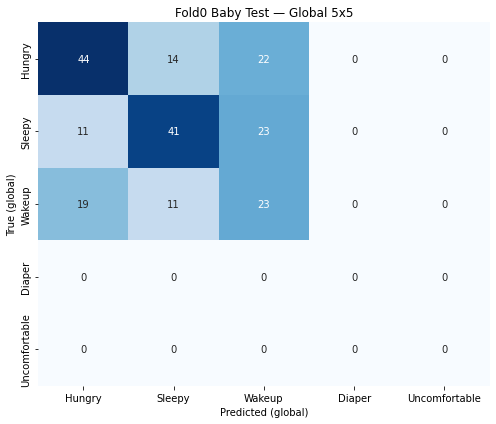

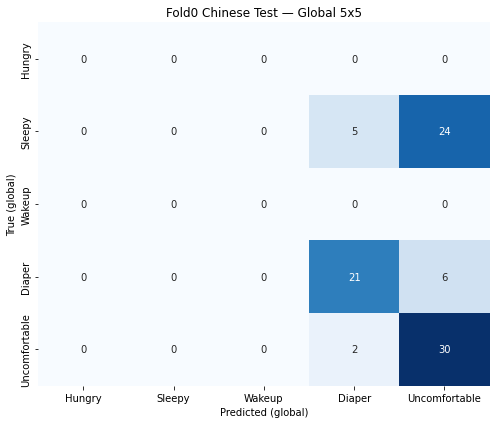

10/10 - 0s - 12ms/step

=== BLIND MIXED TEST (Baby+Chinese together) ===
ACC=0.5372 | F1_macro(global5)=0.5700 | F1_weighted(global5)=0.5321 | MCC=0.4161
               precision    recall  f1-score   support

       Hungry       0.59      0.55      0.57        80
       Sleepy       0.62      0.39      0.48       104
       Wakeup       0.34      0.43      0.38        53
       Diaper       0.75      0.78      0.76        27
Uncomfortable       0.50      0.94      0.65        32

     accuracy                           0.54       296
    macro avg       0.56      0.62      0.57       296
 weighted avg       0.56      0.54      0.53       296



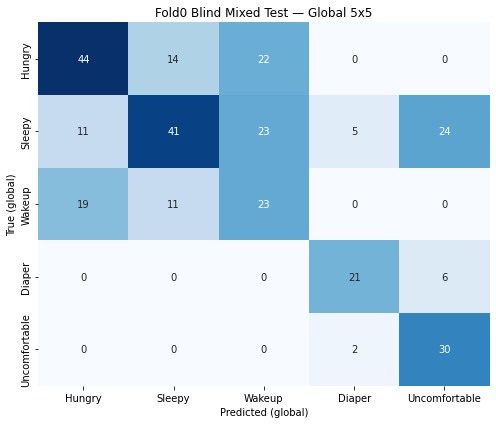

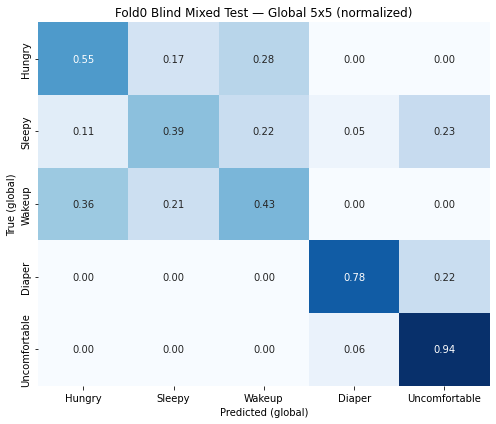


OOD on Baby test (pred in Diaper/Uncomfortable): 0.000%
OOD on Chinese test (pred in Hungry/Wakeup):      0.000%


In [45]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Config
# -----------------------------
MODEL_PATH = r"saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5"

GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
GLOBAL_LABELS  = list(range(len(GLOBAL_CLASSES)))  # [0,1,2,3,4]

# -----------------------------
# Load model
# -----------------------------
# safe if you only need inference (and avoids loss/metrics mismatches)
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("✅ Loaded model:", MODEL_PATH)
print("Model input shape:", model.input_shape, "output:", model.output_shape)

# -----------------------------
# Grab fold-0 test sets from merged_folds
# -----------------------------
fold0 = None
for f in merged_folds:
    if int(f["fold"]) == 0:
        fold0 = f
        break
assert fold0 is not None, "Could not find fold 0 in merged_folds"

X_baby = fold0["X_test_baby"]
y_baby = fold0["y_test_baby"]

X_ch   = fold0["X_test_chinese"]
y_ch   = fold0["y_test_chinese"]

print("Baby test:", X_baby.shape, "labels:", np.unique(y_baby))
print("Chinese test:", X_ch.shape, "labels:", np.unique(y_ch))

# -----------------------------
# Helper: ensure numpy + correct dtype/shape
# -----------------------------
def prepare_X_for_predict(X, model):
    expected = model.input_shape[1:]  # (H,W,C)
    X = np.asarray(X)
    if X.dtype == object:
        X = np.stack(X, axis=0)
    X = X.astype(np.float32)

    # Add channel dim if missing
    if len(expected) == 3 and X.ndim == 3:
        X = X[..., None]

    if X.shape[1:] != expected:
        raise ValueError(f"X has shape {X.shape}, but model expects (N,{expected})")
    return X

X_baby = prepare_X_for_predict(X_baby, model)
X_ch   = prepare_X_for_predict(X_ch, model)

# -----------------------------
# Prediction function
# -----------------------------
def predict_labels(model, X):
    probs = model.predict(X, verbose=2)
    return np.argmax(probs, axis=1)

# -----------------------------
# Confusion plotting (global 5x5)
# -----------------------------
def plot_confusion_global(cm, title, normalize=False):
    if normalize:
        cm_plot = cm.astype(float)
        row_sums = cm_plot.sum(axis=1, keepdims=True)
        cm_plot = np.divide(cm_plot, row_sums, out=np.zeros_like(cm_plot), where=row_sums!=0)
        fmt = ".2f"
    else:
        cm_plot = cm.astype(int)
        fmt = "d"

    plt.figure(figsize=(7,6))
    sns.heatmap(cm_plot, annot=True, fmt=fmt, cmap="Blues", cbar=False,
                xticklabels=GLOBAL_CLASSES, yticklabels=GLOBAL_CLASSES)
    plt.xlabel("Predicted (global)")
    plt.ylabel("True (global)")
    plt.title(title + (" (normalized)" if normalize else ""))
    plt.tight_layout()
    plt.show()

# -----------------------------
# Eval helper
# -----------------------------
def eval_and_cm(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro", labels=GLOBAL_LABELS, zero_division=0)
    f1w = f1_score(y_true, y_pred, average="weighted", labels=GLOBAL_LABELS, zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred, labels=GLOBAL_LABELS)
    print(f"\n=== {name} ===")
    print(f"ACC={acc:.4f} | F1_macro(global5)={f1m:.4f} | F1_weighted(global5)={f1w:.4f} | MCC={mcc:.4f}")
    print(classification_report(
        y_true, y_pred,
        labels=GLOBAL_LABELS,
        target_names=GLOBAL_CLASSES,
        zero_division=0
    ))
    return cm

# -----------------------------
# 1) Separate (diagnostic) evals
# -----------------------------
pred_baby = predict_labels(model, X_baby)
pred_ch   = predict_labels(model, X_ch)

cm_baby = eval_and_cm("BABY TEST (fold0)", y_baby, pred_baby)
cm_ch   = eval_and_cm("CHINESE TEST (fixed)", y_ch, pred_ch)

# Optional: plot per-domain (still global 5x5)
plot_confusion_global(cm_baby, "Fold0 Baby Test — Global 5x5", normalize=False)
plot_confusion_global(cm_ch,   "Fold0 Chinese Test — Global 5x5", normalize=False)

# -----------------------------
# 2) BLIND overall test (concatenate and evaluate once)
# -----------------------------
X_mix = np.concatenate([X_baby, X_ch], axis=0)
y_mix = np.concatenate([y_baby, y_ch], axis=0)

pred_mix = predict_labels(model, X_mix)
cm_mix = eval_and_cm("BLIND MIXED TEST (Baby+Chinese together)", y_mix, pred_mix)

# Plot overall blind confusion matrix
plot_confusion_global(cm_mix, "Fold0 Blind Mixed Test — Global 5x5", normalize=False)
plot_confusion_global(cm_mix, "Fold0 Blind Mixed Test — Global 5x5", normalize=True)

# (Optional) How often baby samples predicted as Chinese-only labels (3,4) etc.
ood_baby_rate = float(np.mean(np.isin(pred_baby, [3,4])))
ood_ch_rate   = float(np.mean(np.isin(pred_ch,   [0,2])))  # Hungry/Wakeup are baby-only in your global set
print(f"\nOOD on Baby test (pred in Diaper/Uncomfortable): {ood_baby_rate:.3%}")
print(f"OOD on Chinese test (pred in Hungry/Wakeup):      {ood_ch_rate:.3%}")


In [47]:
y_baby

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
y_ch

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

# Report on Test Blind

In [38]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Config
# -----------------------------
MODEL_PATH = r"saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5"

GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
GLOBAL_LABELS  = list(range(len(GLOBAL_CLASSES)))  # [0,1,2,3,4]

# -----------------------------
# Load model
# -----------------------------
# safe if you only need inference (and avoids loss/metrics mismatches)
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("✅ Loaded model:", MODEL_PATH)
print("Model input shape:", model.input_shape, "output:", model.output_shape)

# -----------------------------
# Grab fold-0 test sets from merged_folds
# -----------------------------
fold0 = None
for f in merged_folds:
    if int(f["fold"]) == 0:
        fold0 = f
        break
assert fold0 is not None, "Could not find fold 0 in merged_folds"

X_baby = fold0["X_test_baby"]
y_baby = fold0["y_test_baby"]

X_ch   = fold0["X_test_chinese"]
y_ch   = fold0["y_test_chinese"]

print("Baby test:", X_baby.shape, "labels:", np.unique(y_baby))
print("Chinese test:", X_ch.shape, "labels:", np.unique(y_ch))

# -----------------------------
# Helper: ensure numpy + correct dtype/shape
# -----------------------------
def prepare_X_for_predict(X, model):
    expected = model.input_shape[1:]  # (H,W,C)
    X = np.asarray(X)
    if X.dtype == object:
        X = np.stack(X, axis=0)
    X = X.astype(np.float32)

    # Add channel dim if missing
    if len(expected) == 3 and X.ndim == 3:
        X = X[..., None]

    if X.shape[1:] != expected:
        raise ValueError(f"X has shape {X.shape}, but model expects (N,{expected})")
    return X

X_baby = prepare_X_for_predict(X_baby, model)
X_ch   = prepare_X_for_predict(X_ch, model)

# -----------------------------
# Prediction function
# -----------------------------
def predict_labels(model, X):
    probs = model.predict(X, verbose=2)
    return np.argmax(probs, axis=1)

# -----------------------------
# Confusion plotting (global 5x5)
# -----------------------------
def plot_confusion_global(cm, title, normalize=False):
    if normalize:
        cm_plot = cm.astype(float)
        row_sums = cm_plot.sum(axis=1, keepdims=True)
        cm_plot = np.divide(cm_plot, row_sums, out=np.zeros_like(cm_plot), where=row_sums!=0)
        fmt = ".2f"
    else:
        cm_plot = cm.astype(int)
        fmt = "d"

    plt.figure(figsize=(7,6))
    sns.heatmap(cm_plot, annot=True, fmt=fmt, cmap="Blues", cbar=False,
                xticklabels=GLOBAL_CLASSES, yticklabels=GLOBAL_CLASSES)
    plt.xlabel("Predicted (global)")
    plt.ylabel("True (global)")
    plt.title(title + (" (normalized)" if normalize else ""))
    plt.tight_layout()
    plt.show()

# -----------------------------
# Eval helper
# -----------------------------
def eval_and_cm(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro", labels=GLOBAL_LABELS, zero_division=0)
    f1w = f1_score(y_true, y_pred, average="weighted", labels=GLOBAL_LABELS, zero_division=0)
    mcc = matthews_corrcoef(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred, labels=GLOBAL_LABELS)
    print(f"\n=== {name} ===")
    print(f"ACC={acc:.4f} | F1_macro(global5)={f1m:.4f} | F1_weighted(global5)={f1w:.4f} | MCC={mcc:.4f}")
    print(classification_report(
        y_true, y_pred,
        labels=GLOBAL_LABELS,
        target_names=GLOBAL_CLASSES,
        zero_division=0
    ))
    return cm

# -----------------------------
# 1) Separate (diagnostic) evals
# -----------------------------
pred_baby = predict_labels(model, X_baby)
pred_ch   = predict_labels(model, X_ch)

cm_baby = eval_and_cm("BABY TEST (fold0)", y_baby, pred_baby)
cm_ch   = eval_and_cm("CHINESE TEST (fixed)", y_ch, pred_ch)

# Optional: plot per-domain (still global 5x5)
plot_confusion_global(cm_baby, "Fold0 Baby Test — Global 5x5", normalize=False)
plot_confusion_global(cm_ch,   "Fold0 Chinese Test — Global 5x5", normalize=False)

# -----------------------------
# 2) BLIND overall test (concatenate and evaluate once)
# -----------------------------
X_mix = np.concatenate([X_baby, X_ch], axis=0)
y_mix = np.concatenate([y_baby, y_ch], axis=0)

pred_mix = predict_labels(model, X_mix)
cm_mix = eval_and_cm("BLIND MIXED TEST (Baby+Chinese together)", y_mix, pred_mix)

# Plot overall blind confusion matrix
plot_confusion_global(cm_mix, "Fold0 Blind Mixed Test — Global 5x5", normalize=False)
plot_confusion_global(cm_mix, "Fold0 Blind Mixed Test — Global 5x5", normalize=True)

# (Optional) How often baby samples predicted as Chinese-only labels (3,4) etc.
ood_baby_rate = float(np.mean(np.isin(pred_baby, [3,4])))
ood_ch_rate   = float(np.mean(np.isin(pred_ch,   [0,2])))  # Hungry/Wakeup are baby-only in your global set
print(f"\nOOD on Baby test (pred in Diaper/Uncomfortable): {ood_baby_rate:.3%}")
print(f"OOD on Chinese test (pred in Hungry/Wakeup):      {ood_ch_rate:.3%}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [49]:
pred_baby = np.argmax(model.predict(X_baby, verbose=0), axis=1)
pred_ch   = np.argmax(model.predict(X_ch,   verbose=0), axis=1)

print("Pred labels on baby:", np.unique(pred_baby, return_counts=True))
print("Pred labels on ch  :", np.unique(pred_ch,   return_counts=True))

# Also inspect mean probability mass on classes 3 and 4
pb = model.predict(X_baby, verbose=0)
pc = model.predict(X_ch, verbose=0)
print("Mean prob on classes [3,4] for baby:", pb[:,3].mean(), pb[:,4].mean())
print("Mean prob on classes [3,4] for ch  :", pc[:,3].mean(), pc[:,4].mean())


Pred labels on baby: (array([0, 1, 2]), array([74, 66, 68]))
Pred labels on ch  : (array([3, 4]), array([28, 60]))
Mean prob on classes [3,4] for baby: 0.022392878 0.022425113
Mean prob on classes [3,4] for ch  : 0.27830604 0.56883466


In [53]:
BABY_INDOMAIN = {0, 1, 2}      # Hungry, Sleepy, Wakeup
CH_INDOMAIN   = {1, 3, 4}      # Sleepy(shared), Diaper, Uncomfortable

# predictions you already computed:
# pred_baby, pred_ch

baby_leak = float(np.mean([p not in BABY_INDOMAIN for p in pred_baby]))
ch_leak   = float(np.mean([p not in CH_INDOMAIN   for p in pred_ch]))

print(f"Baby→(outside Baby labels) leakage: {baby_leak:.3%}")
print(f"Chinese→(outside Chinese labels) leakage: {ch_leak:.3%}")

# More specific: Baby predicted as Chinese-only labels (3/4)
baby_to_ch_only = float(np.mean(np.isin(pred_baby, [3,4])))
# Chinese predicted as Baby-only labels (0/2)
ch_to_b_only = float(np.mean(np.isin(pred_ch, [0,2])))

print(f"Baby predicted as Chinese-only (3/4): {baby_to_ch_only:.3%}")
print(f"Chinese predicted as Baby-only (0/2): {ch_to_b_only:.3%}")


Baby→(outside Baby labels) leakage: 0.000%
Chinese→(outside Chinese labels) leakage: 0.000%
Baby predicted as Chinese-only (3/4): 0.000%
Chinese predicted as Baby-only (0/2): 0.000%


✅ Loaded model: saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5
Model input shape: (None, 100, 280, 1) output: (None, 5)
Baby test: (208, 100, 280, 1) labels: [0 1 2]
Chinese test: (88, 100, 280, 1) labels: [1 3 4]

=== BLIND MIXED TEST (T=5.0) ===
ACC=0.5372 | F1_macro(global5)=0.5700 | F1_weighted(global5)=0.5321 | MCC=0.4161
               precision    recall  f1-score   support

       Hungry       0.59      0.55      0.57        80
       Sleepy       0.62      0.39      0.48       104
       Wakeup       0.34      0.43      0.38        53
       Diaper       0.75      0.78      0.76        27
Uncomfortable       0.50      0.94      0.65        32

     accuracy                           0.54       296
    macro avg       0.56      0.62      0.57       296
 weighted avg       0.56      0.54      0.53       296



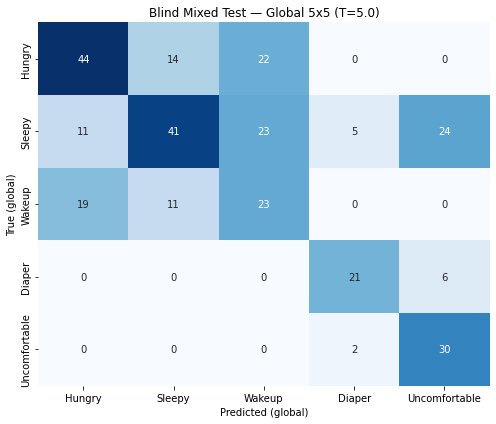

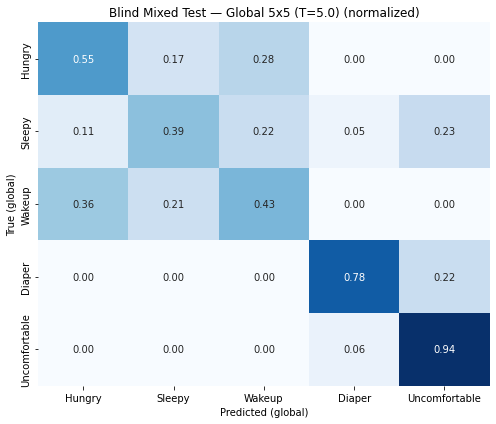


Entropy stats: mean= 1.5678788423538208 min= 1.512550950050354 max= 1.5981675386428833

Examples (top-3 probs):
sample 0 true=Wakeup [('Wakeup', 0.307120144367218), ('Hungry', 0.20091211795806885), ('Sleepy', 0.18621936440467834)]
sample 1 true=Sleepy [('Sleepy', 0.3066898286342621), ('Wakeup', 0.20116980373859406), ('Hungry', 0.20018774271011353)]
sample 2 true=Sleepy [('Hungry', 0.30886030197143555), ('Sleepy', 0.2086317539215088), ('Wakeup', 0.18573349714279175)]
sample 3 true=Wakeup [('Hungry', 0.2982211112976074), ('Wakeup', 0.20709063112735748), ('Sleepy', 0.1808820217847824)]
sample 4 true=Uncomfortable [('Uncomfortable', 0.3204057514667511), ('Sleepy', 0.21297988295555115), ('Diaper', 0.18224944174289703)]

Mean predicted probability mass per class:
         Hungry: 0.2195
         Sleepy: 0.2203
         Wakeup: 0.2039
         Diaper: 0.1695
  Uncomfortable: 0.1868


In [52]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

MODEL_PATH = r"saved_models/merged_fold_0/best_val_baby_f1_macro_epoch84_f10.5111_20260108_164108.h5"

GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
GLOBAL_LABELS  = list(range(len(GLOBAL_CLASSES)))  # [0,1,2,3,4]

# -----------------------------
# Load model
# -----------------------------
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("✅ Loaded model:", MODEL_PATH)
print("Model input shape:", model.input_shape, "output:", model.output_shape)
assert model.output_shape[-1] == 5, "This code expects a 5-class model output!"

# -----------------------------
# Grab fold-0 test sets
# -----------------------------
fold0 = next((f for f in merged_folds if int(f["fold"]) == 0), None)
assert fold0 is not None, "Could not find fold 0 in merged_folds"

X_baby = fold0["X_test_baby"];     y_baby = fold0["y_test_baby"]
X_ch   = fold0["X_test_chinese"];  y_ch   = fold0["y_test_chinese"]

print("Baby test:", X_baby.shape, "labels:", np.unique(y_baby))
print("Chinese test:", X_ch.shape, "labels:", np.unique(y_ch))

# -----------------------------
# Helper: ensure numpy + correct dtype/shape
# -----------------------------
def prepare_X_for_predict(X, model):
    expected = model.input_shape[1:]
    X = np.asarray(X)
    if X.dtype == object:
        X = np.stack(X, axis=0)
    X = X.astype(np.float32)
    if len(expected) == 3 and X.ndim == 3:
        X = X[..., None]
    if X.shape[1:] != expected:
        raise ValueError(f"X has shape {X.shape}, but model expects (N,{expected})")
    return X

X_baby = prepare_X_for_predict(X_baby, model)
X_ch   = prepare_X_for_predict(X_ch, model)

# -----------------------------
# Softmax with temperature (to "soften" a gated model)
# T > 1.0 makes probs less peaky (more mass on other classes)
# -----------------------------
def softmax_np(logits, T=1.0):
    z = logits / float(T)
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

def predict_probs(model, X, temperature=1.0, batch_size=64):
    # Prefer logits if model provides them; otherwise use probabilities.
    out = model.predict(X, verbose=0, batch_size=batch_size)

    # If last layer is softmax, out are probs; convert to logits-ish by log
    # then re-softmax with temperature. This is a practical "smoothing".
    eps = 1e-9
    logits_like = np.log(np.clip(out, eps, 1.0))
    probs_T = softmax_np(logits_like, T=temperature)
    return probs_T

def topk_strings(probs, k=3):
    topk = np.argsort(-probs, axis=1)[:, :k]
    out = []
    for i in range(probs.shape[0]):
        pairs = [(GLOBAL_CLASSES[j], float(probs[i, j])) for j in topk[i]]
        out.append(pairs)
    return out

def entropy(probs):
    eps = 1e-12
    p = np.clip(probs, eps, 1.0)
    return -np.sum(p * np.log(p), axis=1)

# -----------------------------
# Confusion plotting (global 5x5)
# -----------------------------
def plot_confusion_global(cm, title, normalize=False):
    if normalize:
        cm_plot = cm.astype(float)
        row_sums = cm_plot.sum(axis=1, keepdims=True)
        cm_plot = np.divide(cm_plot, row_sums, out=np.zeros_like(cm_plot), where=row_sums!=0)
        fmt = ".2f"
    else:
        cm_plot = cm.astype(int)
        fmt = "d"

    plt.figure(figsize=(7,6))
    sns.heatmap(cm_plot, annot=True, fmt=fmt, cmap="Blues", cbar=False,
                xticklabels=GLOBAL_CLASSES, yticklabels=GLOBAL_CLASSES)
    plt.xlabel("Predicted (global)")
    plt.ylabel("True (global)")
    plt.title(title + (" (normalized)" if normalize else ""))
    plt.tight_layout()
    plt.show()

# -----------------------------
# Eval helper
# -----------------------------
def eval_global(name, y_true, probs):
    preds = np.argmax(probs, axis=1)

    acc = accuracy_score(y_true, preds)
    f1m = f1_score(y_true, preds, average="macro", labels=GLOBAL_LABELS, zero_division=0)
    f1w = f1_score(y_true, preds, average="weighted", labels=GLOBAL_LABELS, zero_division=0)
    mcc = matthews_corrcoef(y_true, preds)

    cm = confusion_matrix(y_true, preds, labels=GLOBAL_LABELS)

    print(f"\n=== {name} ===")
    print(f"ACC={acc:.4f} | F1_macro(global5)={f1m:.4f} | F1_weighted(global5)={f1w:.4f} | MCC={mcc:.4f}")
    print(classification_report(
        y_true, preds,
        labels=GLOBAL_LABELS,
        target_names=GLOBAL_CLASSES,
        zero_division=0
    ))
    return preds, cm

# -----------------------------
# BLIND MIXED TEST (single evaluation)
# -----------------------------
X_mix = np.concatenate([X_baby, X_ch], axis=0)
y_mix = np.concatenate([y_baby, y_ch], axis=0)

# Shuffle to make it "visually blind" too (optional)
rng = np.random.default_rng(0)
idx = rng.permutation(len(X_mix))
X_mix = X_mix[idx]
y_mix = y_mix[idx]

# Choose temperature
TEMPERATURE = 5.0   # try 1.0 (original), 2.0, 3.0, 5.0 to soften gating

mix_probs = predict_probs(model, X_mix, temperature=TEMPERATURE)
mix_preds, cm_mix = eval_global(f"BLIND MIXED TEST (T={TEMPERATURE})", y_mix, mix_probs)

plot_confusion_global(cm_mix, f"Blind Mixed Test — Global 5x5 (T={TEMPERATURE})", normalize=False)
plot_confusion_global(cm_mix, f"Blind Mixed Test — Global 5x5 (T={TEMPERATURE})", normalize=True)

# -----------------------------
# Extra: prove we output 5 probs per sample + quantify "other-class mass"
# -----------------------------
ent = entropy(mix_probs)
print("\nEntropy stats:", "mean=", float(ent.mean()), "min=", float(ent.min()), "max=", float(ent.max()))

# Show a few samples: top-3 predicted classes with probabilities
top3 = topk_strings(mix_probs, k=3)
print("\nExamples (top-3 probs):")
for i in range(5):
    print(f"sample {i} true={GLOBAL_CLASSES[int(y_mix[i])]}", top3[i])

# Measure probability mass assigned to each class on average
mean_mass = mix_probs.mean(axis=0)
print("\nMean predicted probability mass per class:")
for c, m in zip(GLOBAL_CLASSES, mean_mass):
    print(f"  {c:>13s}: {m:.4f}")


In [5]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

GLOBAL_CLASSES = ["Hungry", "Sleepy", "Wakeup", "Diaper", "Uncomfortable"]
GLOBAL_LABELS  = list(range(len(GLOBAL_CLASSES)))  # [0,1,2,3,4]

def confusion_global_5x5(y_true, y_pred):
    # Force 5x5 even if some classes are absent in y_true
    return confusion_matrix(y_true, y_pred, labels=GLOBAL_LABELS)

def plot_confusion_global(cm, title="Confusion Matrix (Global 5)", normalize=False):
    if normalize:
        cm_plot = cm.astype(float)
        row_sums = cm_plot.sum(axis=1, keepdims=True)
        cm_plot = np.divide(cm_plot, row_sums, out=np.zeros_like(cm_plot), where=row_sums!=0)
        fmt = ".2f"
    else:
        cm_plot = cm.astype(int)
        fmt = "d"

    plt.figure(figsize=(7,6))
    sns.heatmap(
        cm_plot, annot=True, fmt=fmt, cmap="Blues", cbar=False,
        xticklabels=GLOBAL_CLASSES, yticklabels=GLOBAL_CLASSES
    )
    plt.xlabel("Predicted label (global)")
    plt.ylabel("True label (global)")
    plt.title(title + (" (normalized)" if normalize else ""))
    plt.tight_layout()
    plt.show()


# Evaluation

In [ ]:
import matplotlib.pyplot as plt

# ================================
#  LOSS PLOT
# ================================
plt.figure(figsize=(7,5))
plt.plot(history.history.get('loss', []), label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# ================================
#  ACCURACY PLOT
# ================================
plt.figure(figsize=(7,5))
plt.plot(history.history.get('accuracy', []), label='Train Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Val Accuracy')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# ================================
#  F1-SCORE PLOT  (From your callback)
# ================================
plt.figure(figsize=(7,5))
plt.plot(f1_callback.train_f1s, label='Train F1 (macro)')
plt.plot(f1_callback.val_f1s, label='Val F1 (macro)')
plt.title("F1 Score Curve")
plt.xlabel("Epoch")
plt.ylabel("F1 Score (macro)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val_split, val_preds)
labels = np.unique(y_val_split)
tick_labels = [id2cls_chinese[i] for i in labels]   # adjust mapping if not Chinese set

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=tick_labels, yticklabels=tick_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Validation")
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


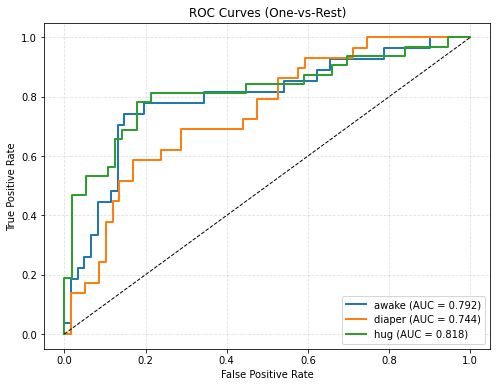

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true_onehot, y_pred_prob, class_names):
    plt.figure(figsize=(8, 6))

    n_classes = y_true_onehot.shape[1]

    for c in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_onehot[:, c], y_pred_prob[:, c])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2,
                 label=f"{class_names[c]} (AUC = {roc_auc:.3f})")

    # Diagonal line
    plt.plot([0, 1], [0, 1], "k--", lw=1)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves (One-vs-Rest)")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.show()

y_pred_prob = model.predict(X_val_split)
y_true_onehot = y_val_onehot

class_names = list(le.classes_)   # <-- FIXED

plot_roc_curves(y_true_onehot, y_pred_prob, class_names)




In [26]:
from sklearn.metrics import (
    f1_score, matthews_corrcoef, roc_auc_score,
    accuracy_score, precision_recall_curve, auc
)
from sklearn.preprocessing import label_binarize

f1_micro = f1_score(y_val_split, val_preds, average='micro')
f1_macro = f1_score(y_val_split, val_preds, average='macro')
mcc = matthews_corrcoef(y_val_split, val_preds)
acc = accuracy_score(y_val_split, val_preds)

# ---- ROC-AUC (One-vs-Rest) ----
y_val_bin = label_binarize(y_val_split, classes=labels)

try:
    roc_auc = roc_auc_score(
        y_val_bin, val_probs, multi_class="ovr", average="macro"
    )
except:
    roc_auc = None

print("\n===== Validation Metrics =====")
print(f"Accuracy   : {acc:.4f}")
print(f"F1-micro   : {f1_micro:.4f}")
print(f"F1-macro   : {f1_macro:.4f}")
print(f"MCC        : {mcc:.4f}")
print(f"ROC-AUC    : {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: unavailable")



===== Validation Metrics =====
Accuracy   : 0.6364
F1-micro   : 0.6364
F1-macro   : 0.6265
MCC        : 0.4560
ROC-AUC    : 0.7846


## Plot and save

In [27]:
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, matthews_corrcoef, classification_report
from sklearn.preprocessing import label_binarize

# -------------------- Setup --------------------
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Classes of interest in original encoding
keep_classes = [1, 4, 5]   # diaper=1, sleepy=4, uncomfortable=5
class_names = {1: "diaper", 4: "sleepy", 5: "uncomfortable"}

# Map to new encoded ids {0,1,2}
unique_classes = sorted(keep_classes)  # [1,4,5]
class2newid = {old: new for new, old in enumerate(unique_classes)}
id2cls_merge_3mood = {new: class_names[old] for old, new in class2newid.items()}

# -------------------- Predictions --------------------
val_probs_full = model.predict(X_val_split)

# Keep only probs for classes of interest
val_probs = val_probs_full[:, unique_classes]  # shape (N, 3)

# Recompute predictions
val_preds = np.argmax(val_probs, axis=1)

# -------------------- Confusion Matrix --------------------
cm = confusion_matrix(y_val_split, val_preds)
labels = np.unique(y_val_split)
tick_labels = [id2cls_merge_3mood[i] for i in labels]

plt.figure(figsize=(16, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=tick_labels,
    yticklabels=tick_labels,
    annot_kws={"size": 16}
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

cm_path = os.path.join(output_dir, f"confusion_matrix_{timestamp}.png")
plt.savefig(cm_path, dpi=300, bbox_inches="tight")
plt.close()

# -------------------- Metrics --------------------
f1_micro = f1_score(y_val_split, val_preds, average='micro')
f1_macro = f1_score(y_val_split, val_preds, average='macro')
mcc = matthews_corrcoef(y_val_split, val_preds)

# Binarize labels for ROC AUC
y_val_bin = label_binarize(y_val_split, classes=np.unique(y_val_split))
try:
    roc_auc = roc_auc_score(y_val_bin, val_probs, average="macro", multi_class="ovr")
except ValueError:
    roc_auc = None

report = classification_report(
    y_val_split,
    val_preds,
    target_names=[id2cls_merge_3mood[i] for i in np.unique(y_val_split)],
    digits=4
)

stats_path = os.path.join(output_dir, f"validation_stats_{timestamp}.txt")
with open(stats_path, "w") as f:
    f.write("Validation Metrics:\n")
    f.write(f"F1 (micro): {f1_micro:.4f}\n")
    f.write(f"F1 (macro): {f1_macro:.4f}\n")
    f.write(f"MCC       : {mcc:.4f}\n")
    f.write(f"ROC AUC   : {roc_auc:.4f}\n" if roc_auc is not None else "ROC AUC not available\n")
    f.write("\nClassification Report:\n")
    f.write(report)

print(f"✅ Saved confusion matrix to {cm_path}")
print(f"✅ Saved metrics to {stats_path}")

# -------------------- Training Curves --------------------
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
curve_path = os.path.join(output_dir, f"training_curves_{timestamp}.png")
plt.savefig(curve_path, dpi=300, bbox_inches="tight")
plt.close()

print(f"✅ Saved training curves to {curve_path}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


IndexError: index 4 is out of bounds for axis 1 with size 3

In [28]:
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    classification_report
)
from sklearn.preprocessing import label_binarize

# -------------------- Setup --------------------
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Classes of interest in original encoding
keep_classes = [1, 4, 5]   # diaper=1, sleepy=4, uncomfortable=5
class_names = {1: "diaper", 4: "sleepy", 5: "uncomfortable"}

# Map old IDs -> new {0,1,2}
unique_classes = sorted(keep_classes)  # [1,4,5]
class2newid = {old: new for new, old in enumerate(unique_classes)}
id2cls_merge_3mood = {new: class_names[old] for old, new in class2newid.items()}

# -------------------- Predictions --------------------
val_probs_full = model.predict(X_val_split)     # shape (N, all_classes)

# Keep only columns for the 3 moods
val_probs = val_probs_full[:, unique_classes]   # shape (N, 3)

# Recompute predictions
val_preds = np.argmax(val_probs, axis=1)

# -------------------- Confusion Matrix --------------------
cm = confusion_matrix(y_val_split, val_preds)
labels = np.unique(y_val_split)
tick_labels = [id2cls_merge_3mood[i] for i in labels]

plt.figure(figsize=(16, 12))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=tick_labels,
    yticklabels=tick_labels,
    annot_kws={"size": 16}
)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

cm_path = os.path.join(output_dir, f"confusion_matrix_{timestamp}.png")
plt.savefig(cm_path, dpi=300, bbox_inches="tight")
plt.close()

# -------------------- Metrics --------------------
f1_micro = f1_score(y_val_split, val_preds, average='micro')
f1_macro = f1_score(y_val_split, val_preds, average='macro')
mcc = matthews_corrcoef(y_val_split, val_preds)

# Binarize labels for ROC AUC (3 classes only)
y_val_bin = label_binarize(y_val_split, classes=np.arange(len(unique_classes)))

try:
    roc_auc = roc_auc_score(y_val_bin, val_probs, average="macro", multi_class="ovr")
except ValueError:
    roc_auc = None

report = classification_report(
    y_val_split,
    val_preds,
    target_names=[id2cls_merge_3mood[i] for i in np.unique(y_val_split)],
    digits=4
)

stats_path = os.path.join(output_dir, f"validation_stats_{timestamp}.txt")
with open(stats_path, "w") as f:
    f.write("Validation Metrics:\n")
    f.write(f"F1 (micro): {f1_micro:.4f}\n")
    f.write(f"F1 (macro): {f1_macro:.4f}\n")
    f.write(f"MCC       : {mcc:.4f}\n")
    f.write(f"ROC AUC   : {roc_auc:.4f}\n" if roc_auc is not None else "ROC AUC not available\n")
    f.write("\nClassification Report:\n")
    f.write(report)
    f.write("\nClass mapping:\n")
    f.write(str(id2cls_merge_3mood))

print(f"✅ Saved confusion matrix to {cm_path}")
print(f"✅ Saved metrics to {stats_path}")

# -------------------- Training Curves --------------------
plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
curve_path = os.path.join(output_dir, f"training_curves_{timestamp}.png")
plt.savefig(curve_path, dpi=300, bbox_inches="tight")
plt.close()

print(f"✅ Saved training curves to {curve_path}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


IndexError: index 4 is out of bounds for axis 1 with size 3

In [30]:
import numpy as np

# Get full probability predictions (shape: [n_samples, n_classes])
val_probs = model.predict(X_val_split)
val_preds = np.argmax(val_probs, axis=1)   # top-1 predictions

# Sort predictions to get top-2 indices
top2_preds = np.argsort(val_probs, axis=1)[:, -2:]  # last two = top-2

# Boolean: was the correct label in top-2 predictions?
correct_top2 = [y_val_split[i] in top2_preds[i] for i in range(len(y_val_split))]

# Count stats
top1_correct = np.sum(val_preds == y_val_split)
top2_correct = np.sum(correct_top2)
only_second_correct = np.sum((val_preds != y_val_split) & np.array(correct_top2))

print(f"Total samples        : {len(y_val_split)}")
print(f"Top-1 correct        : {top1_correct}")
print(f"Top-2 correct        : {top2_correct}")
print(f"Wrong top-1 but fixed by 2nd : {only_second_correct}")
print(f"Top-1 Accuracy       : {top1_correct/len(y_val_split):.4f}")
print(f"Top-2 Accuracy       : {top2_correct/len(y_val_split):.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Total samples        : 88
Top-1 correct        : 65
Top-2 correct        : 79
Wrong top-1 but fixed by 2nd : 14
Top-1 Accuracy       : 0.7386
Top-2 Accuracy       : 0.8977


In [29]:
import numpy as np

# Get probability predictions
val_probs = model.predict(X_val_split)
val_preds = np.argmax(val_probs, axis=1)

# Top-2 indices per sample
top2_preds = np.argsort(val_probs, axis=1)[:, -2:]

# Identify "wrong top-1 but fixed by top-2"
wrong_fixed = (val_preds != y_val_split) & np.array(
    [y_val_split[i] in top2_preds[i] for i in range(len(y_val_split))]
)

# # Class mapping (example, update to match your dataset)
# id2cls = {
#     0: "hungry",
#     1: "awake",
#     2: "sleepy",
#     3: "diaper",
#     4: "uncomfortable"
# }

# Count per-class
counts = {cls: 0 for cls in id2cls_chinese.values()}
for i, flag in enumerate(wrong_fixed):
    if flag:  # case where top-2 fixed it
        cls_name = id2cls_chinese[y_val_split[i]]
        counts[cls_name] += 1

print("Wrong top-1 but correct at 2nd prediction (per class):")
for cls, c in counts.items():
    print(f"{cls:15s}: {c}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Wrong top-1 but correct at 2nd prediction (per class):
awake          : 11
diaper         : 6
hug            : 4
hungry         : 0
sleepy         : 0
uncomfortable  : 0


In [30]:
import numpy as np

# Get probability predictions
val_probs = model.predict(X_val_split)
val_preds = np.argmax(val_probs, axis=1)

# Top-2 indices per sample
top2_preds = np.argsort(val_probs, axis=1)[:, -2:]

# Identify "wrong top-1 but fixed by top-2"
wrong_fixed = (val_preds != y_val_split) & np.array(
    [y_val_split[i] in top2_preds[i] for i in range(len(y_val_split))]
)


# Count per true class and record wrong top-1s
counts = {cls: 0 for cls in id2cls_chinese.values()}
confusions = {cls: [] for cls in id2cls_chinese.values()}

for i, flag in enumerate(wrong_fixed):
    if flag:
        true_cls = id2cls_chinese[y_val_split[i]]
        wrong_cls = id2cls_chinese[val_preds[i]]
        counts[true_cls] += 1
        confusions[true_cls].append(wrong_cls)

# Print summary
print("Wrong top-1 but correct at 2nd prediction (per class):")
for cls, c in counts.items():
    if c > 0:
        wrong_breakdown = {w: confusions[cls].count(w) for w in set(confusions[cls])}
        print(f"{cls:15s}: {c} cases")
        for wrong, wc in wrong_breakdown.items():
            print(f"   → misclassified as {wrong}: {wc}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Wrong top-1 but correct at 2nd prediction (per class):
awake          : 11 cases
   → misclassified as hug: 8
   → misclassified as diaper: 3
diaper         : 6 cases
   → misclassified as hug: 2
   → misclassified as awake: 4
hug            : 4 cases
   → misclassified as diaper: 2
   → misclassified as awake: 2


# Avg smooth Ensemble Chinese baby cry and reverb chinese baby cry and Baby2020

# Agree vote Ensemble Chinese baby cry and reverb chinese baby cry and Baby2020

# Statistical test analysis of ensemble merged and single trainer